# Purpose
The purpose of this notebook is to clean the `immo_data202208_v2.parquet` file, save it and generate an automated exploratory analysis report.

In [2]:
# Import modules
import pandas as pd
from utils.helper_v2 import ImmoHelper
import sweetviz as sv
import numpy as np
import warnings

warnings.filterwarnings("ignore")


In [3]:
helper = ImmoHelper()
df = helper.process_data(return_gde=True)


In [4]:
df.shape


(22481, 64)

In [5]:
def clean_rows(df_rows):
    # Remove french entry
    df_rows = df_rows[df_rows["zip_code"] != "4160"]

    # Remove outliers
    df_rows = df_rows[df_rows["price"].fillna(0) > 30000]
    df_rows = df_rows[df_rows["plot_area"].fillna(0) < 247330]
    df_rows = df_rows[df_rows["living_space"].fillna(0) < 1450]
    df_rows = df_rows[df_rows["floor"].fillna(0) <= 100]

    # Clean up cantons
    df_rows.loc[df_rows["zip_code"] == "1919", "canton"] = "VS"
    df_rows.loc[df_rows["zip_code"] == "1818", "canton"] = "VD"

    return df_rows


In [6]:
df = clean_rows(df)
df.shape


(21412, 64)

                                             |          | [  0%]   00:00 -> (? left)


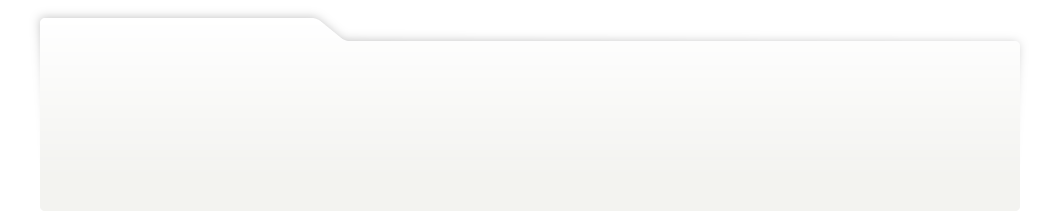
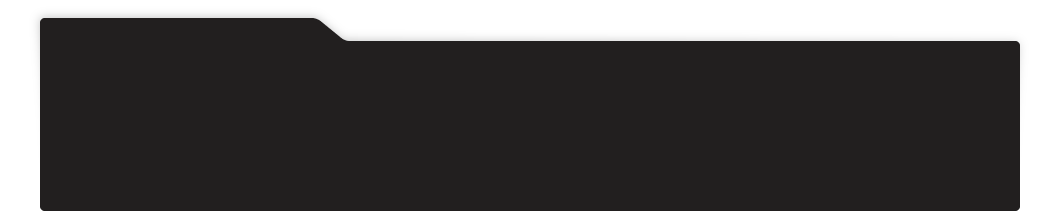
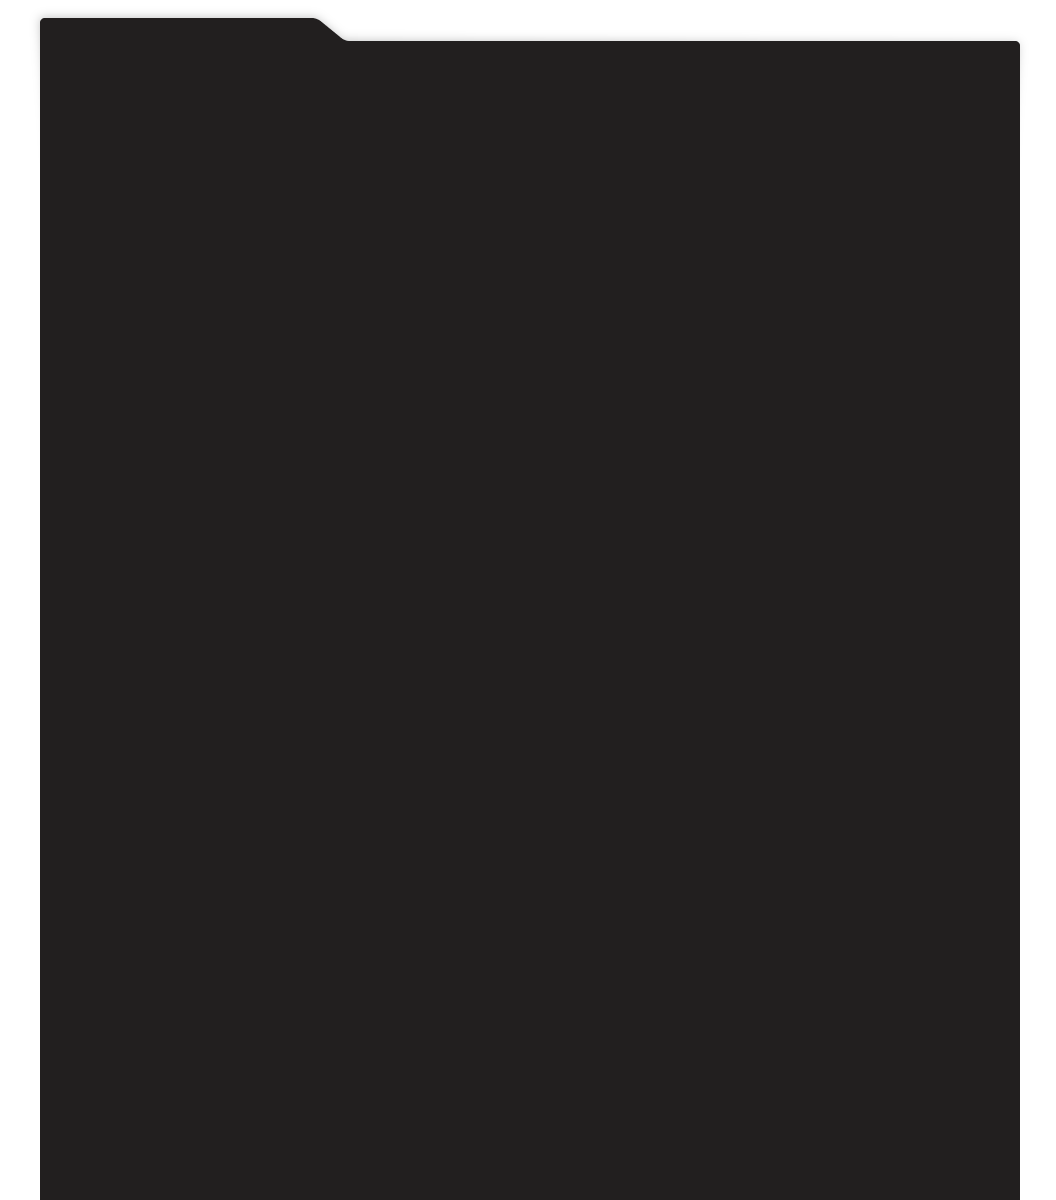
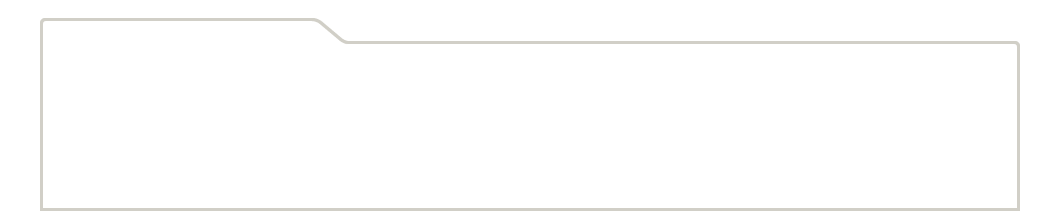
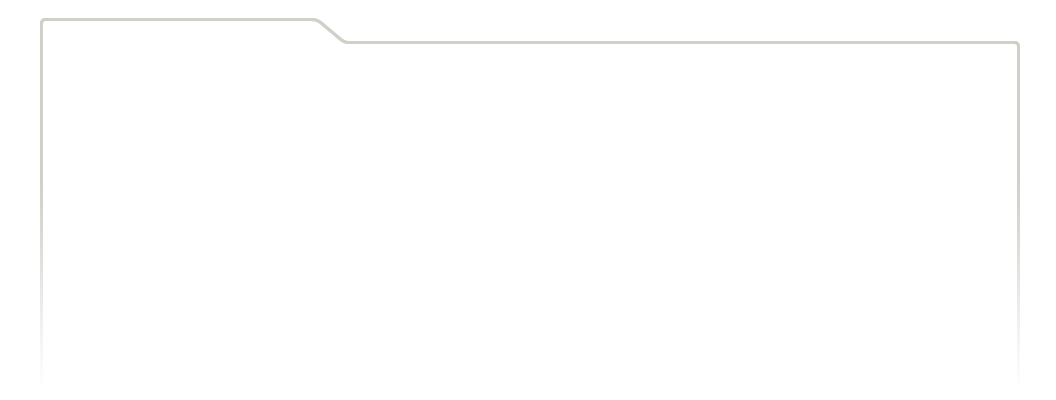
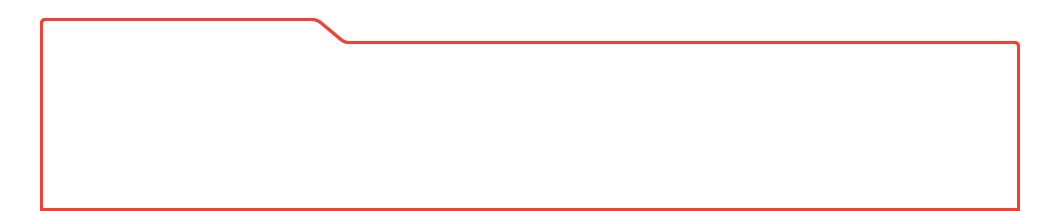
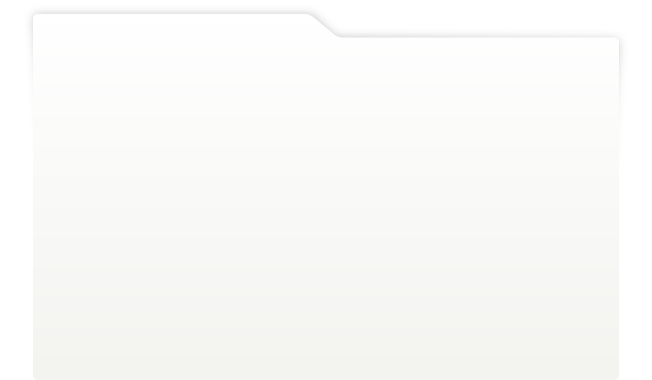
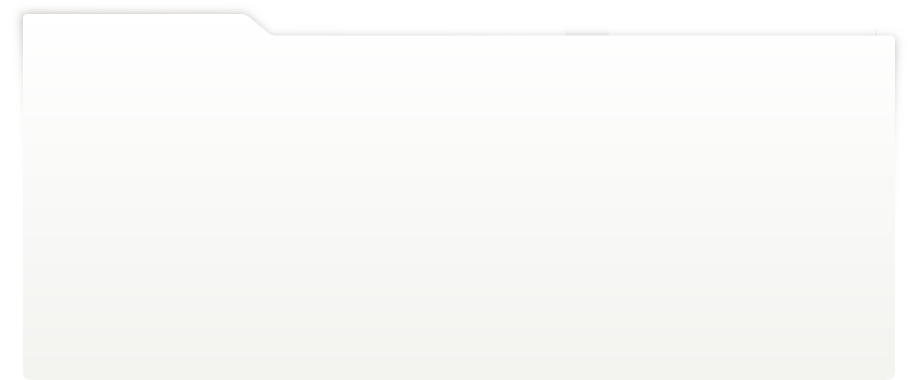
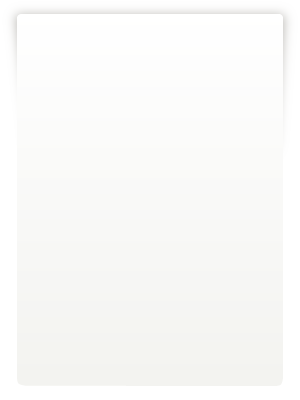
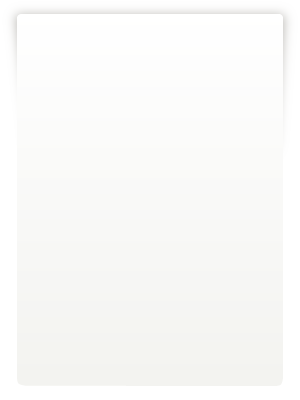
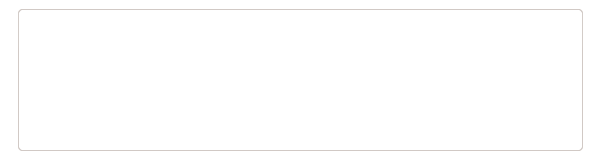
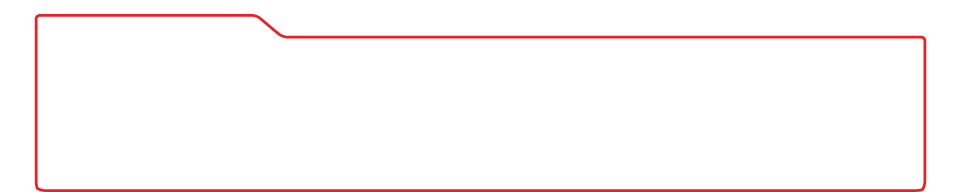
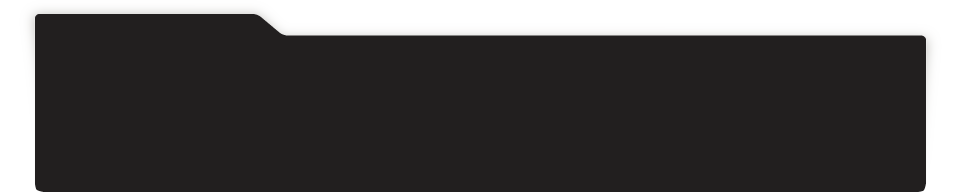
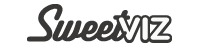
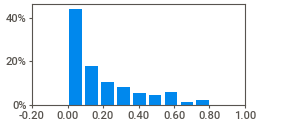
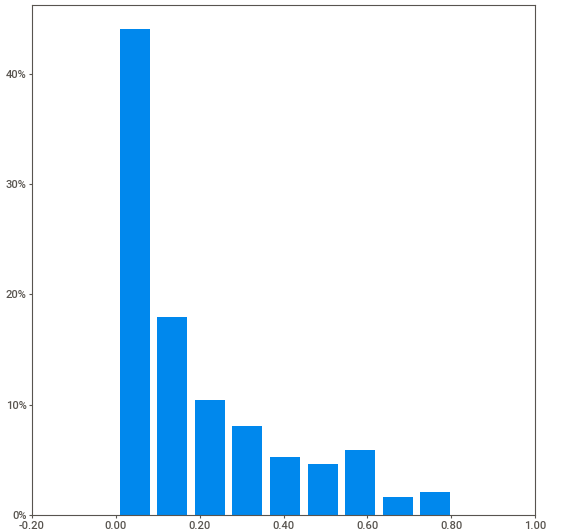
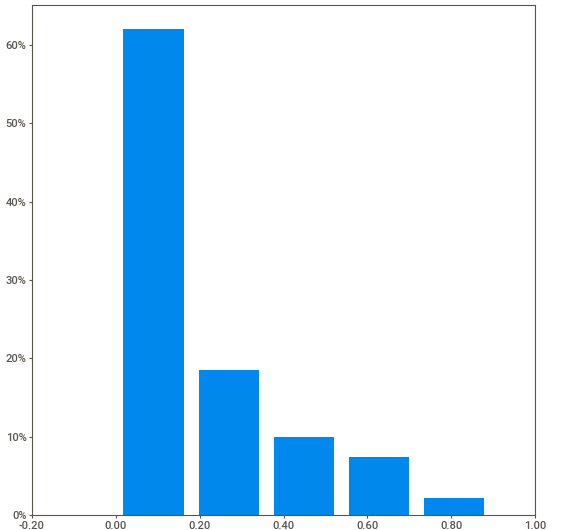
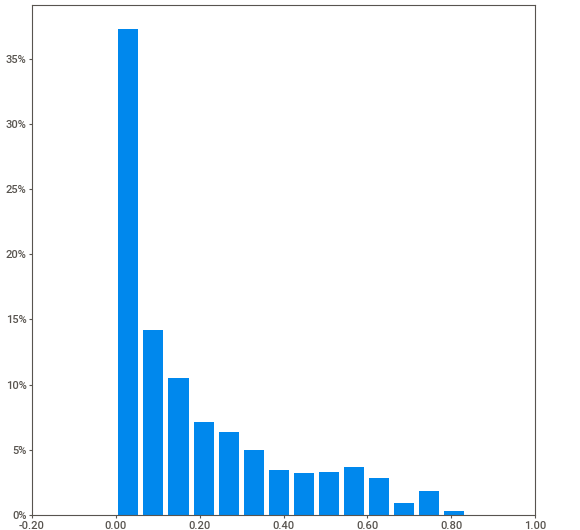
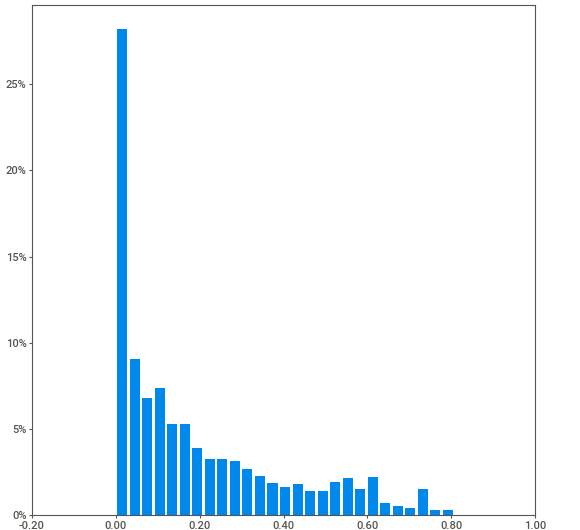
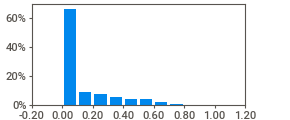
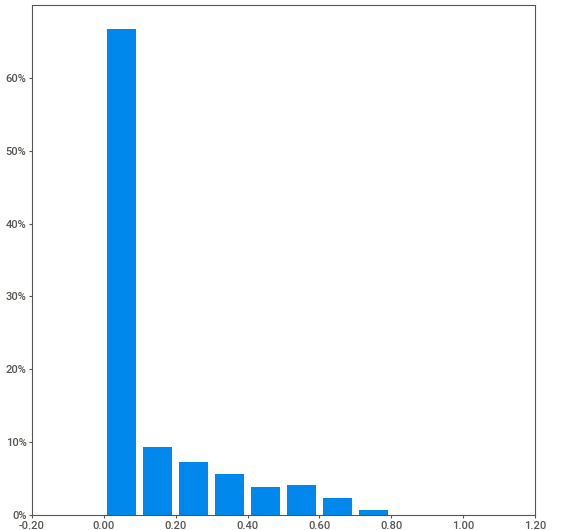
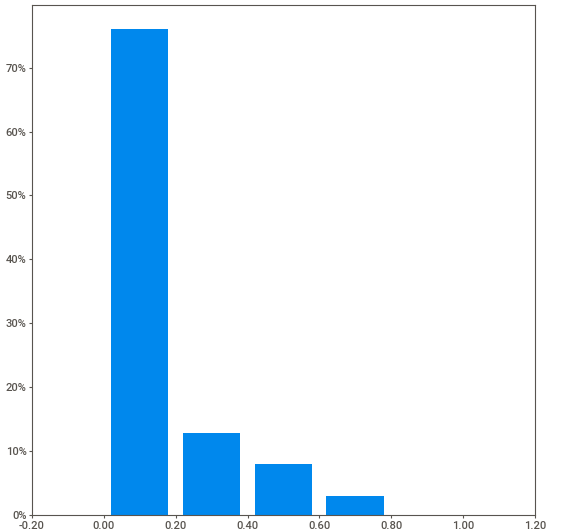
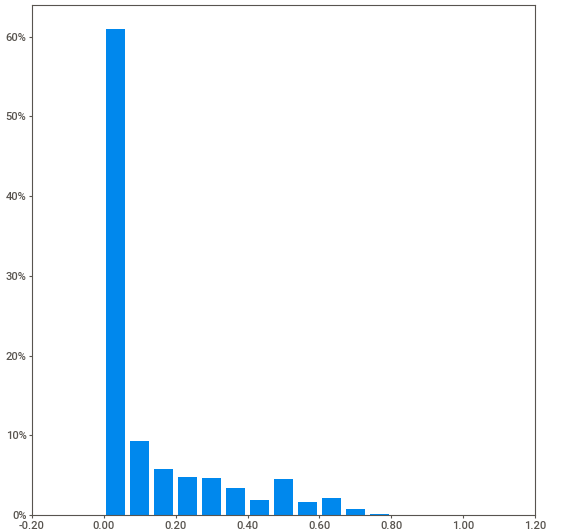
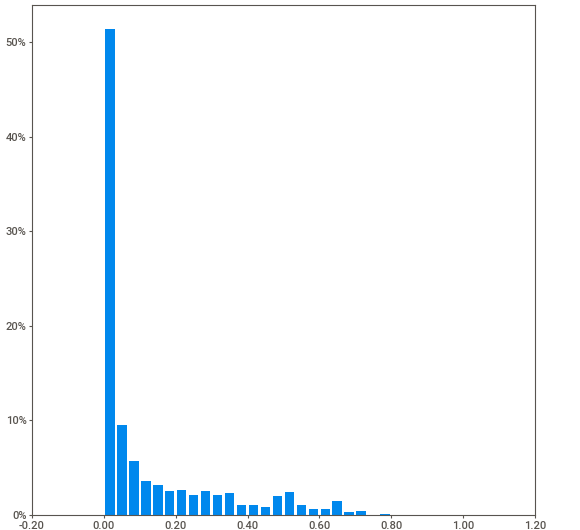
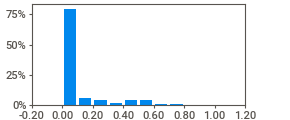
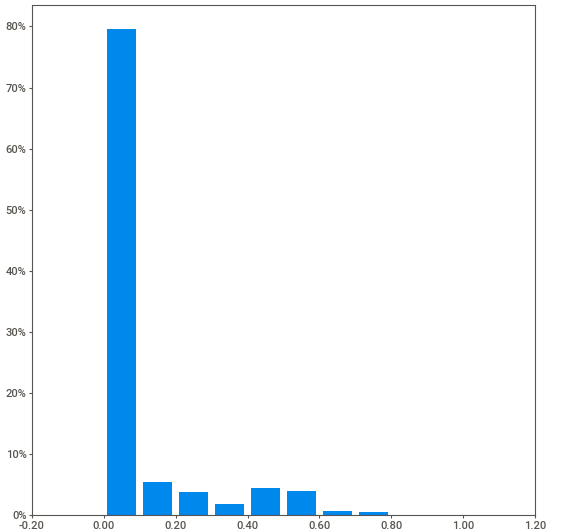
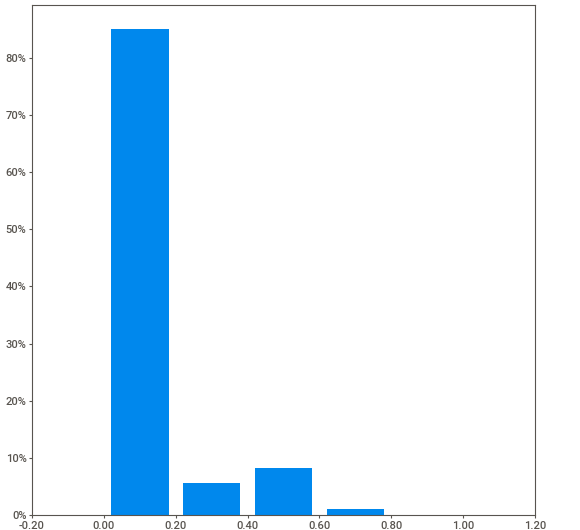
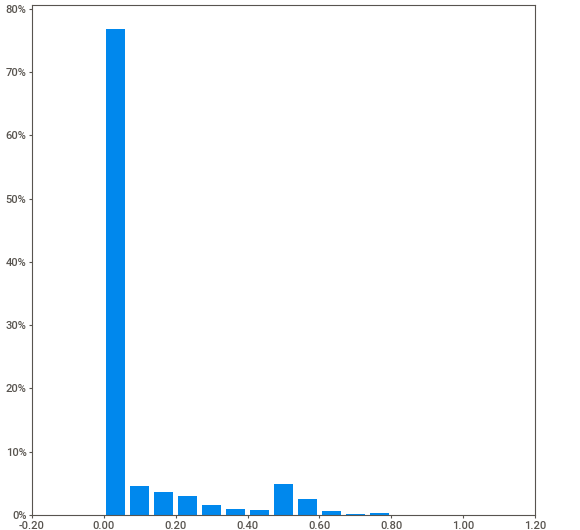
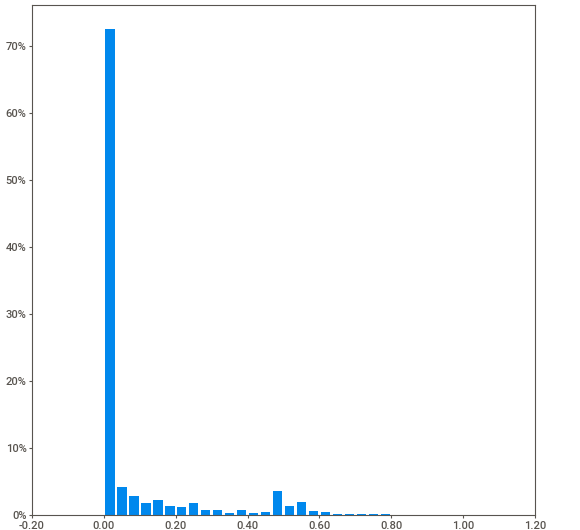
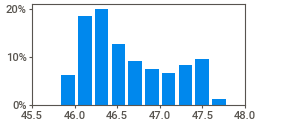
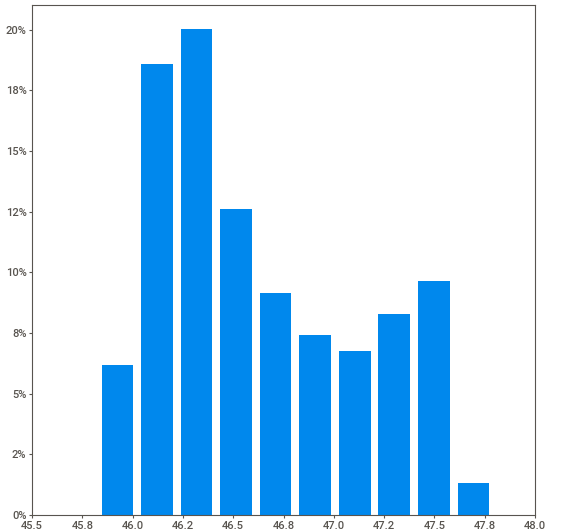
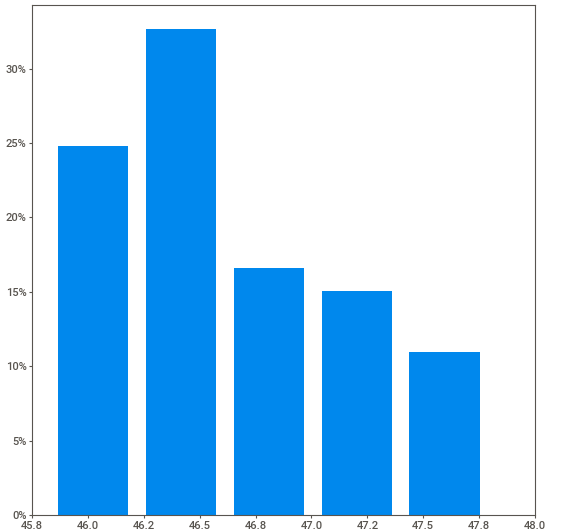
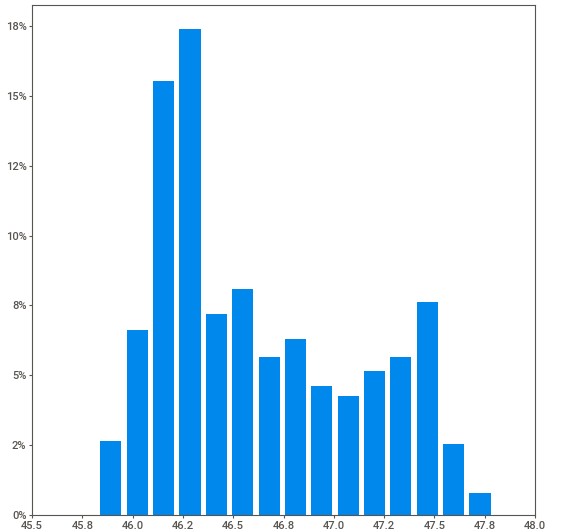
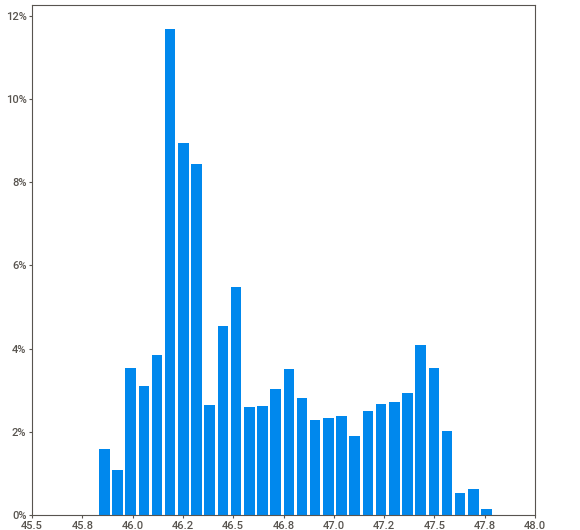
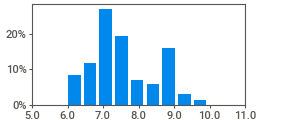
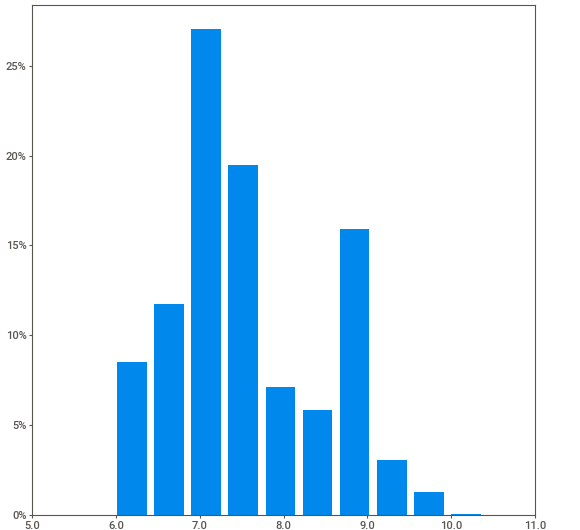
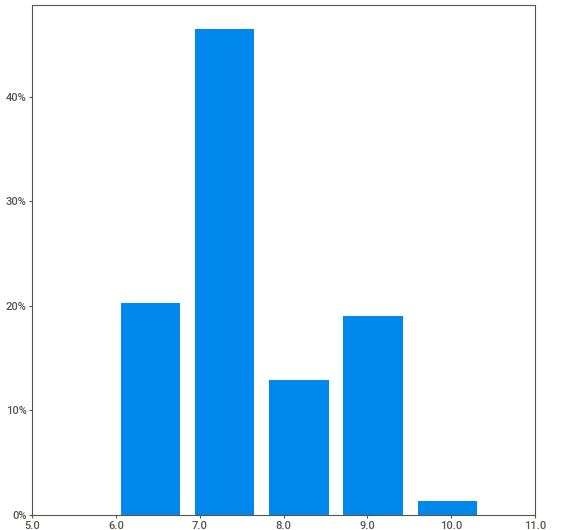
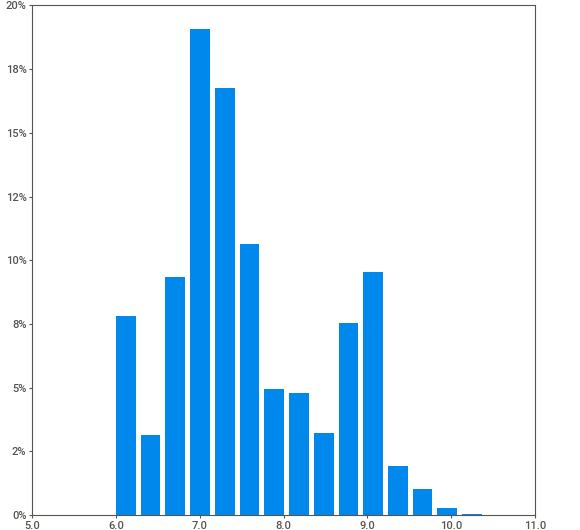
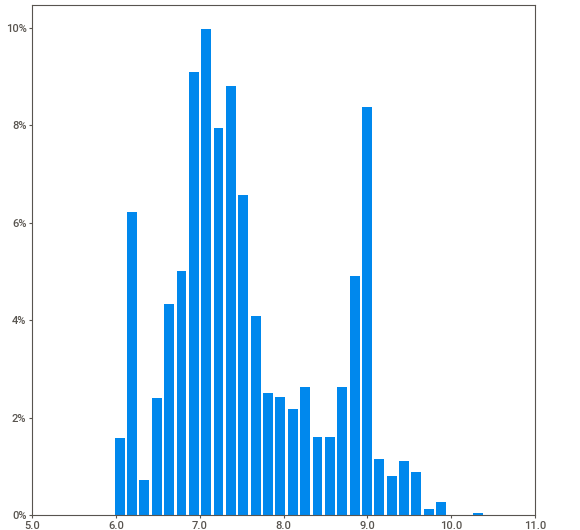
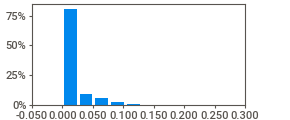
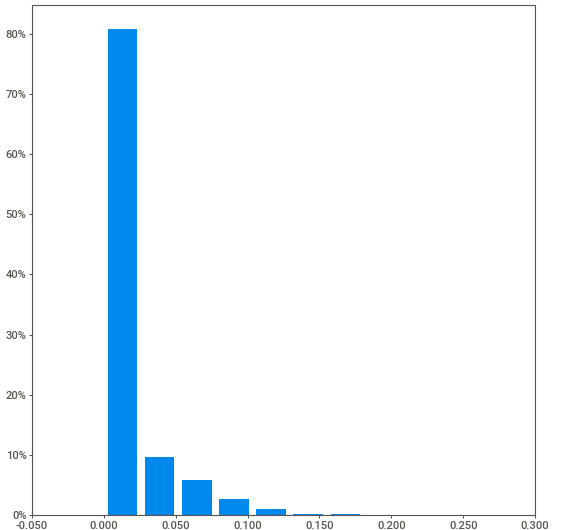
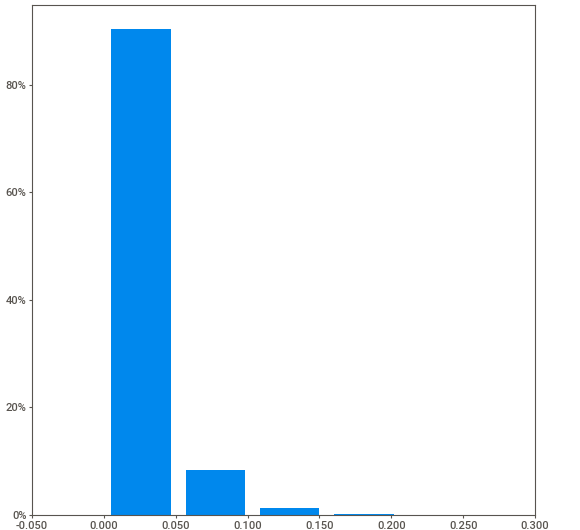
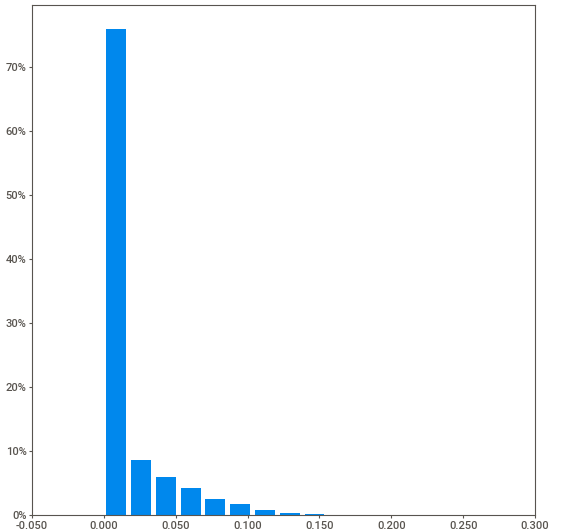
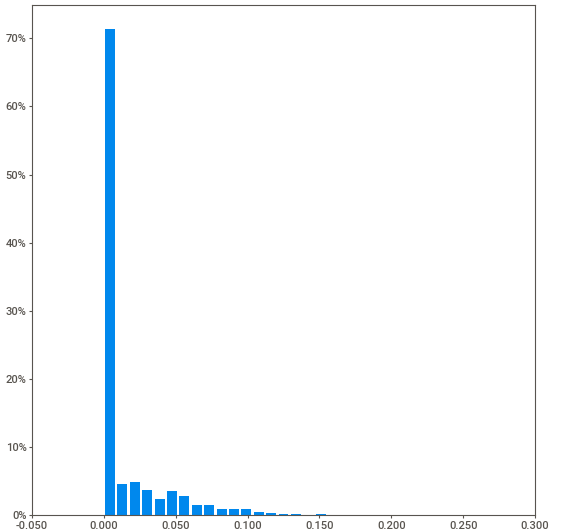
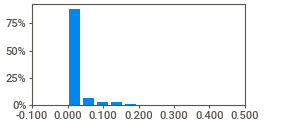
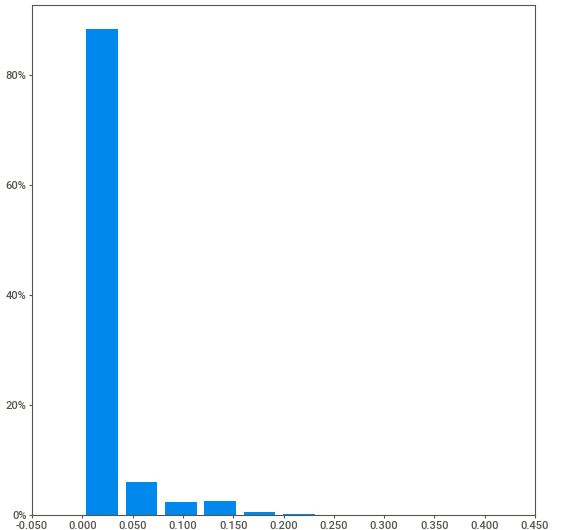
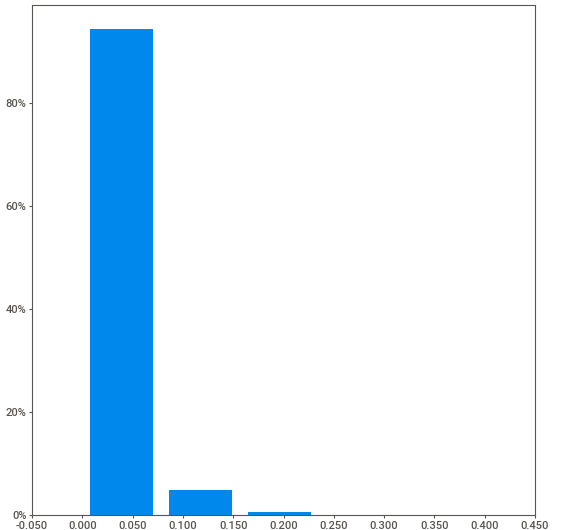
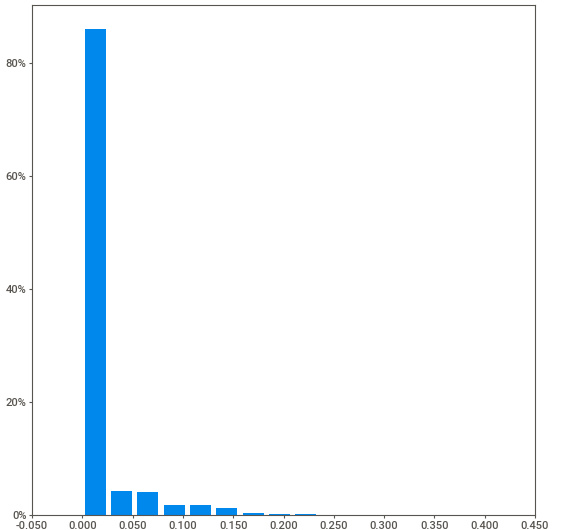
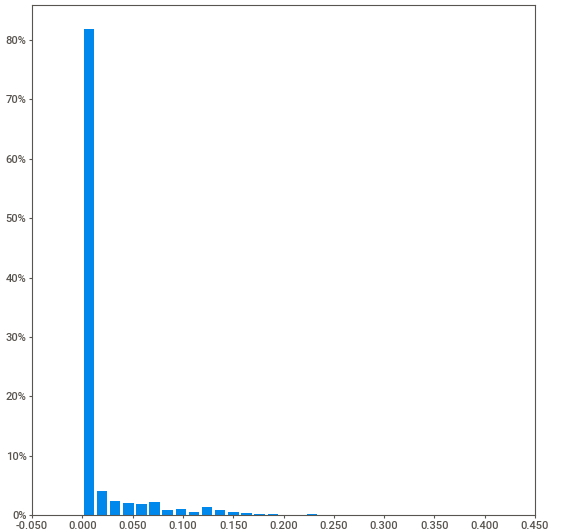
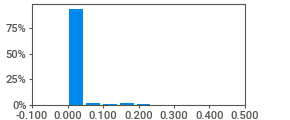
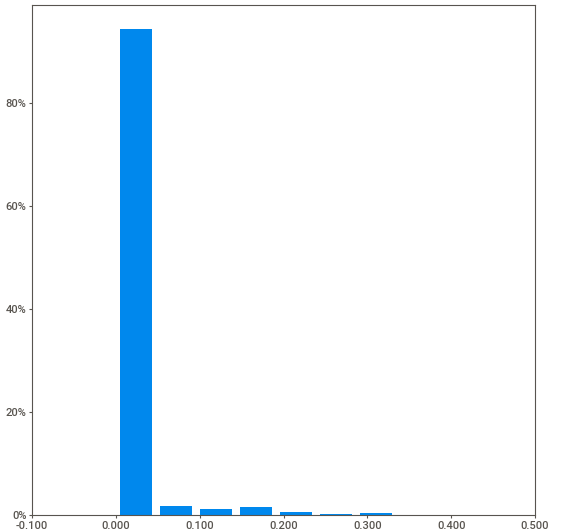
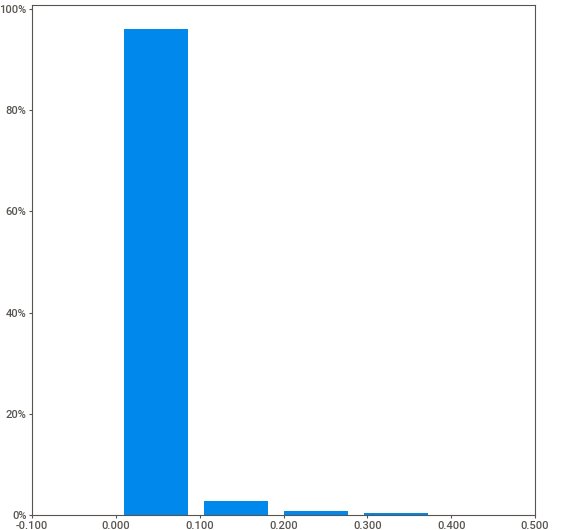
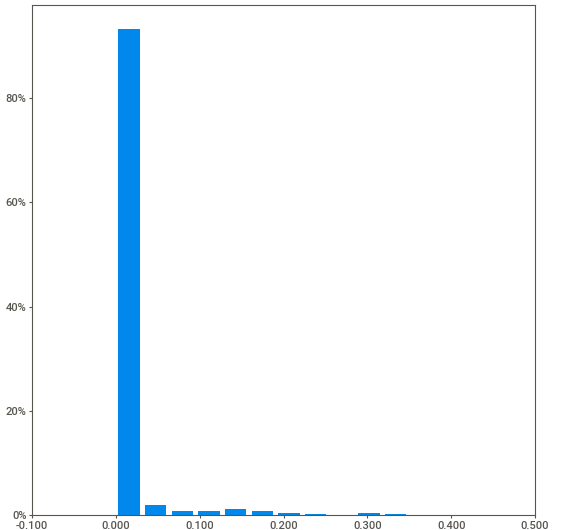
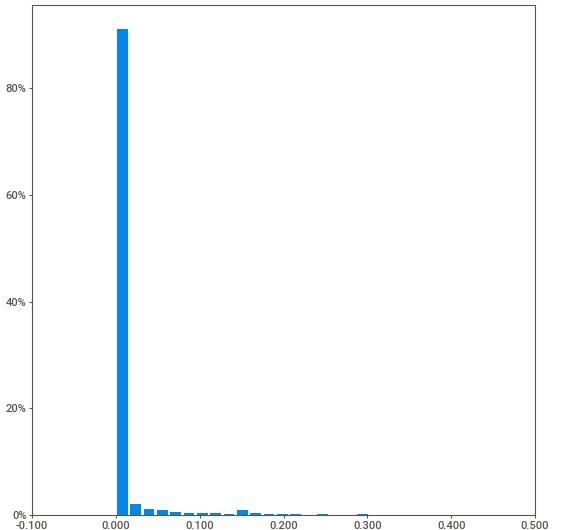
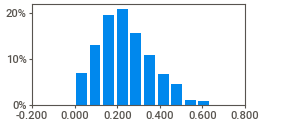
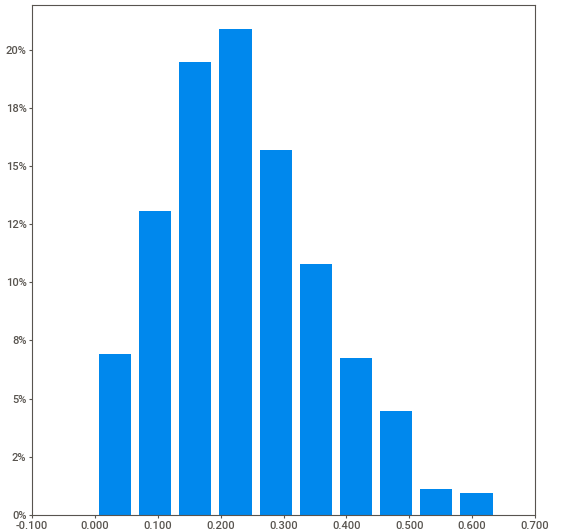
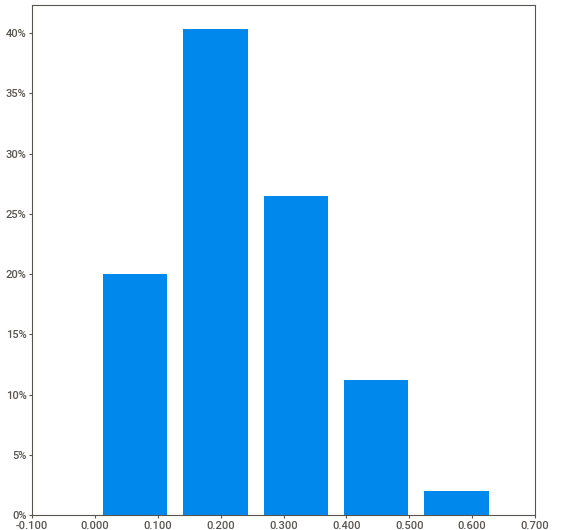
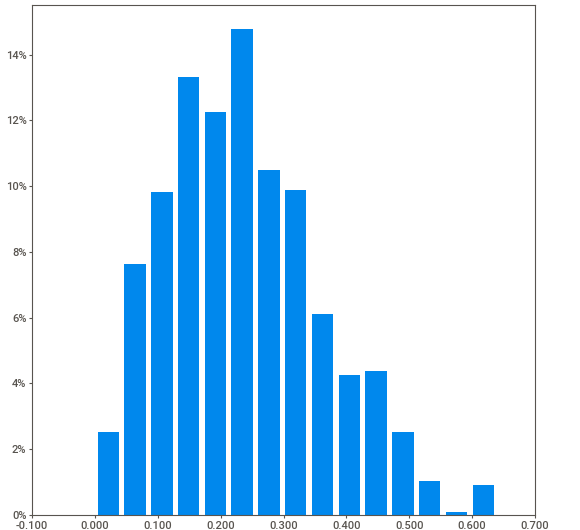
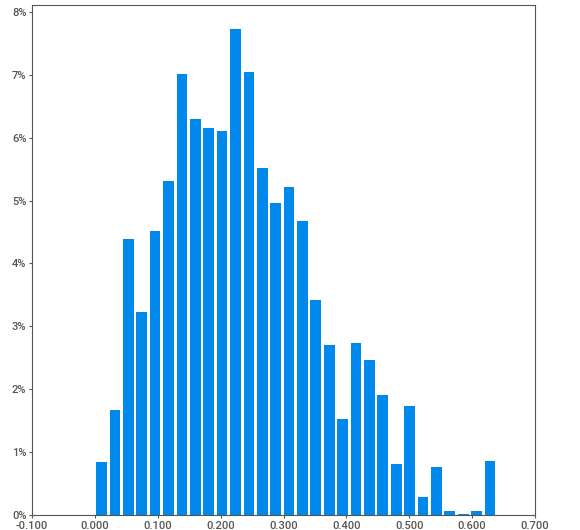
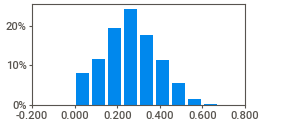
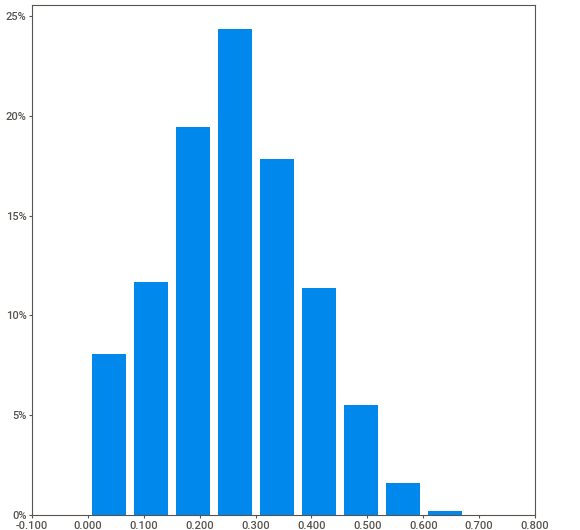
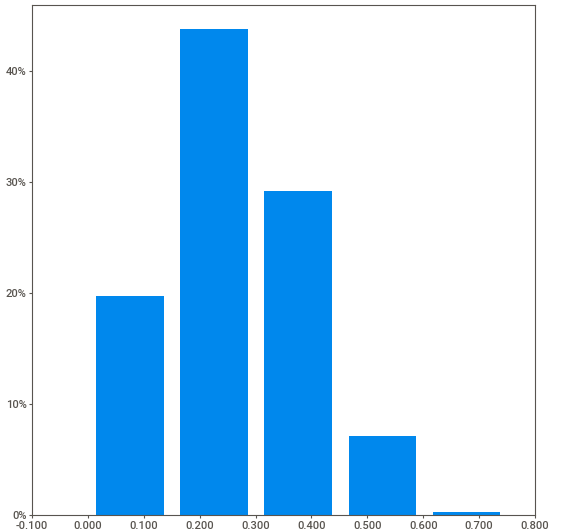
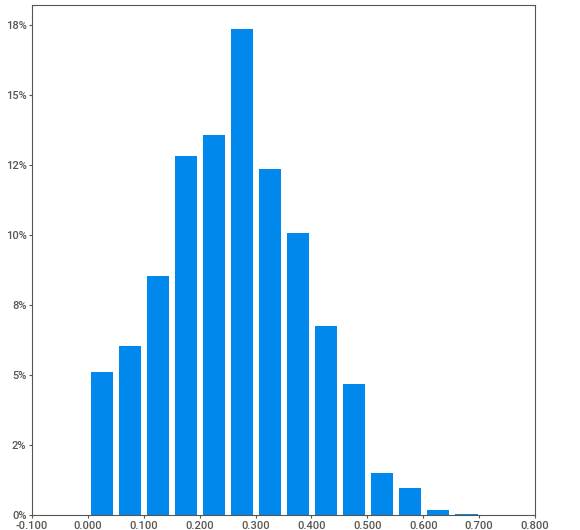
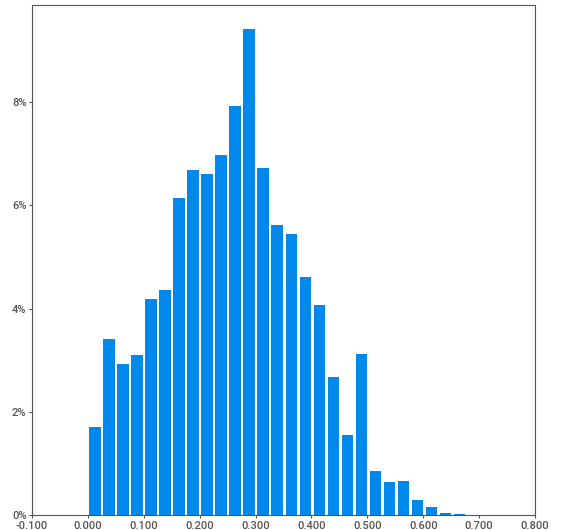
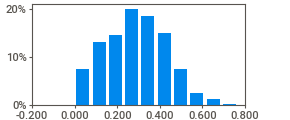
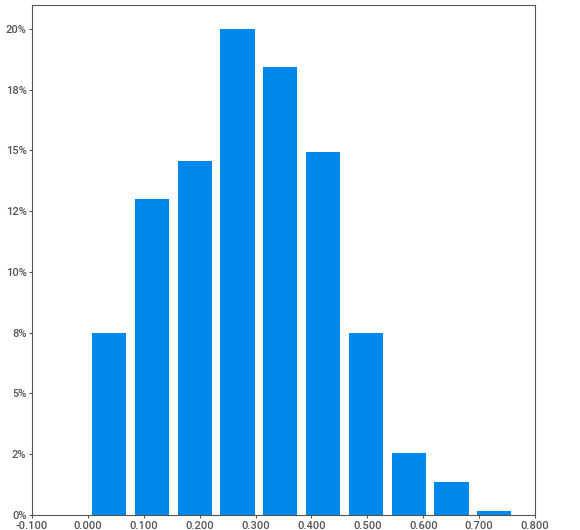
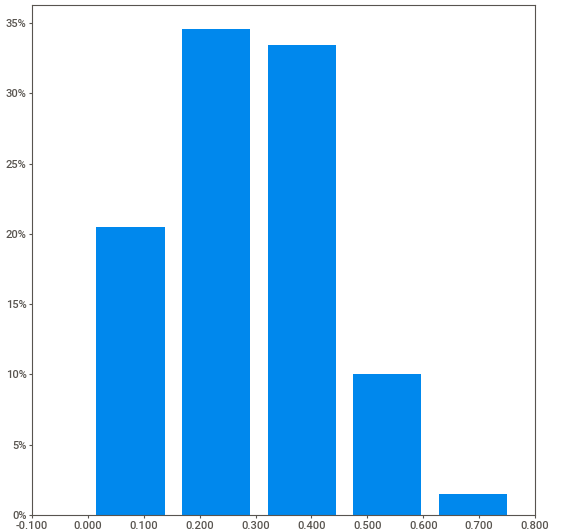
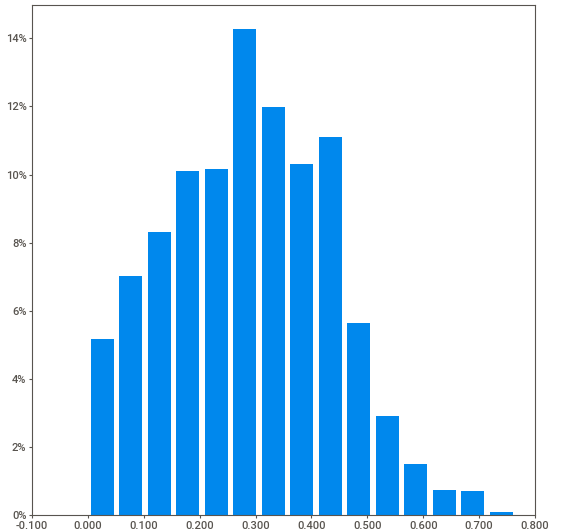
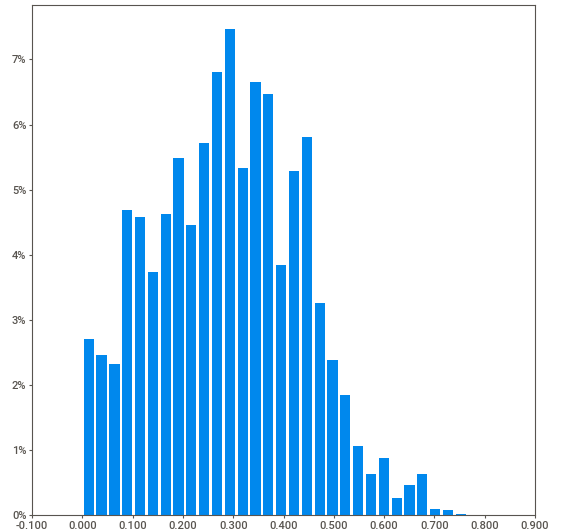
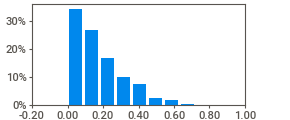
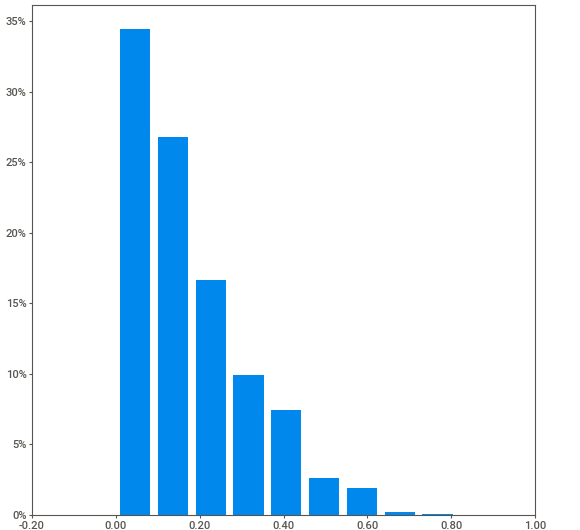
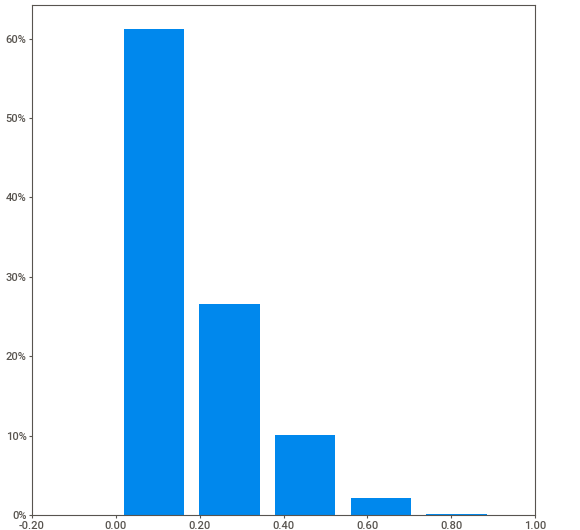
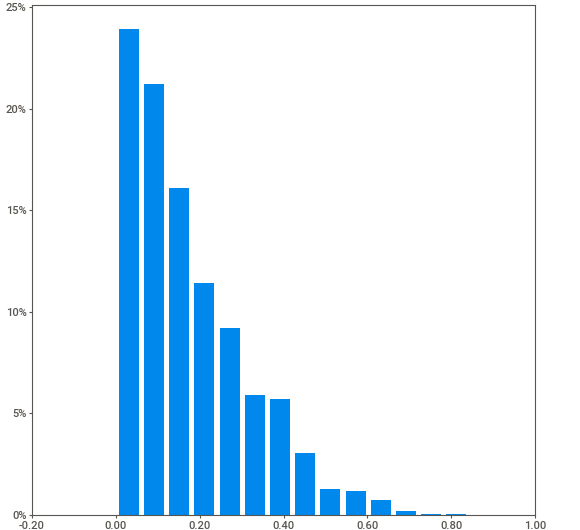
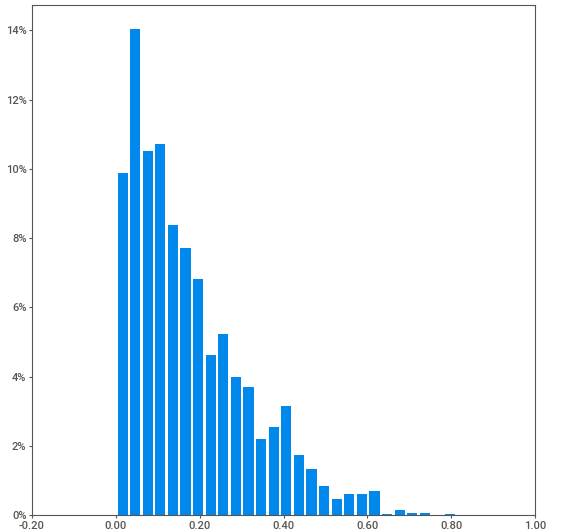
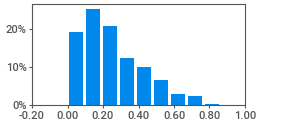
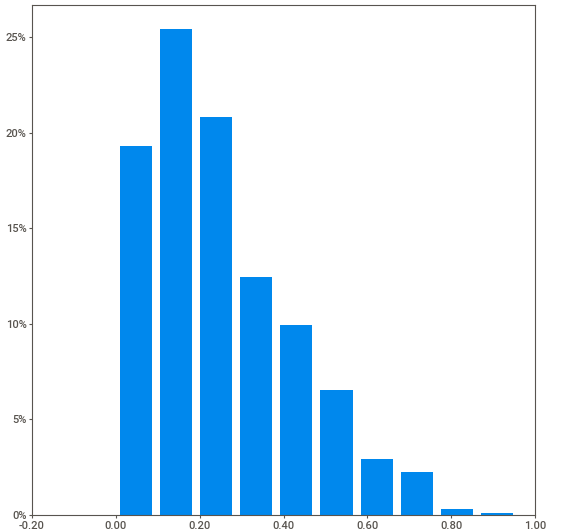
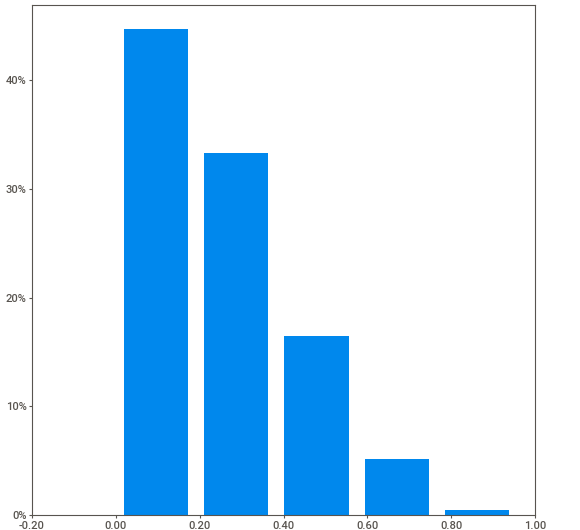
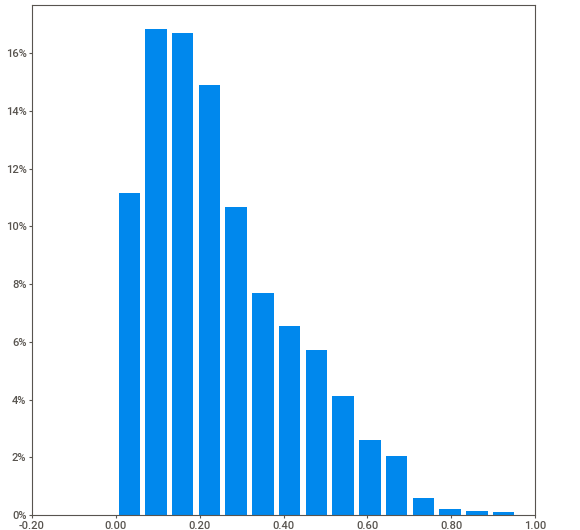
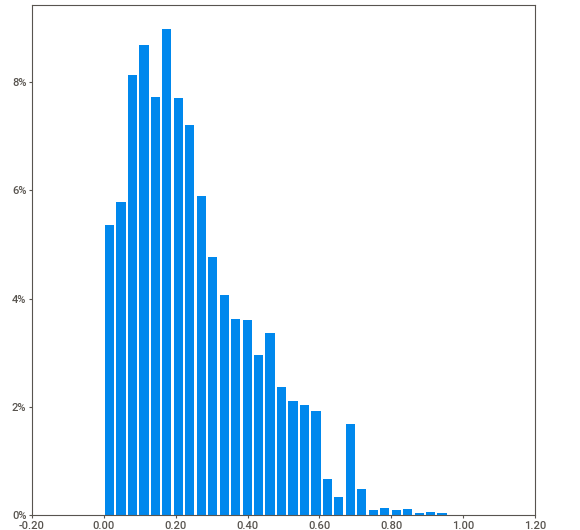
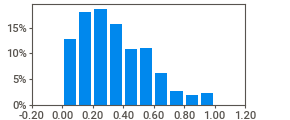
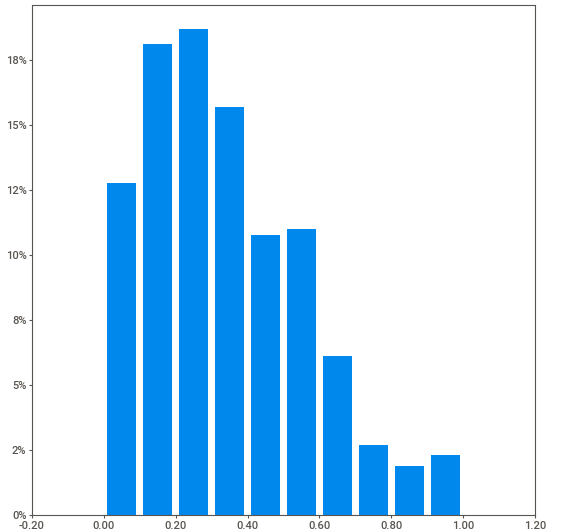
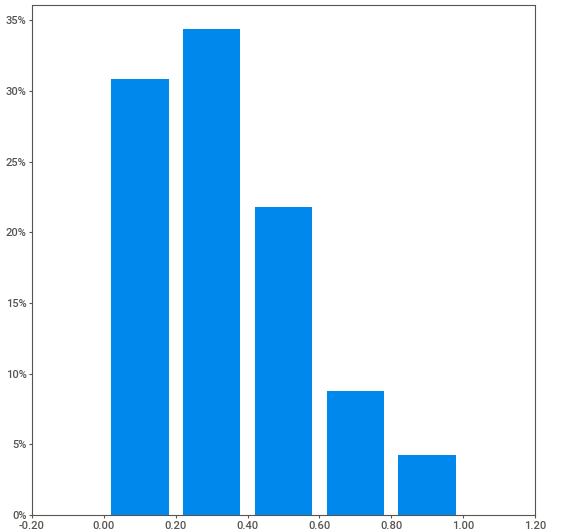
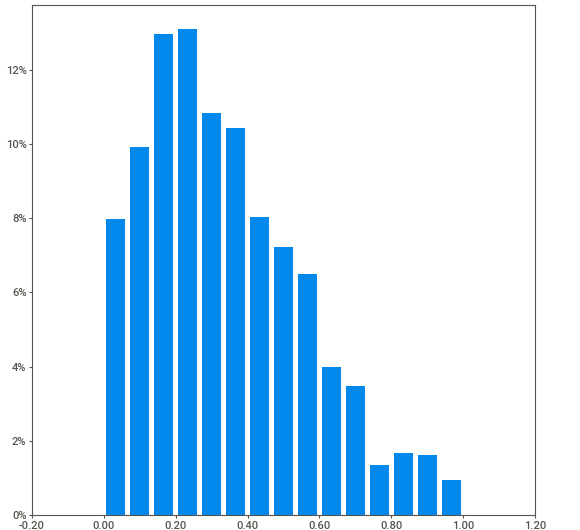
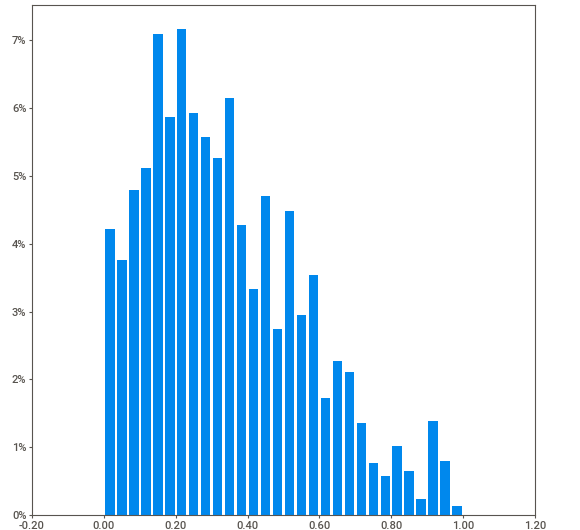
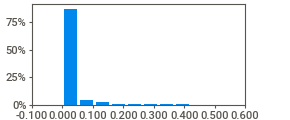
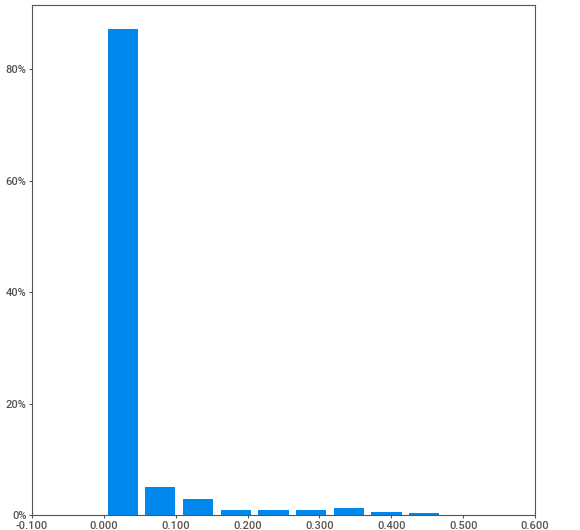
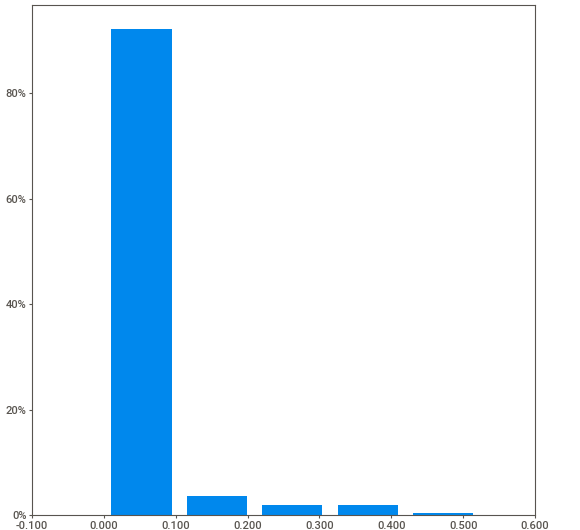
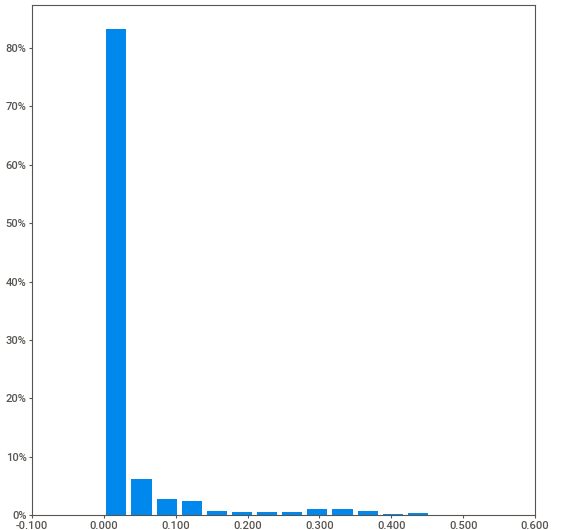
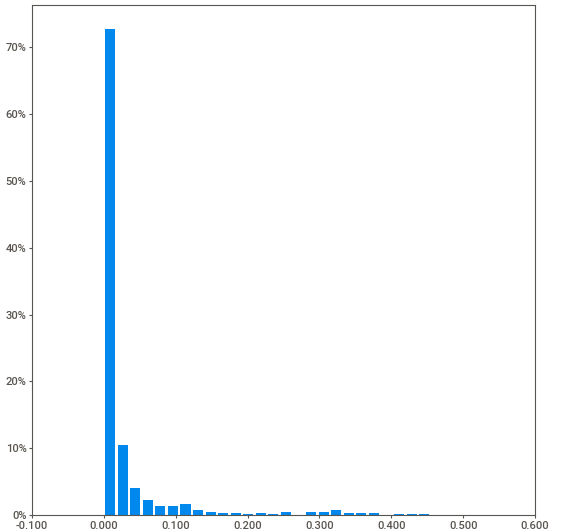
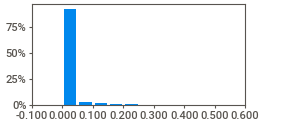
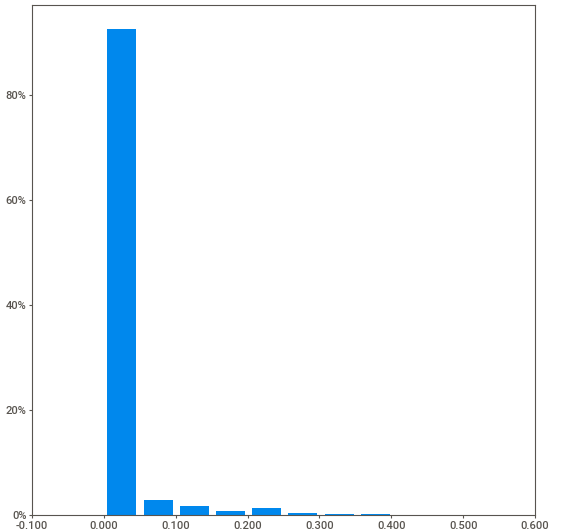
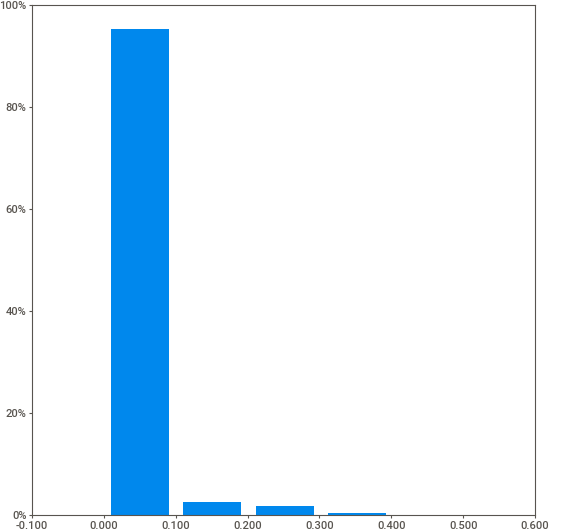
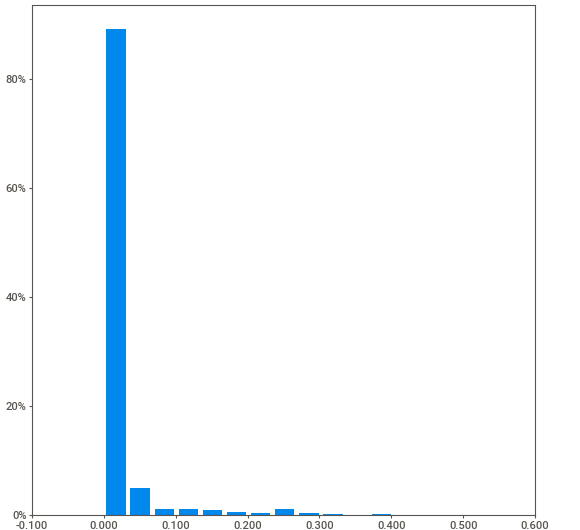
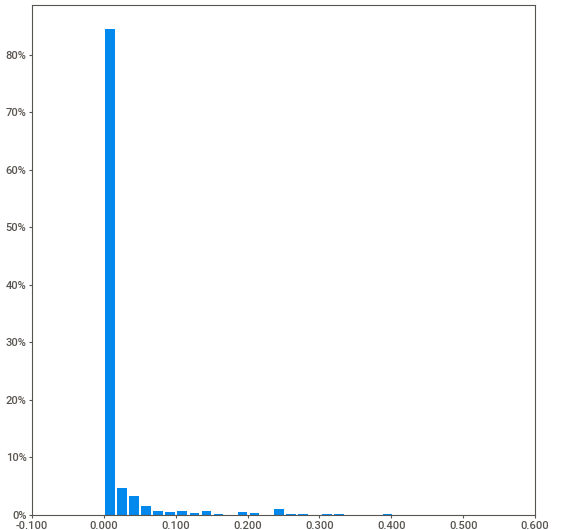
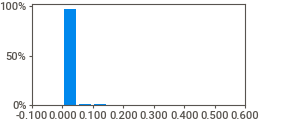
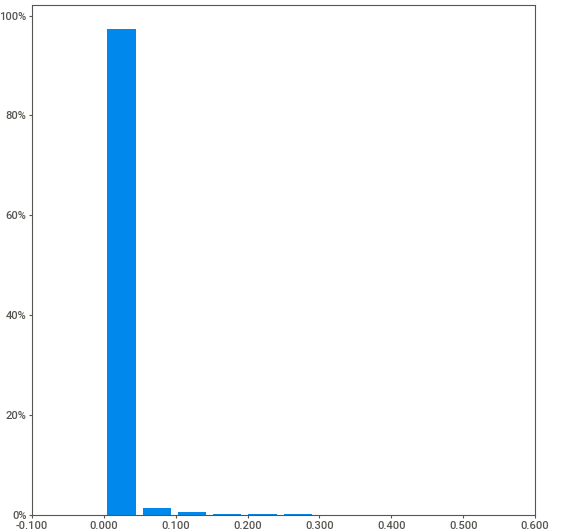
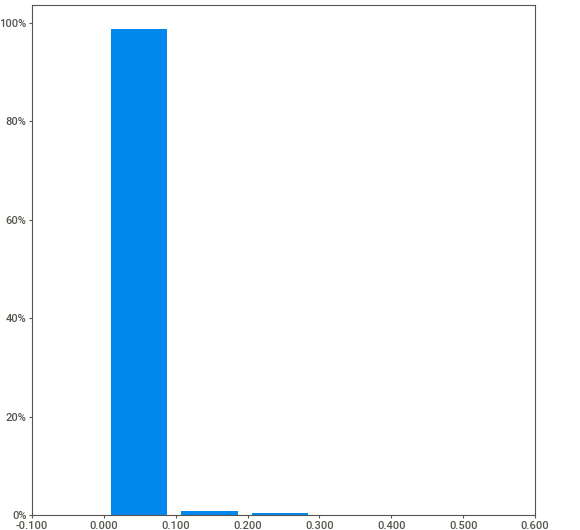
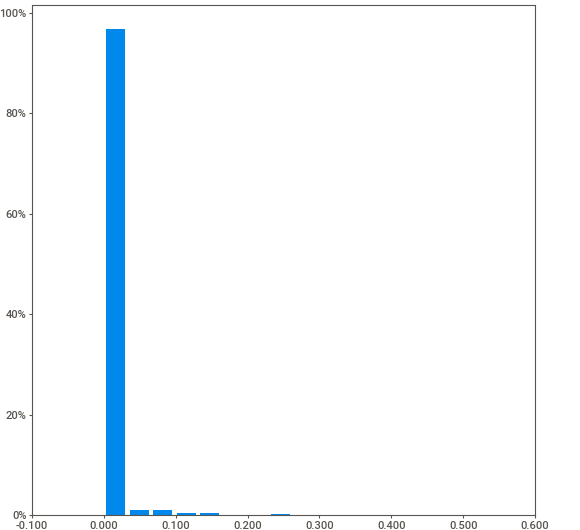
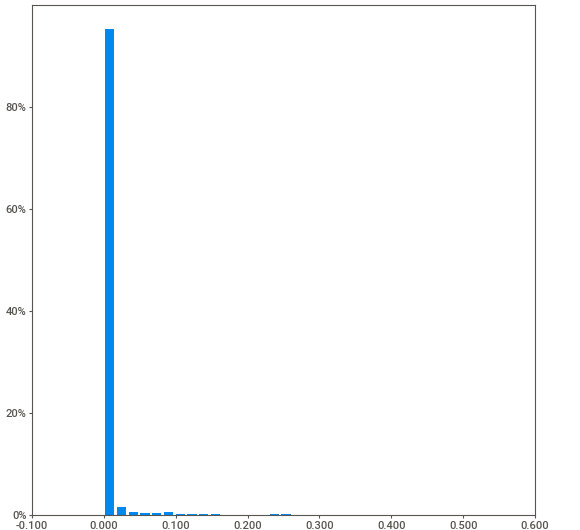
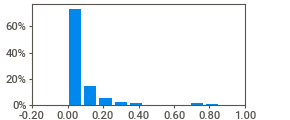
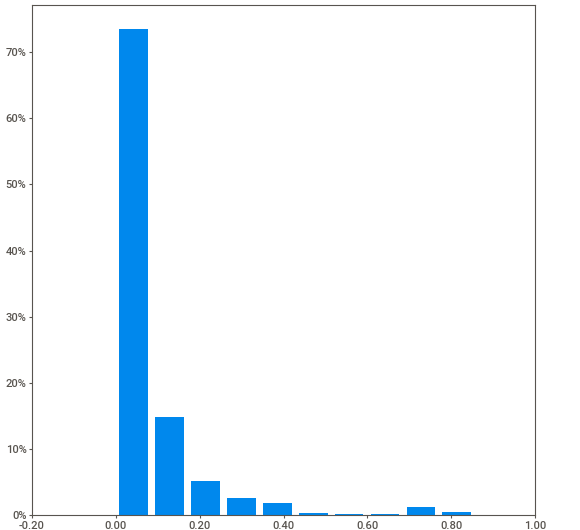
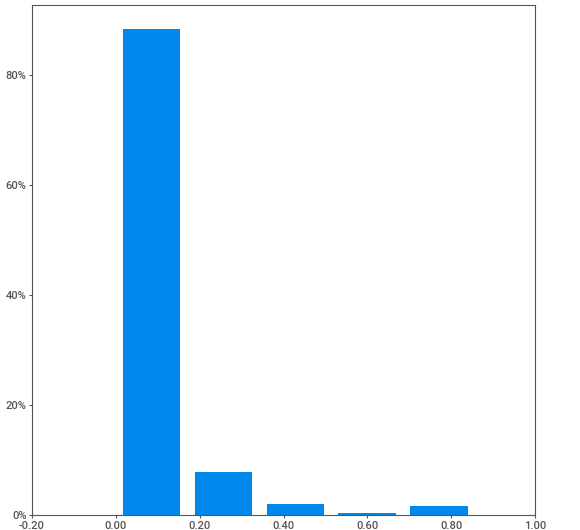
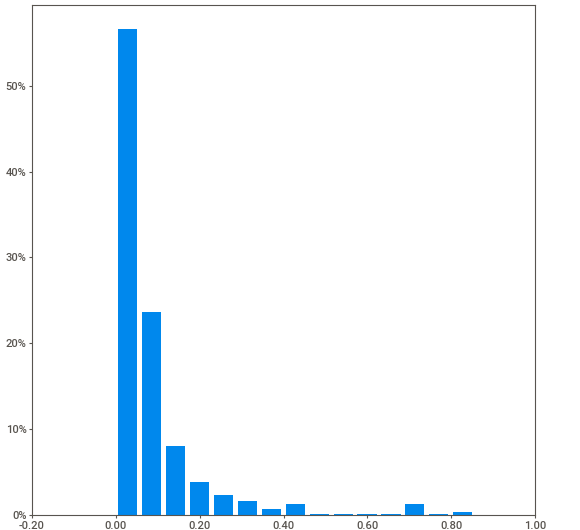
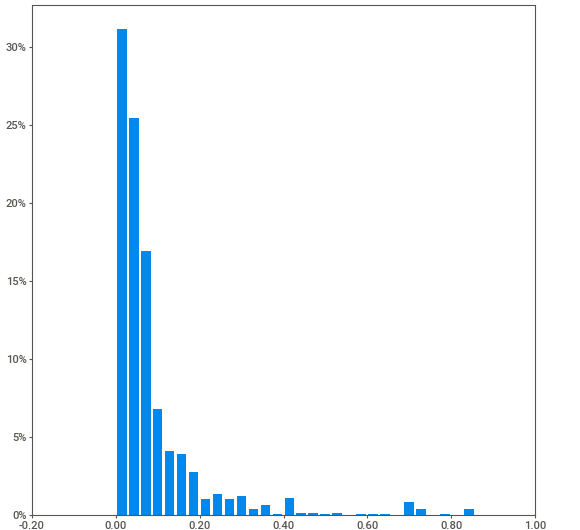
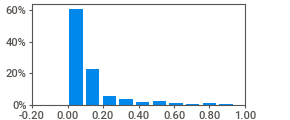
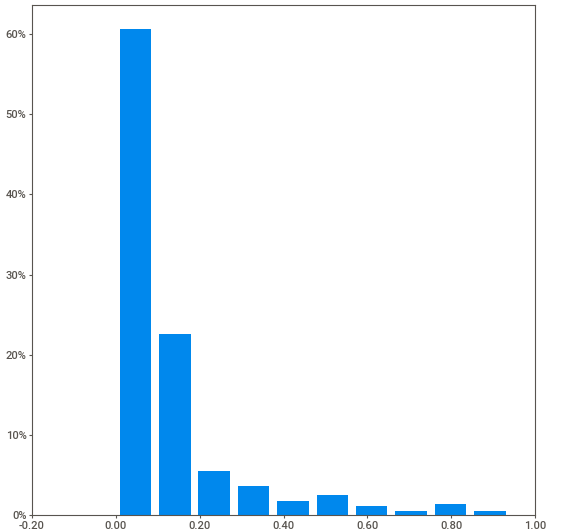
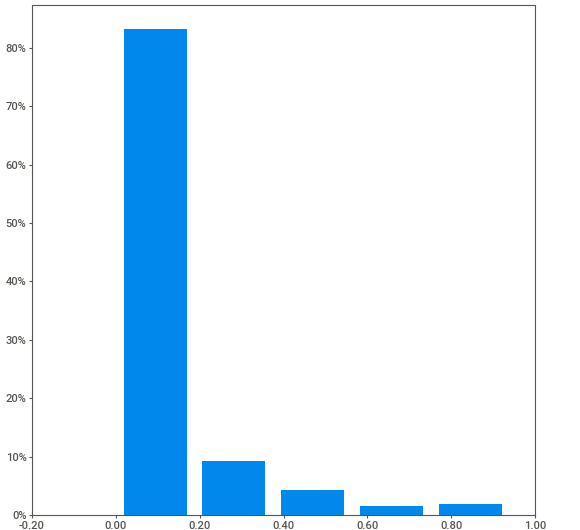
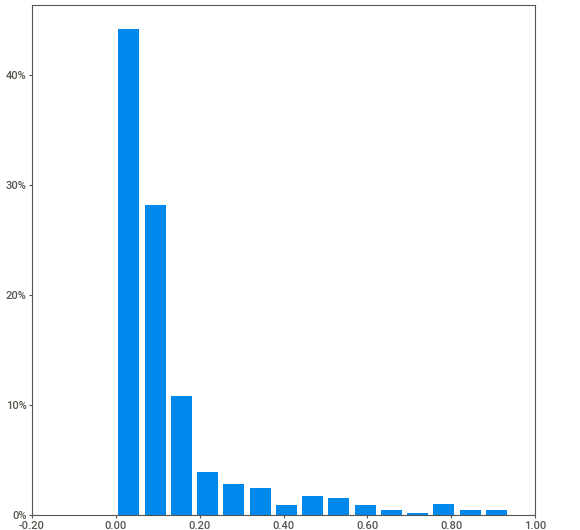
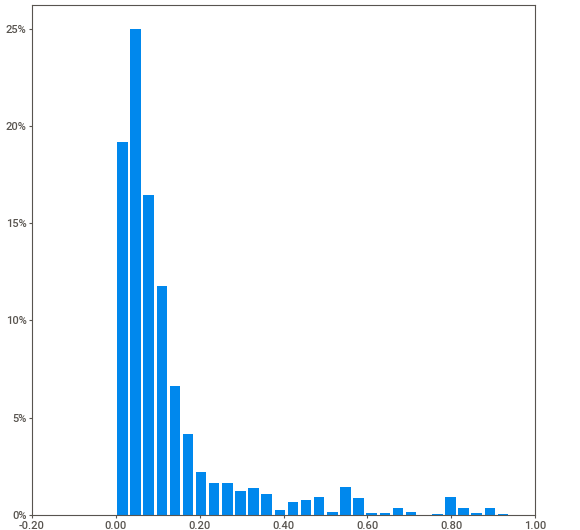
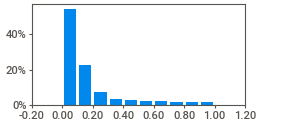
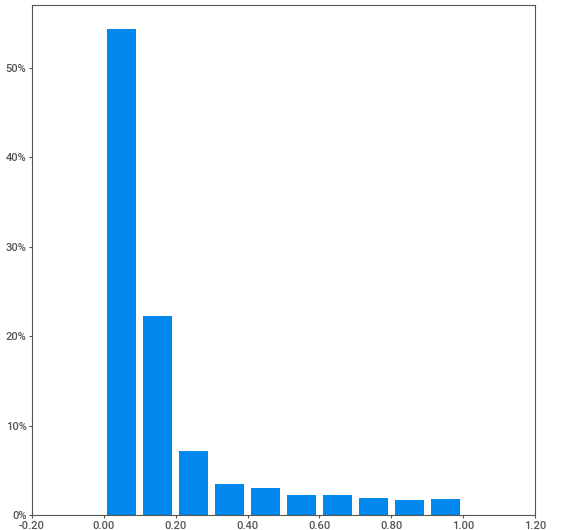
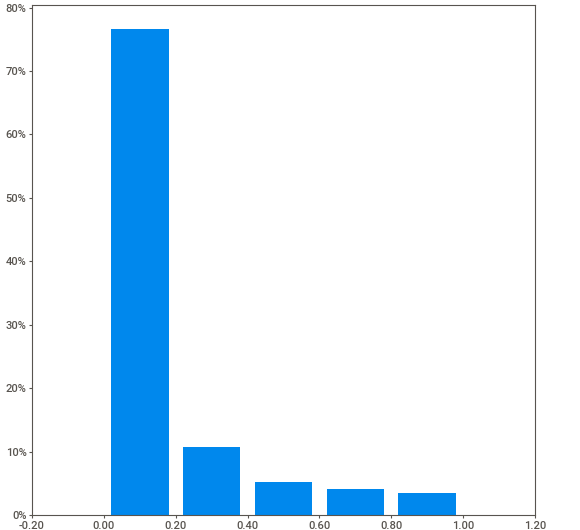
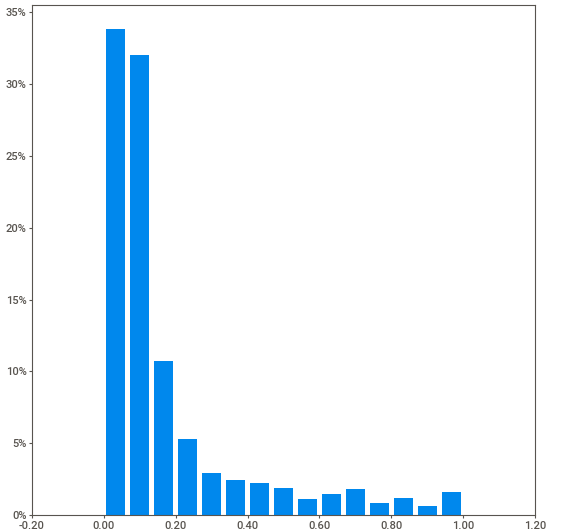
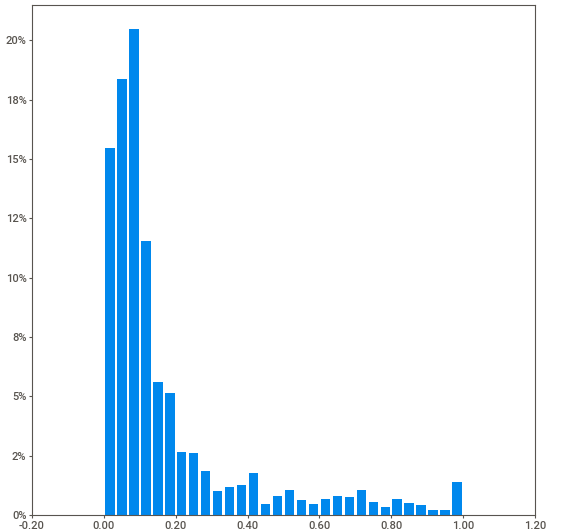
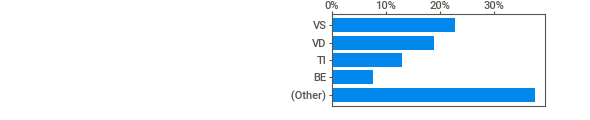
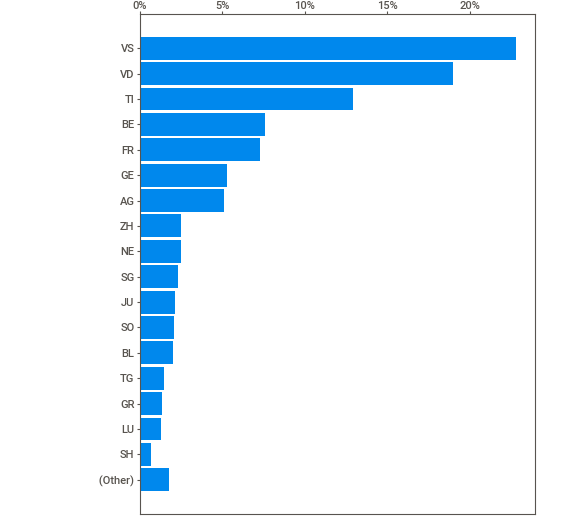
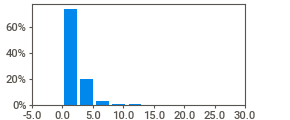
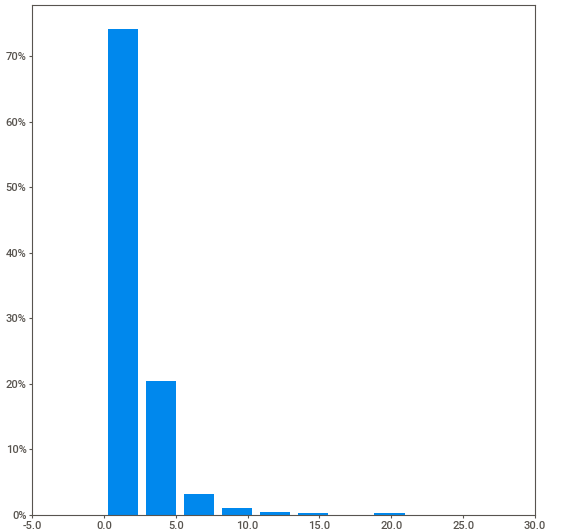
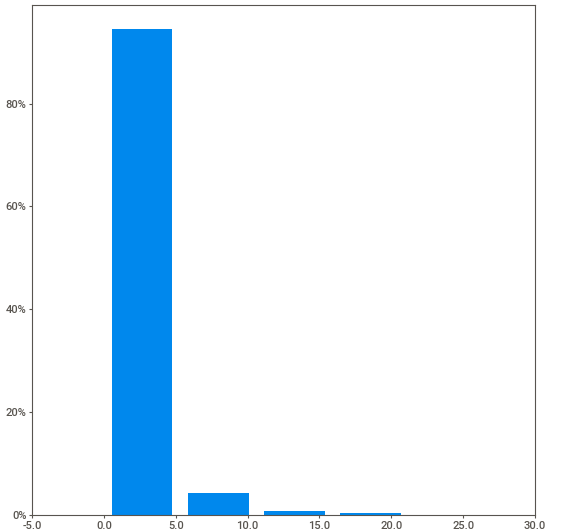
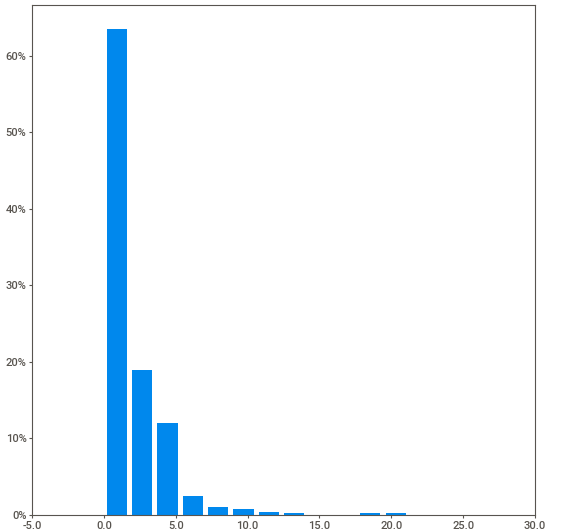
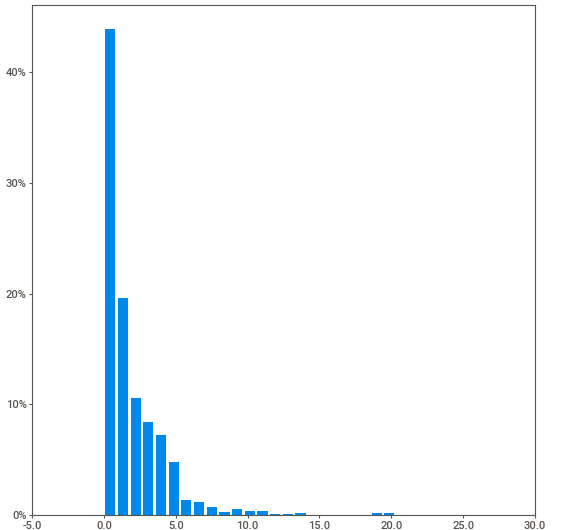
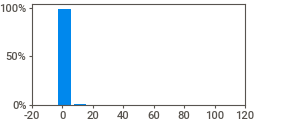
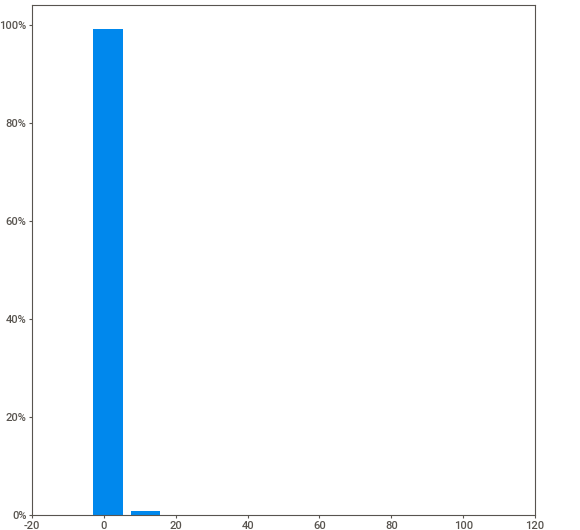
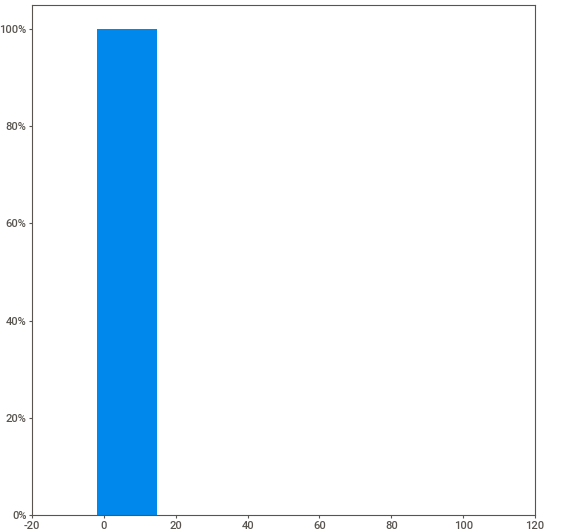
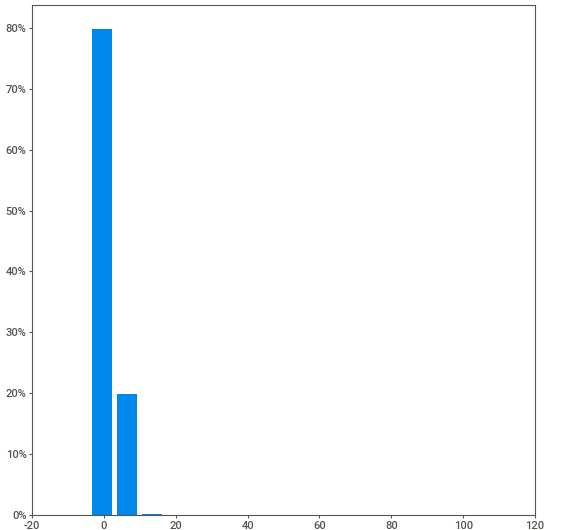
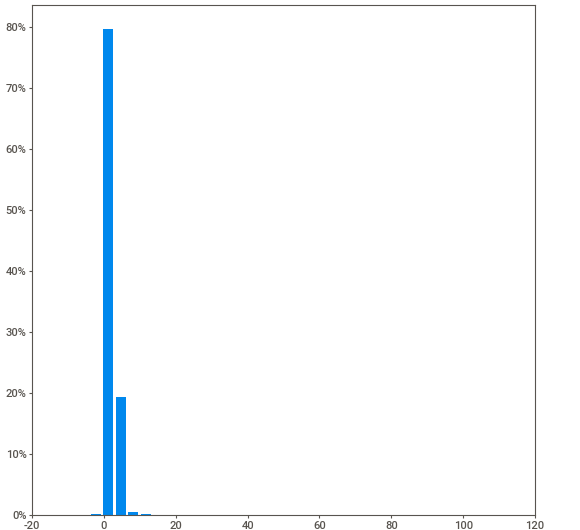
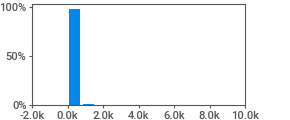
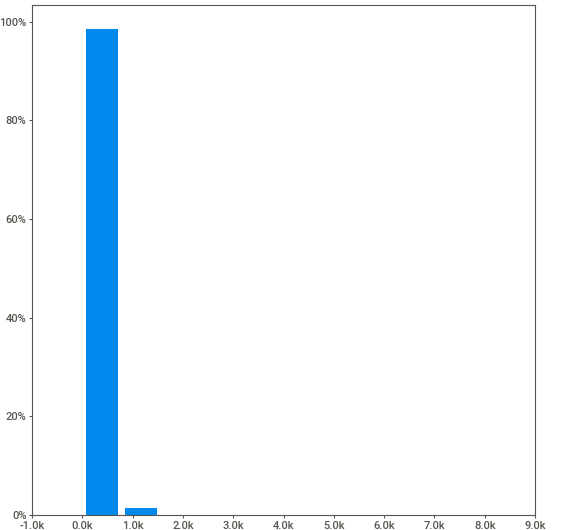
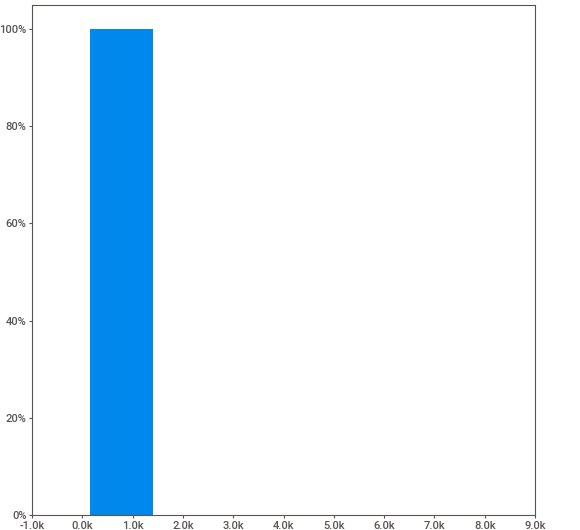
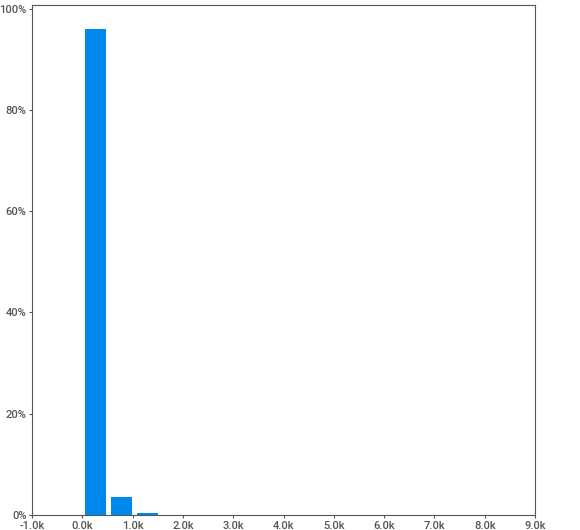
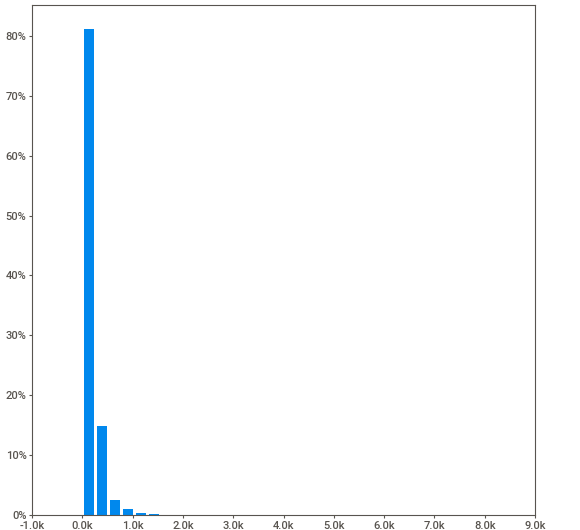
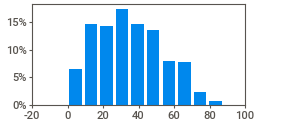
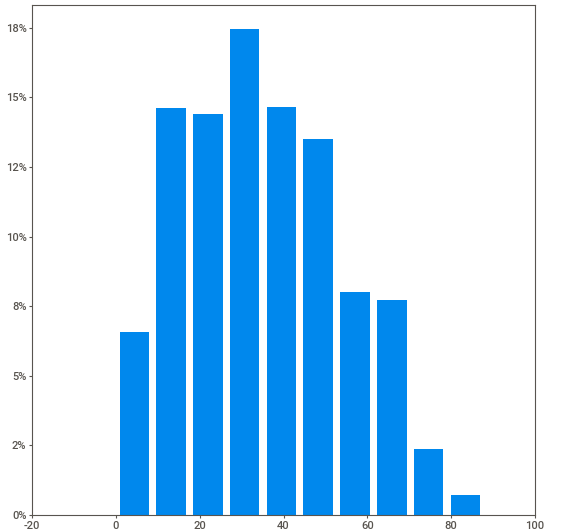
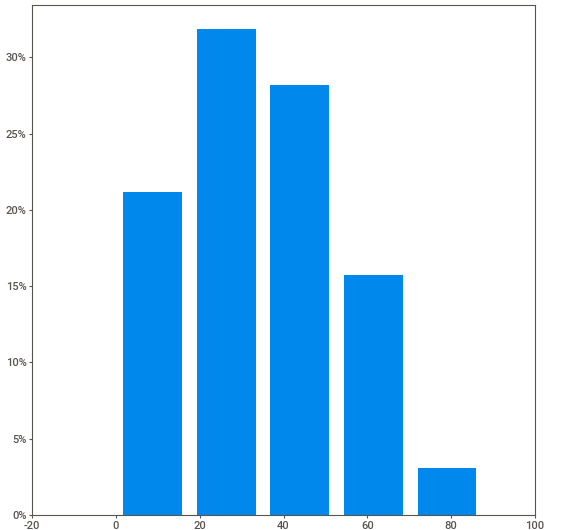
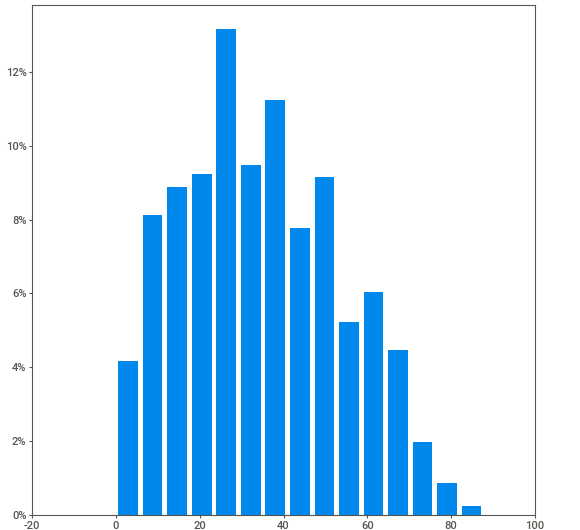
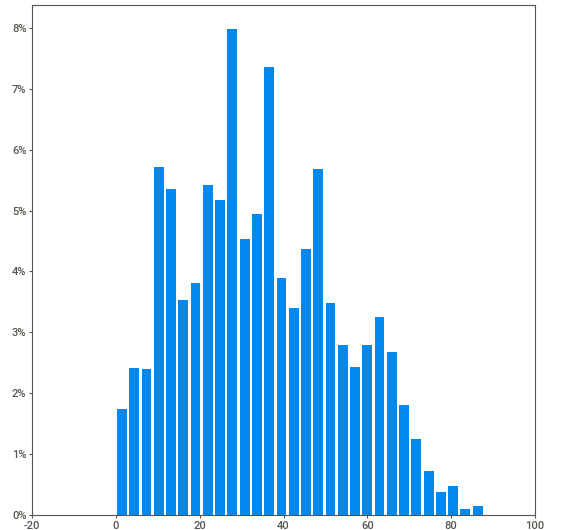
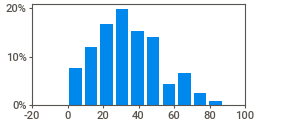
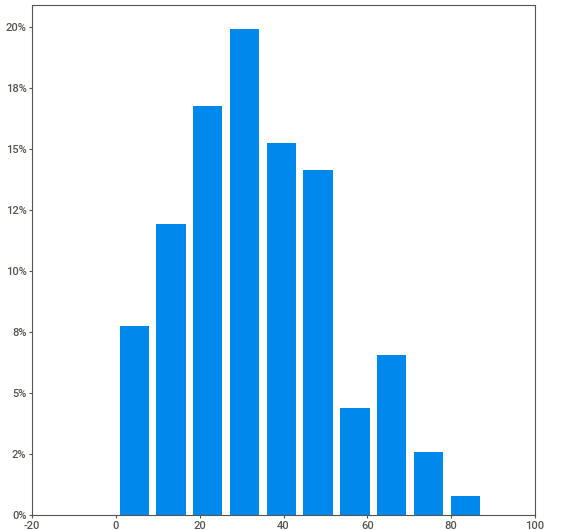
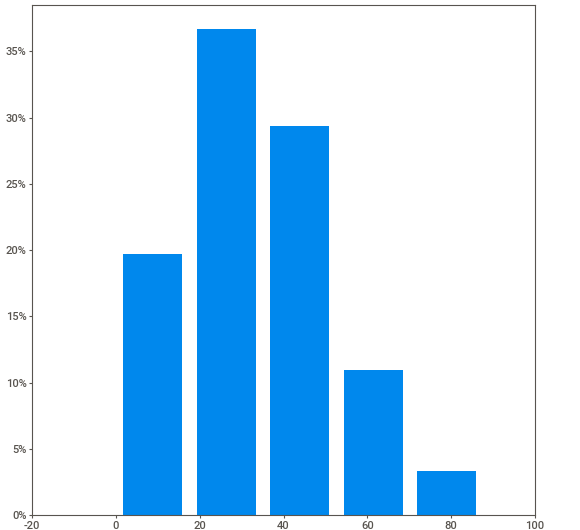
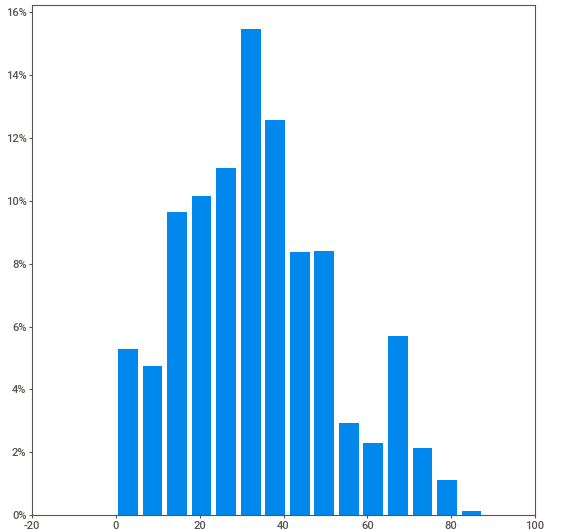
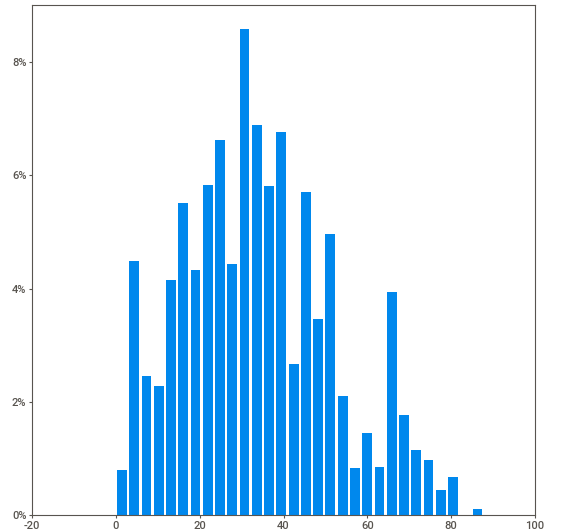
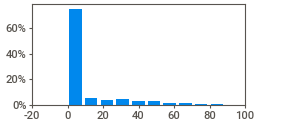
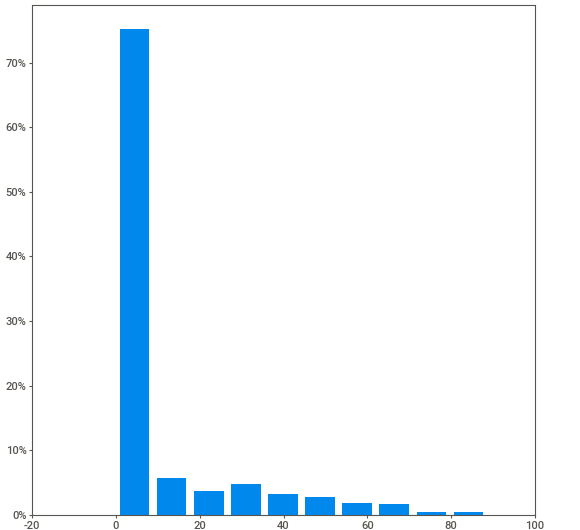
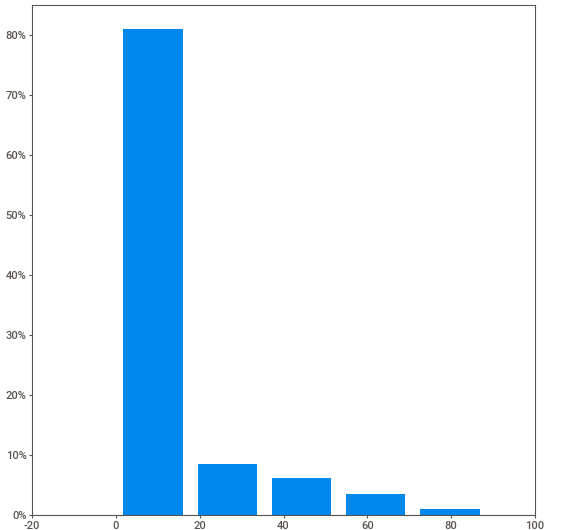
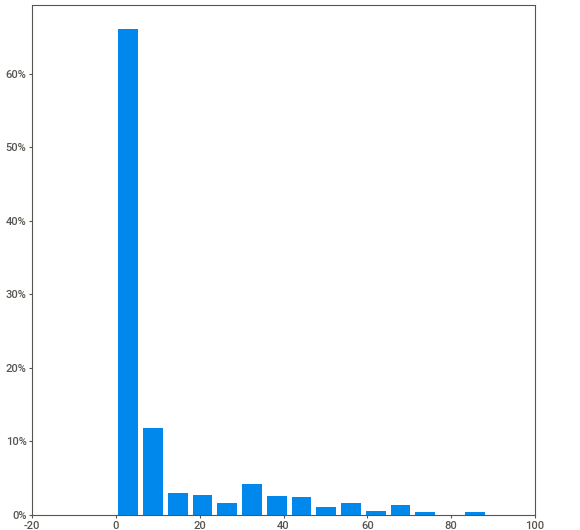
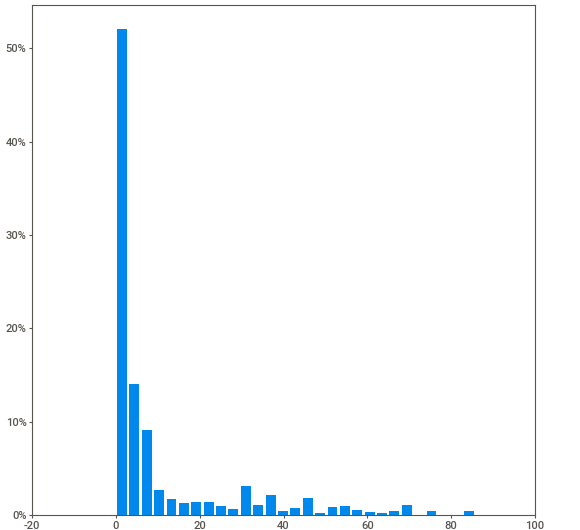
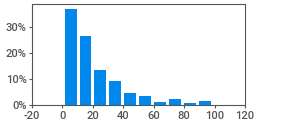
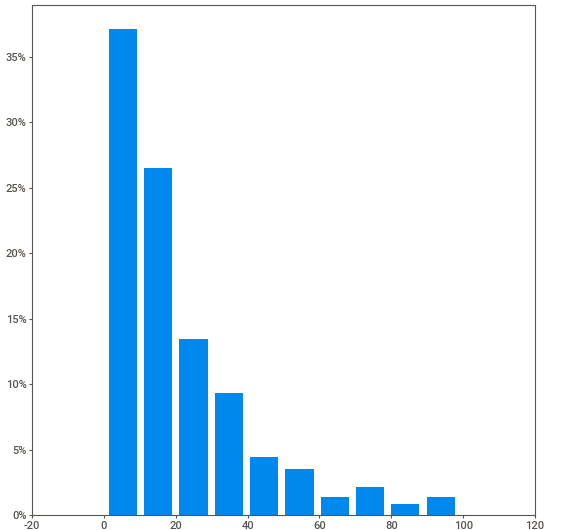
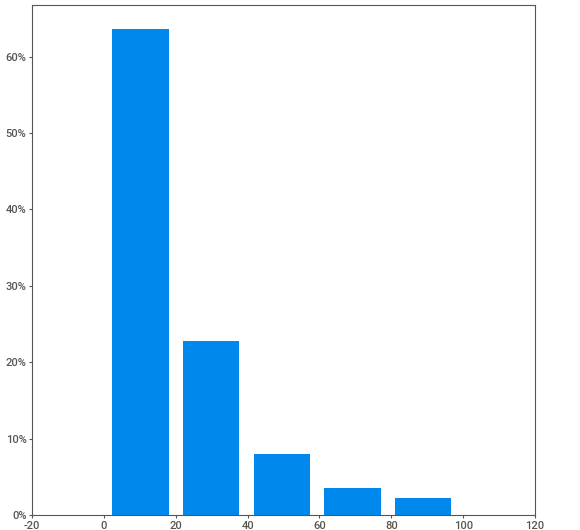
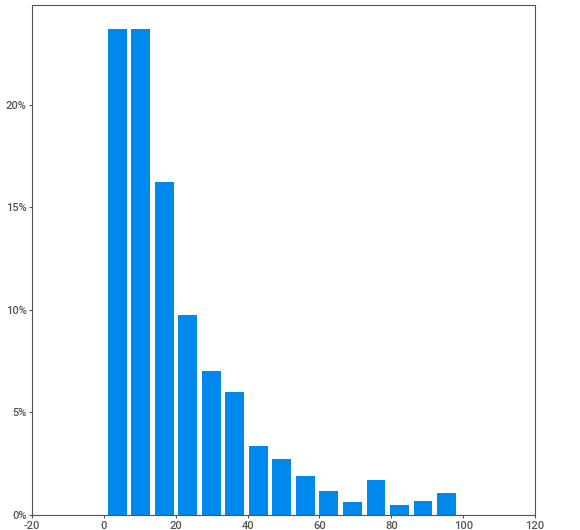
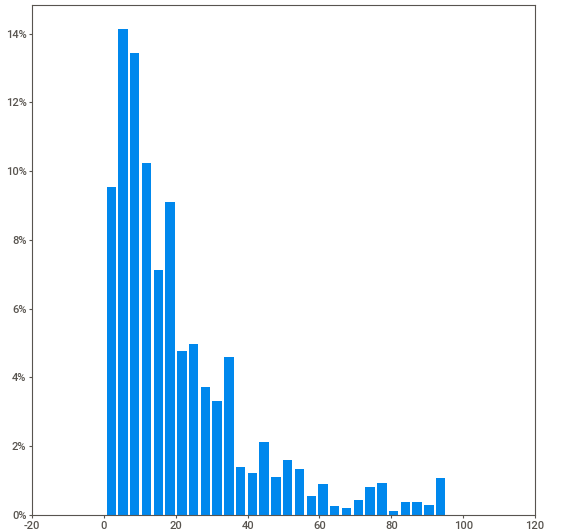
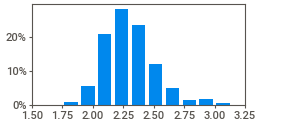
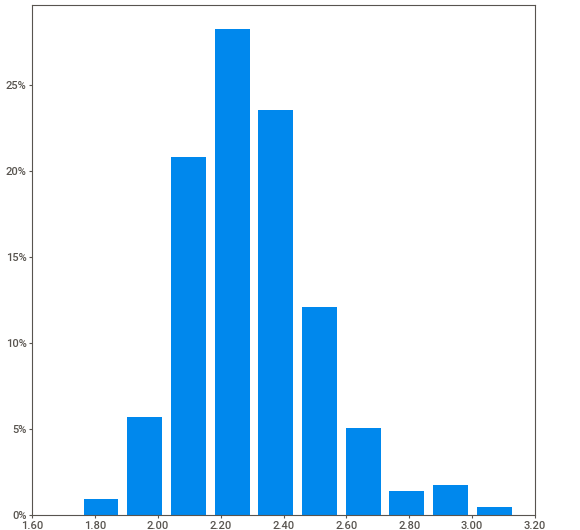
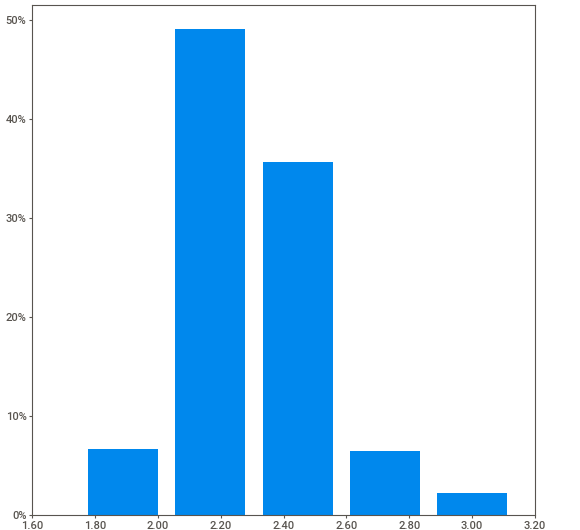
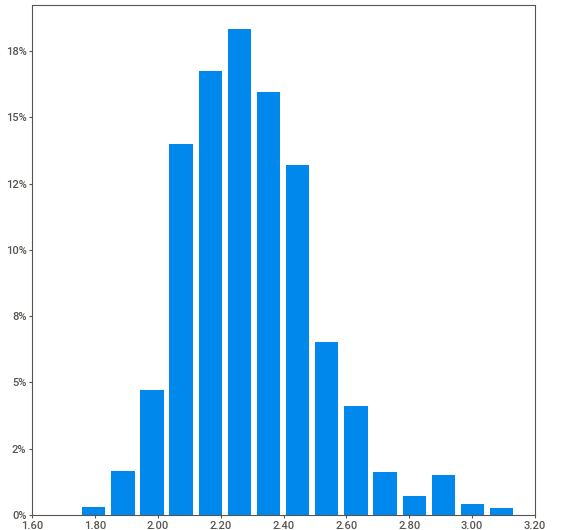
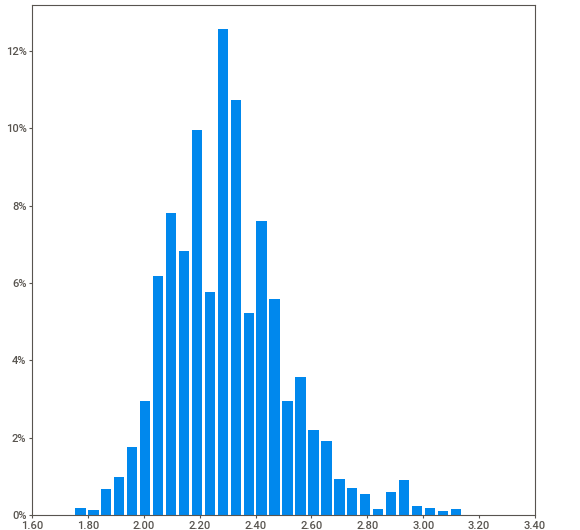
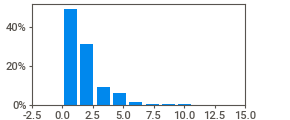
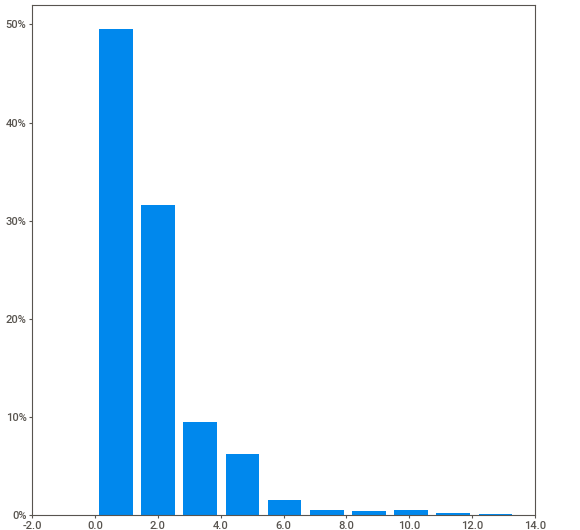
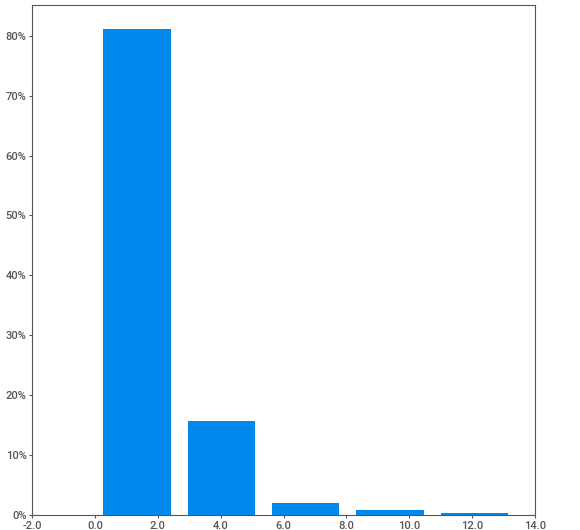
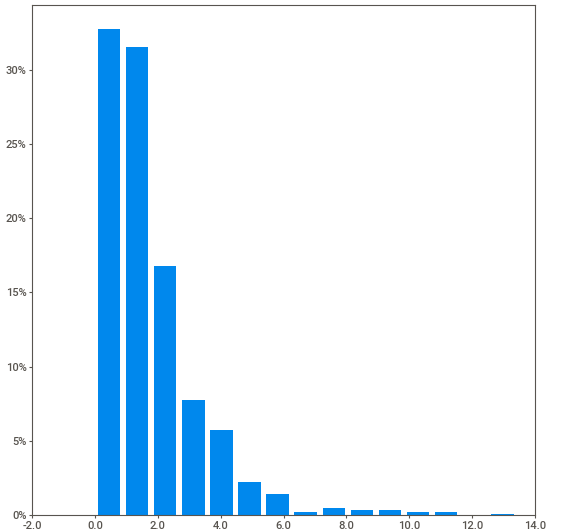
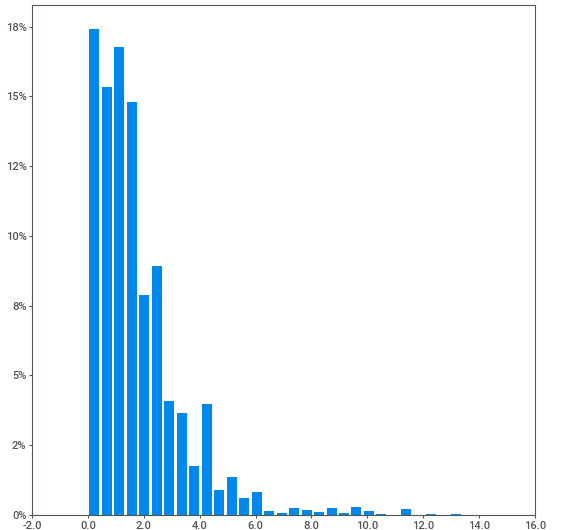
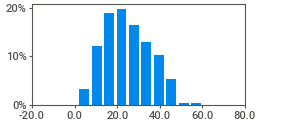
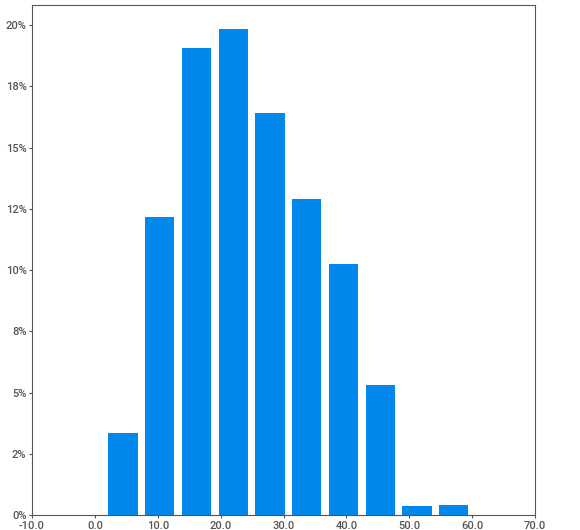
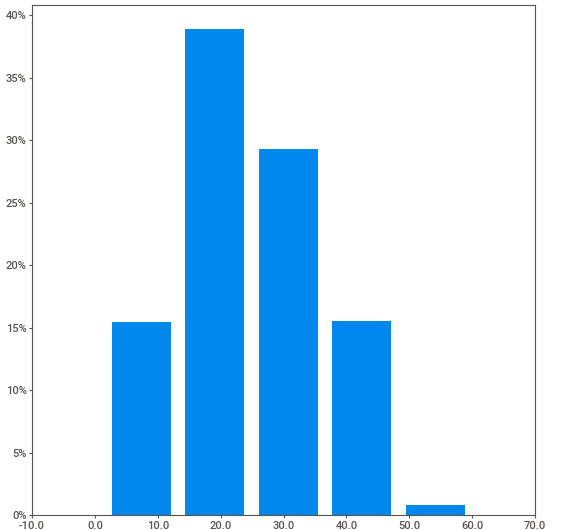
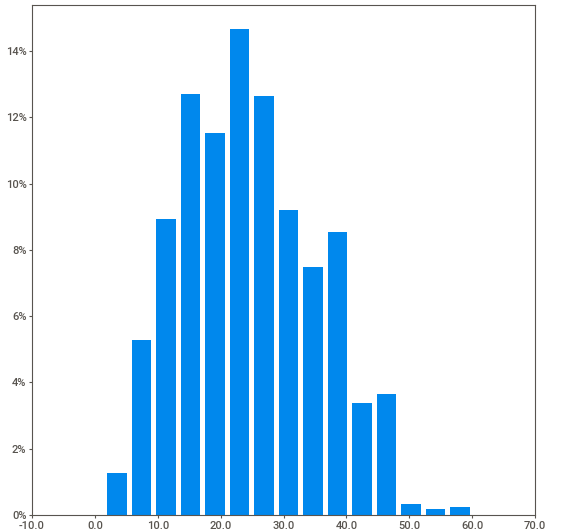
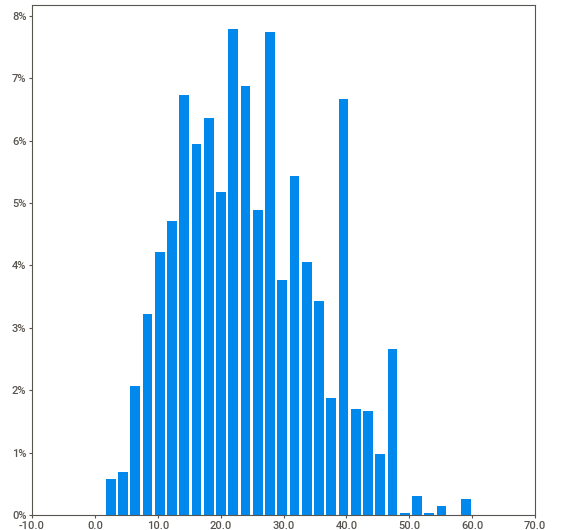
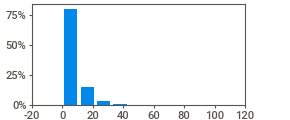
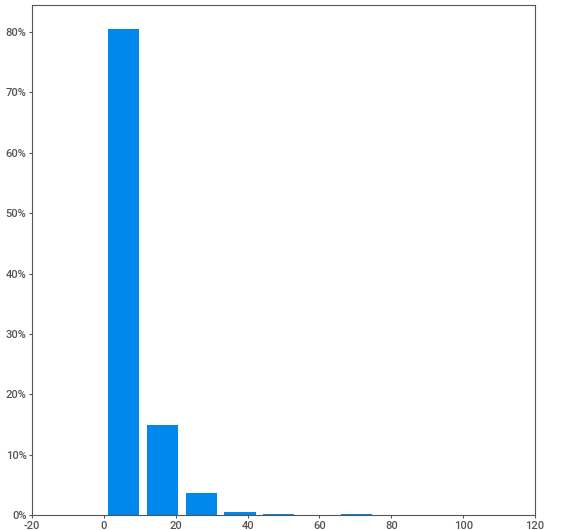
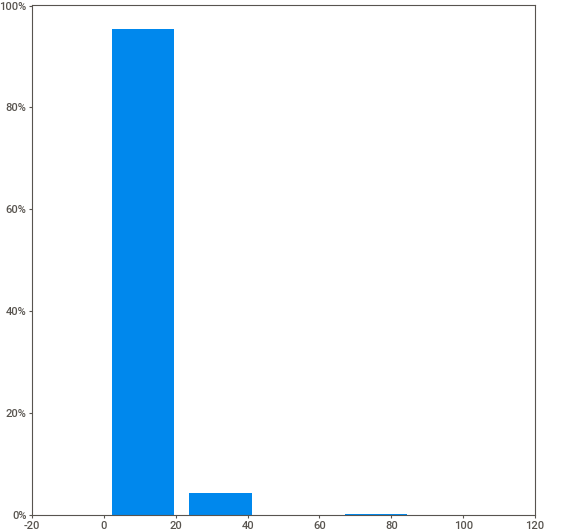
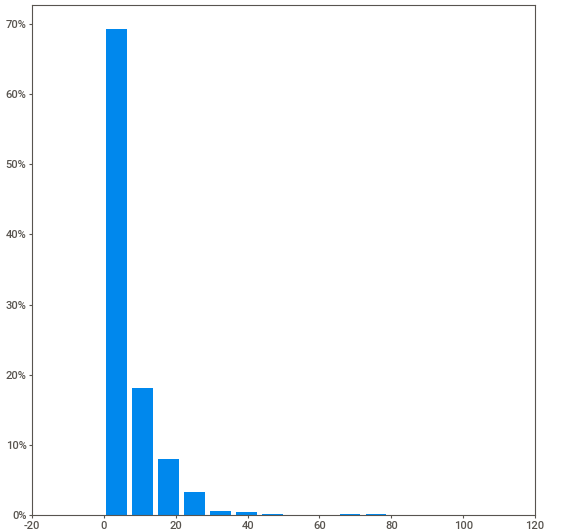
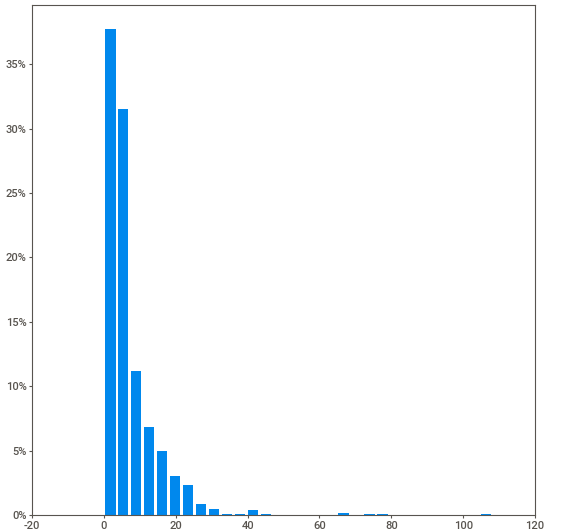
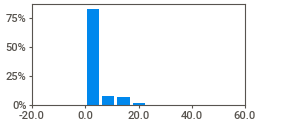
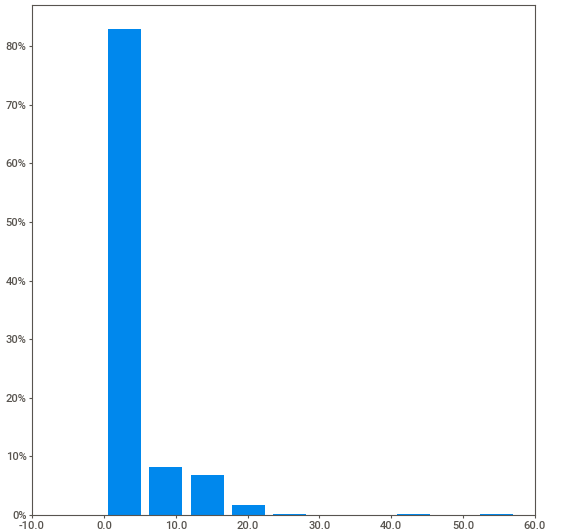
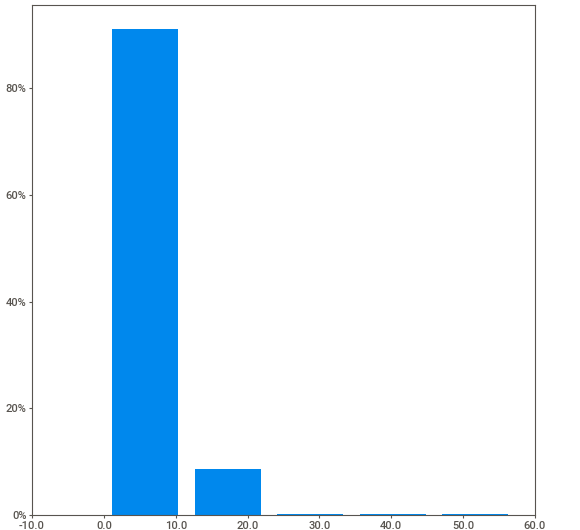
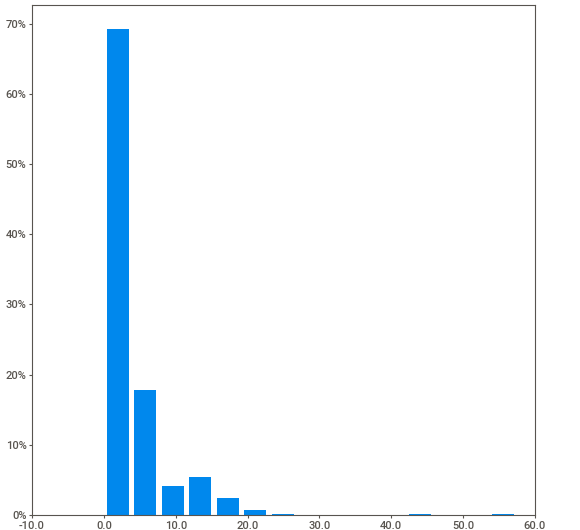
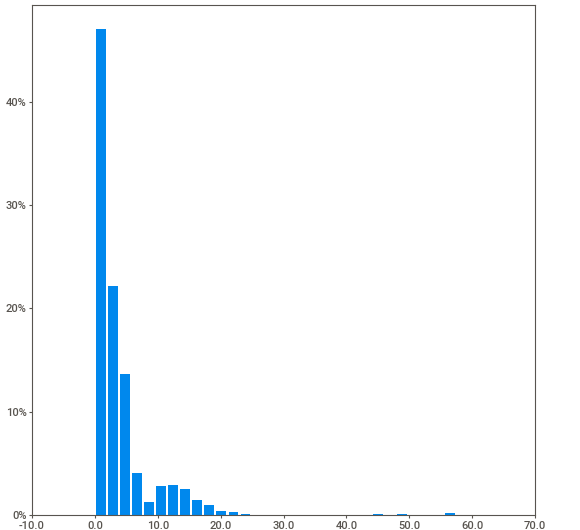
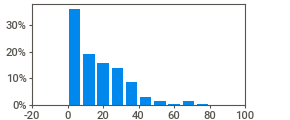
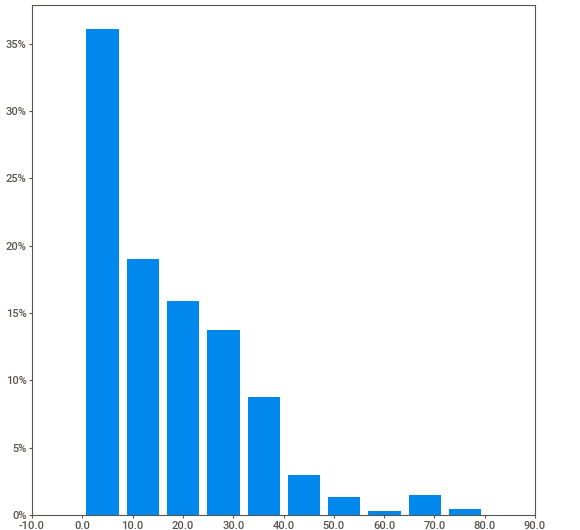
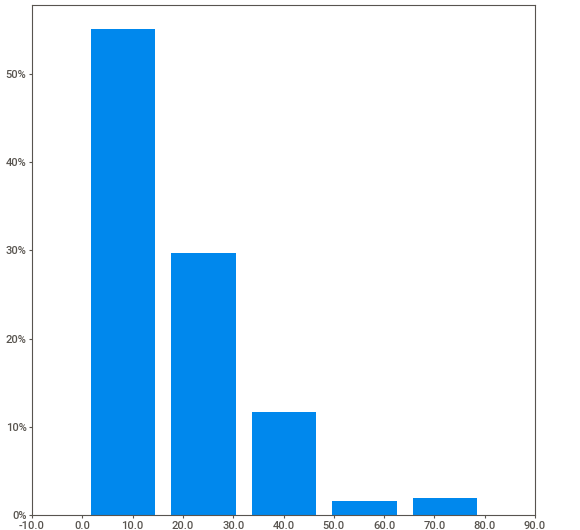
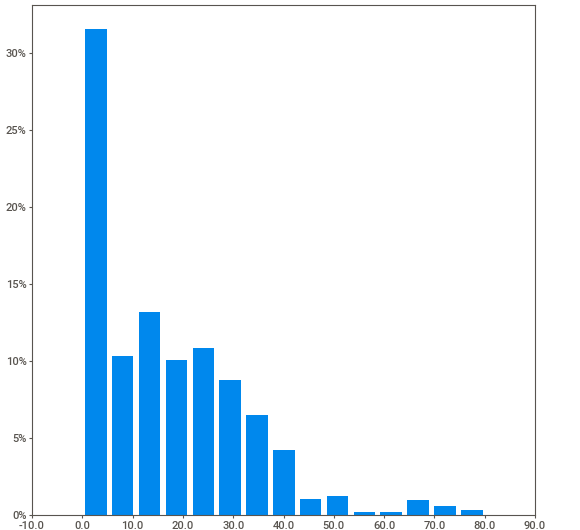
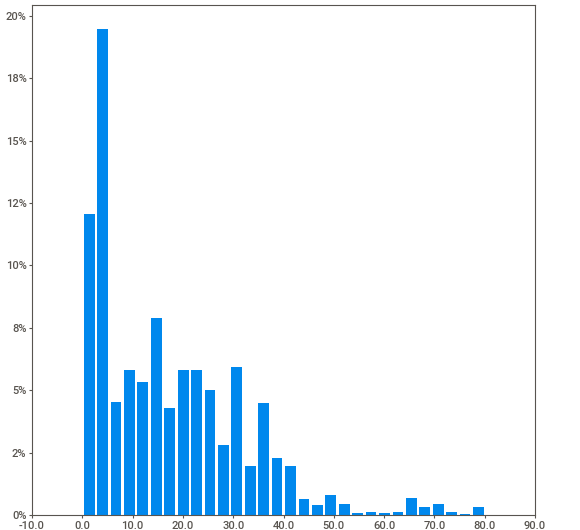
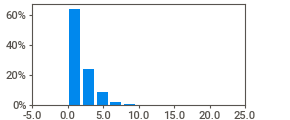
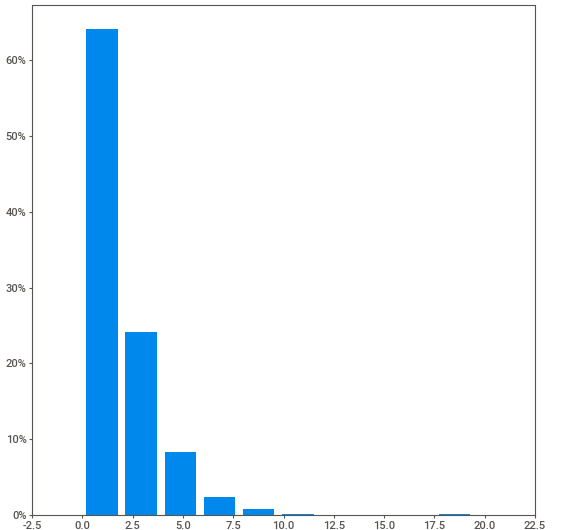
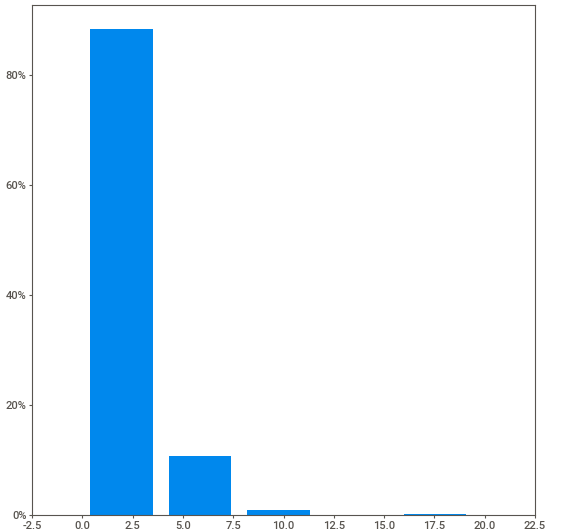
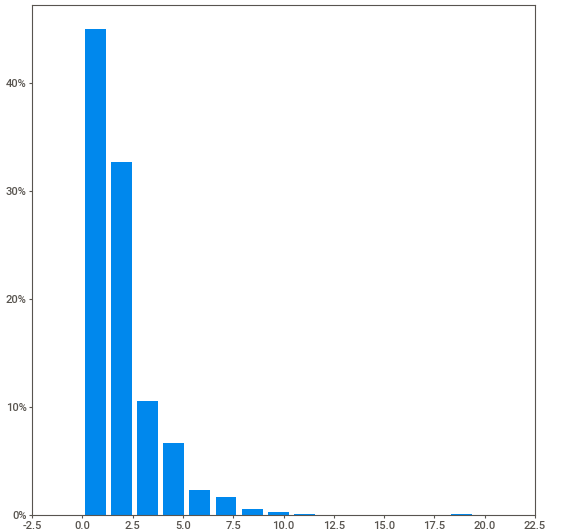
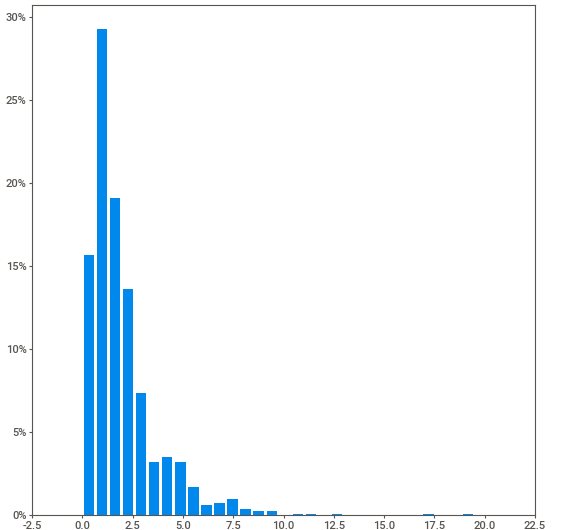
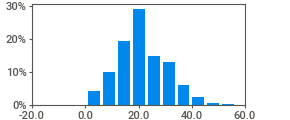
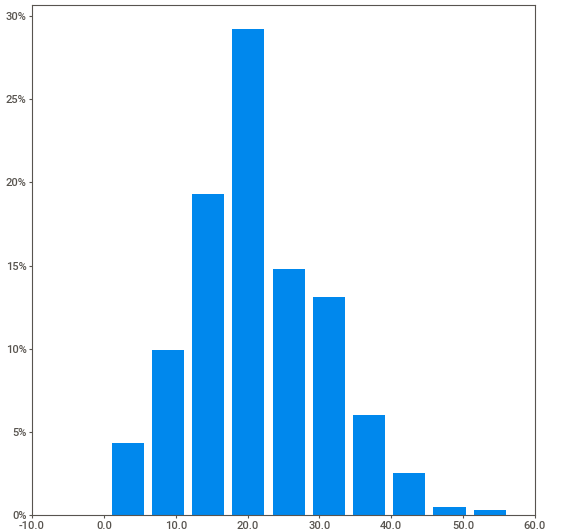
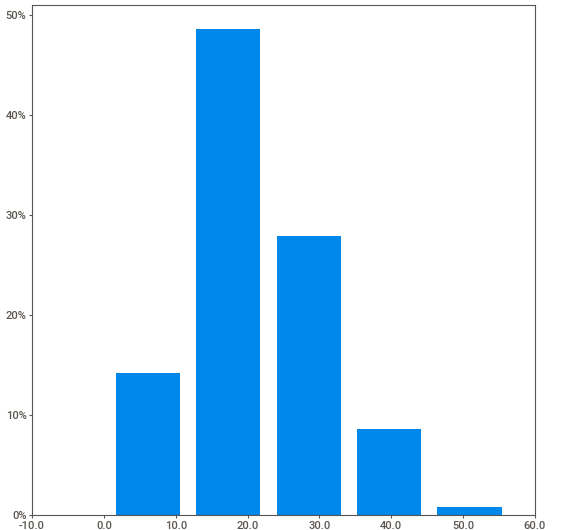
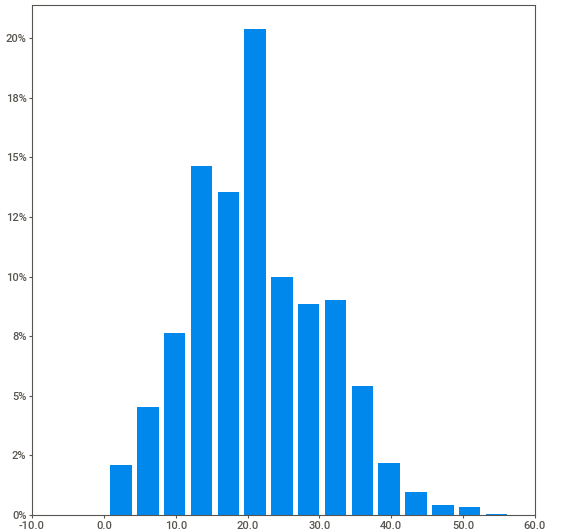
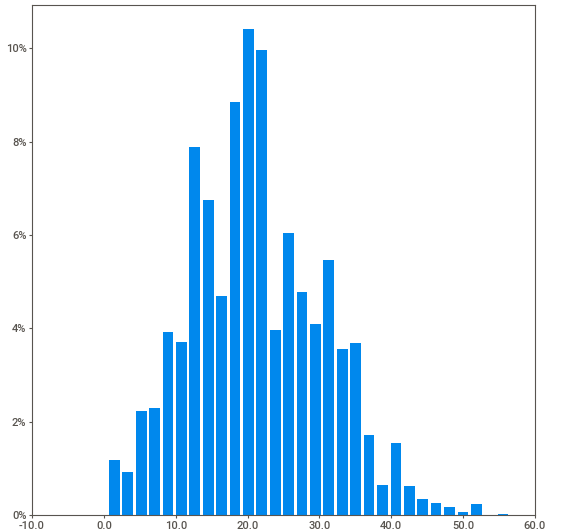
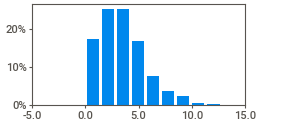
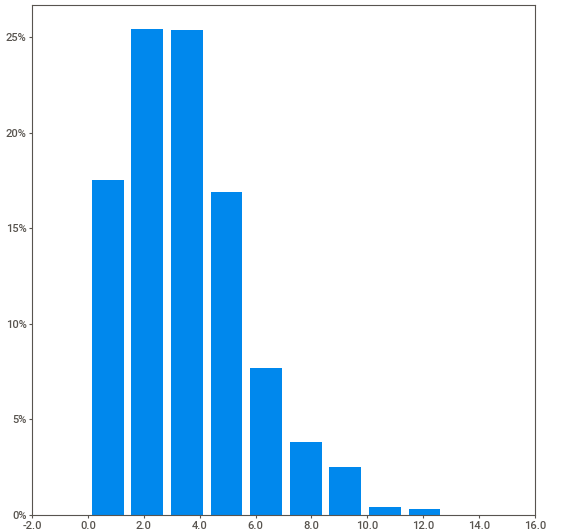
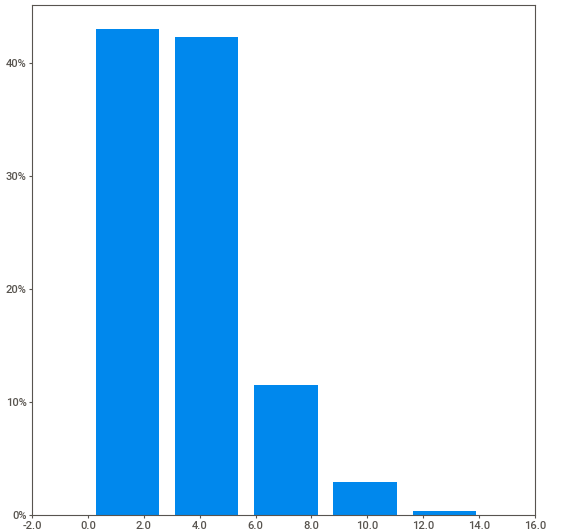
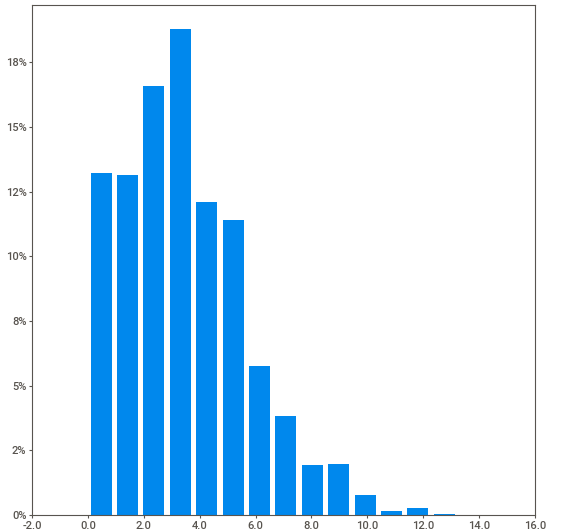
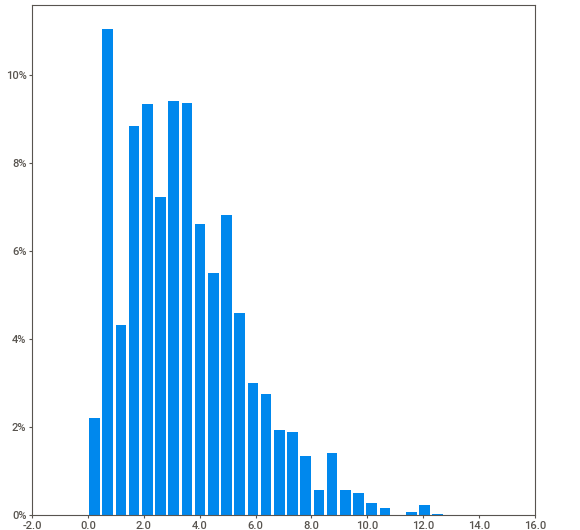
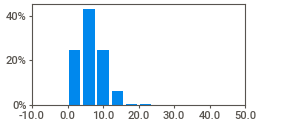
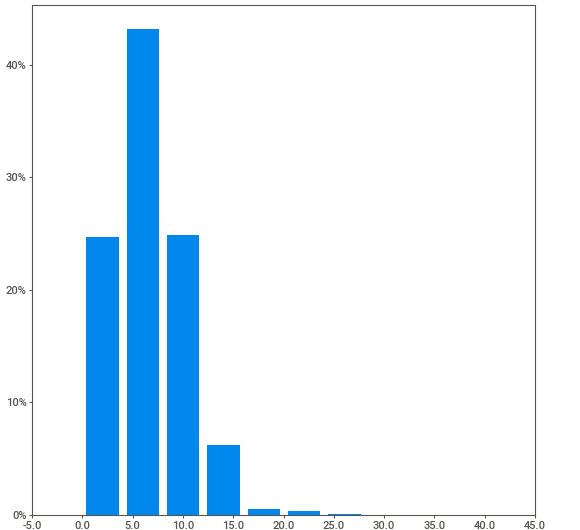
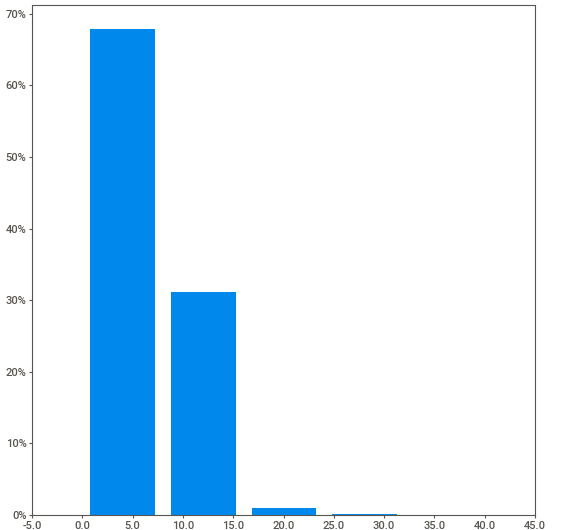
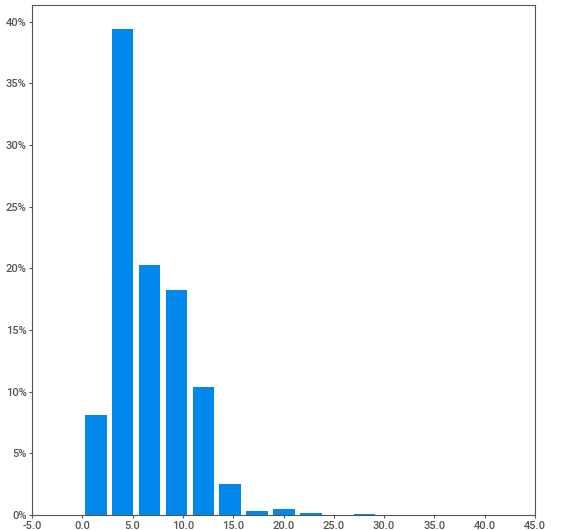
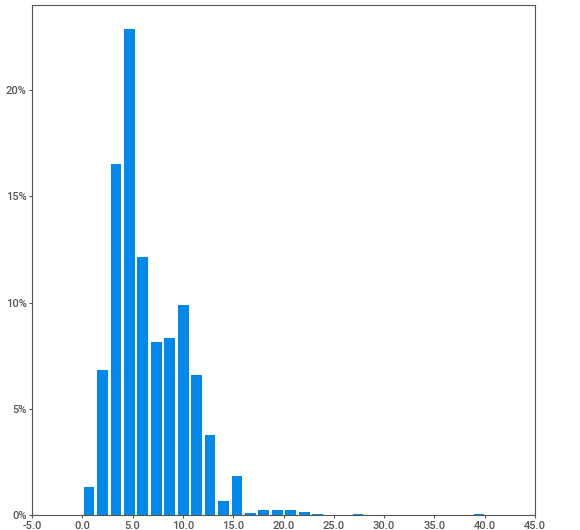
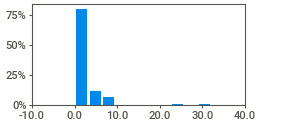
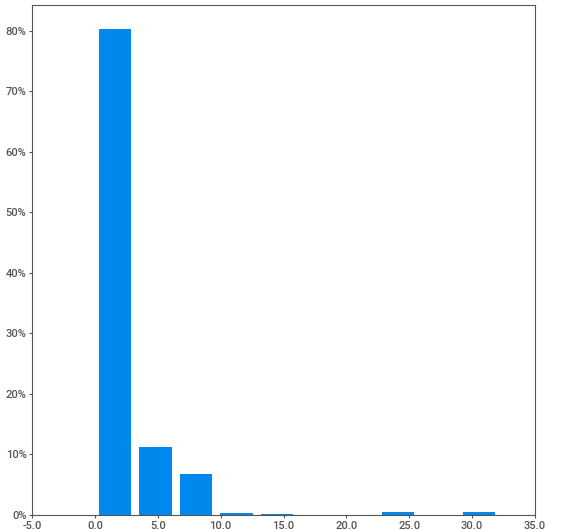
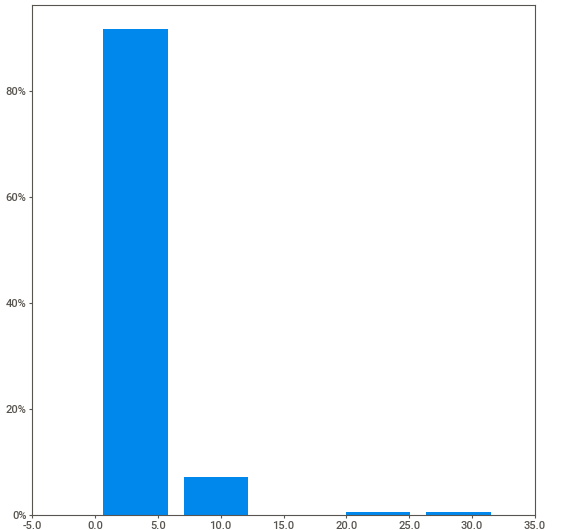
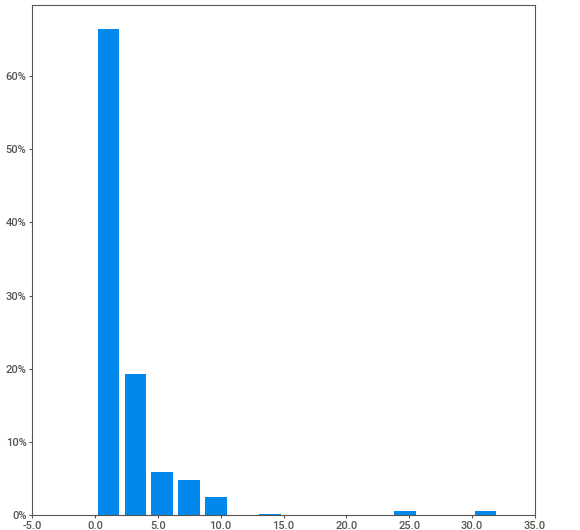
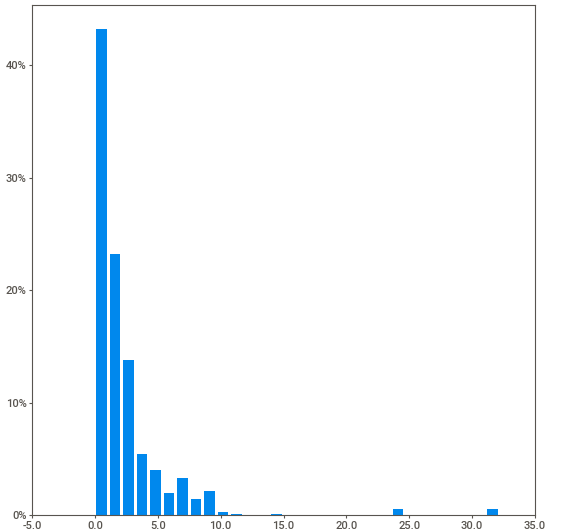
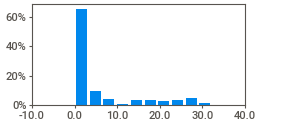
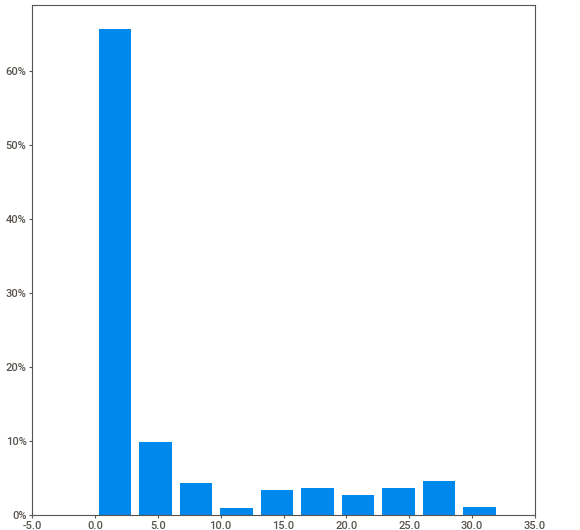
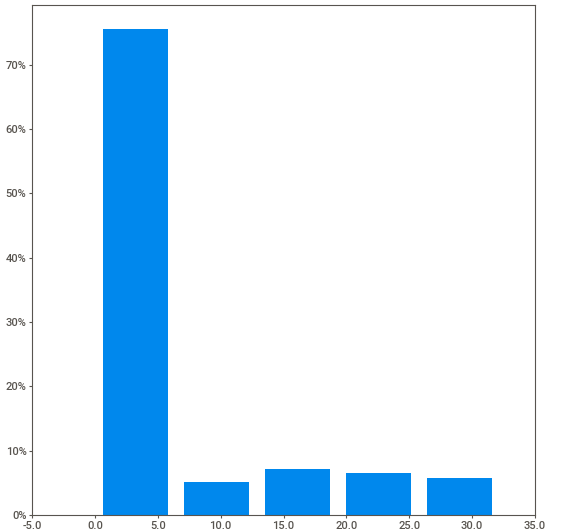
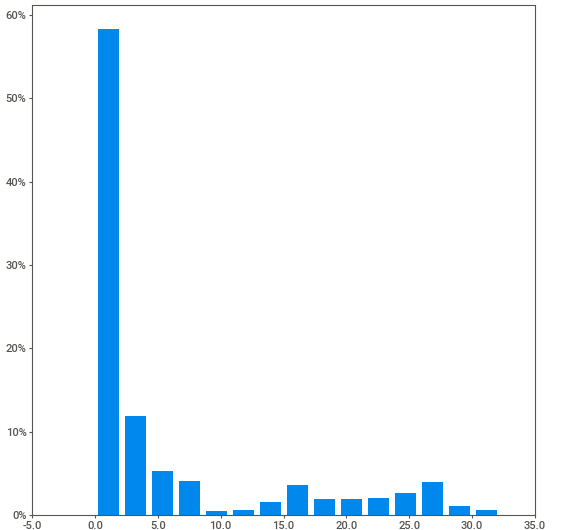
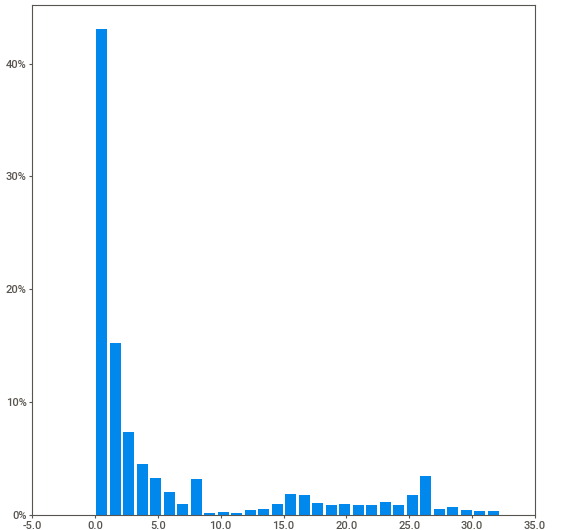
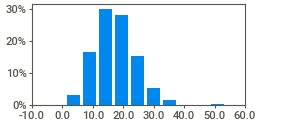
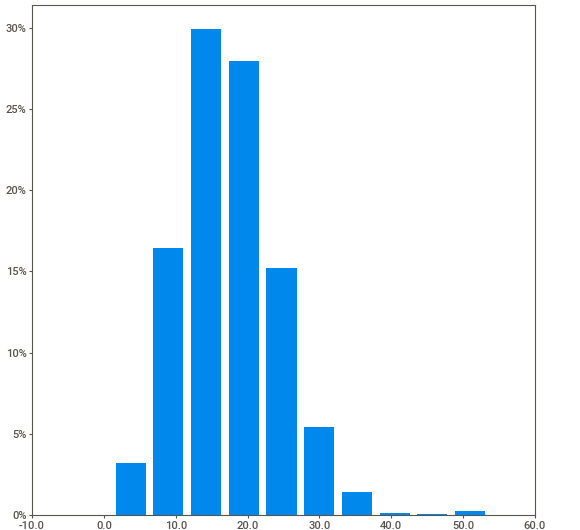
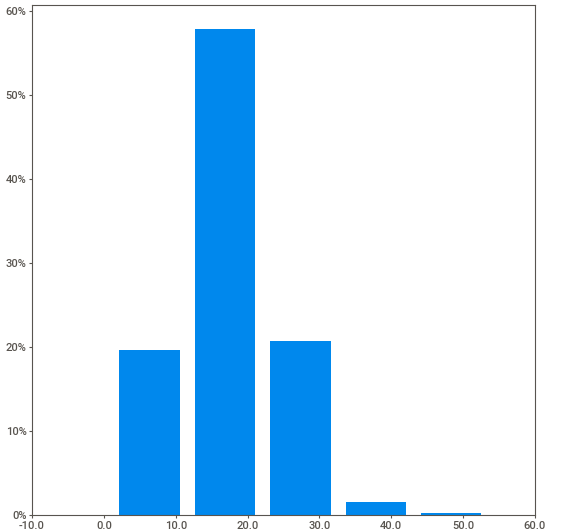
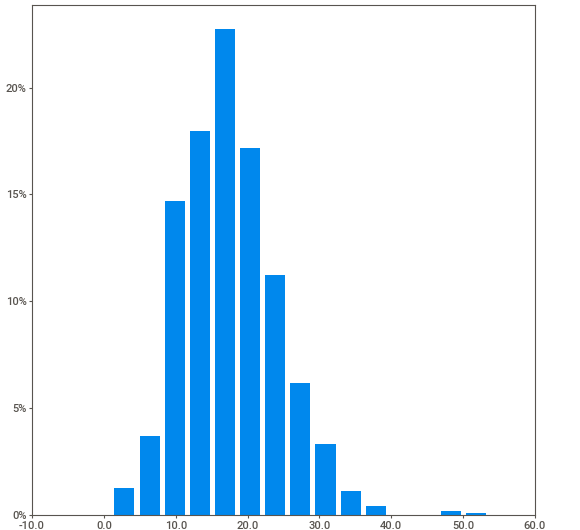
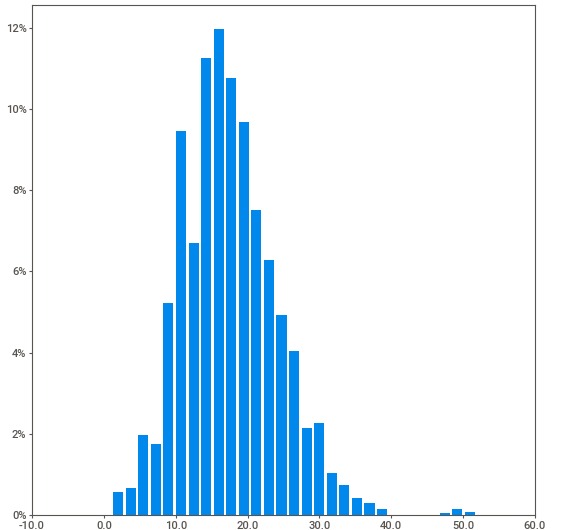
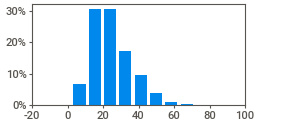
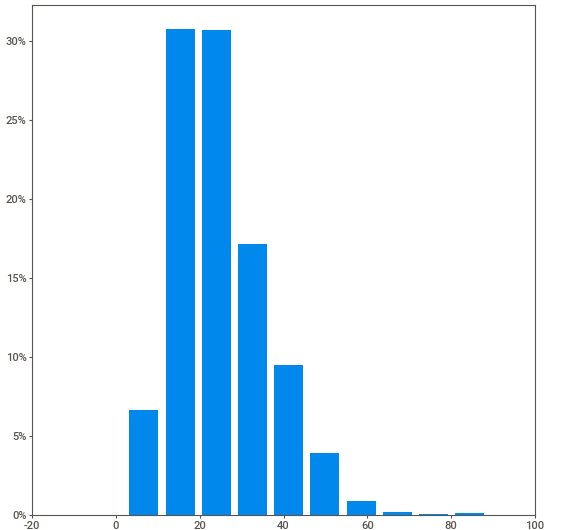
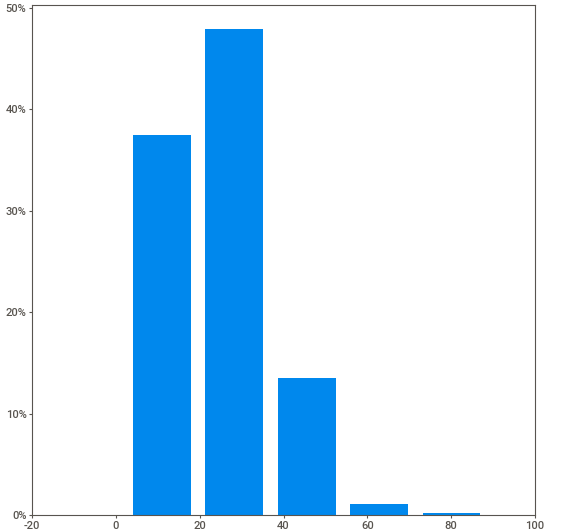
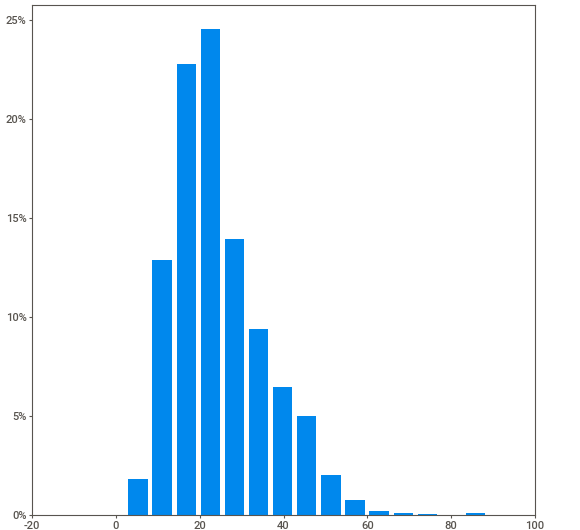
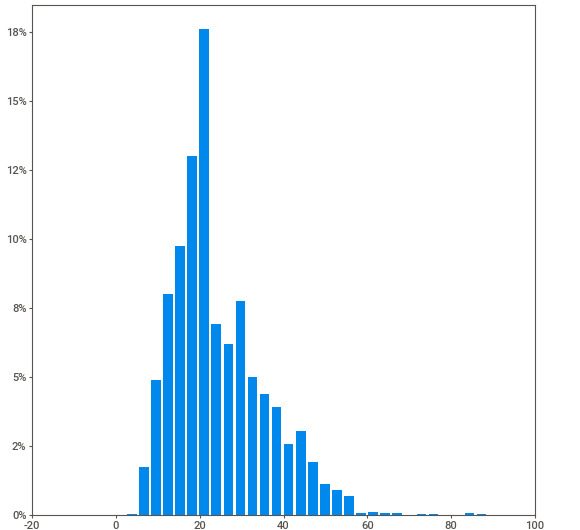
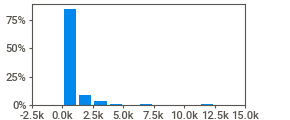
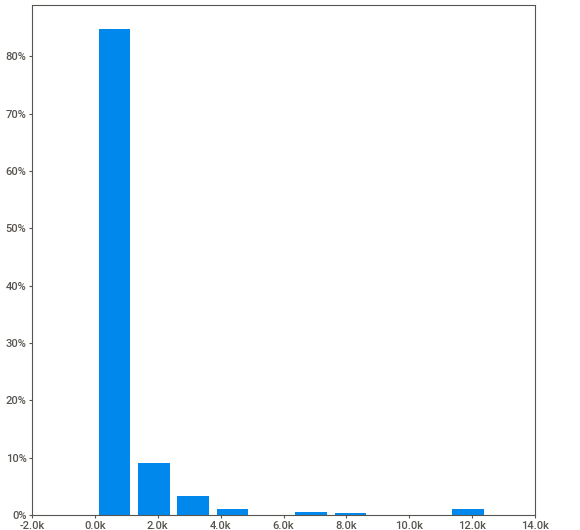
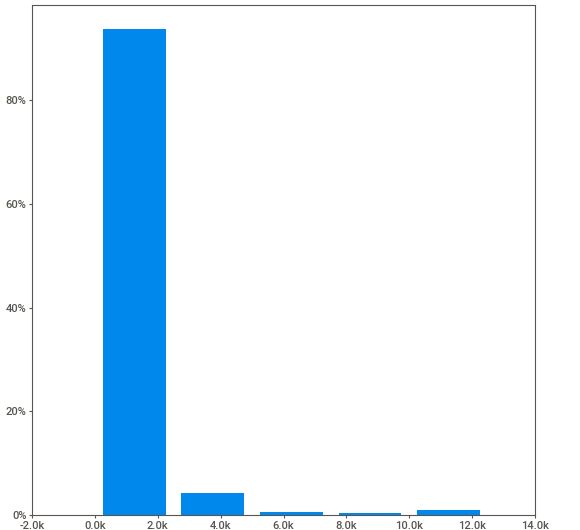
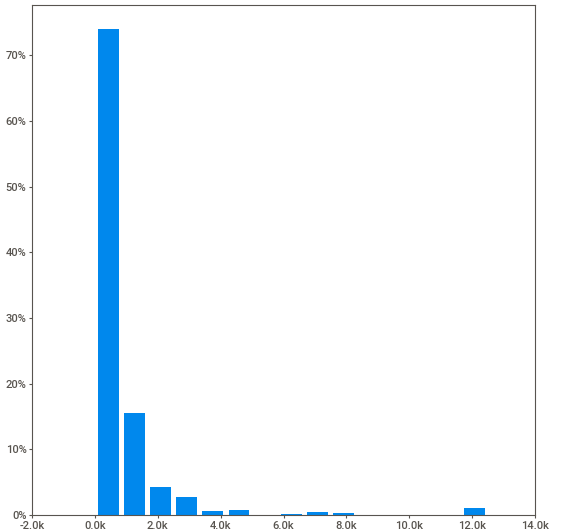
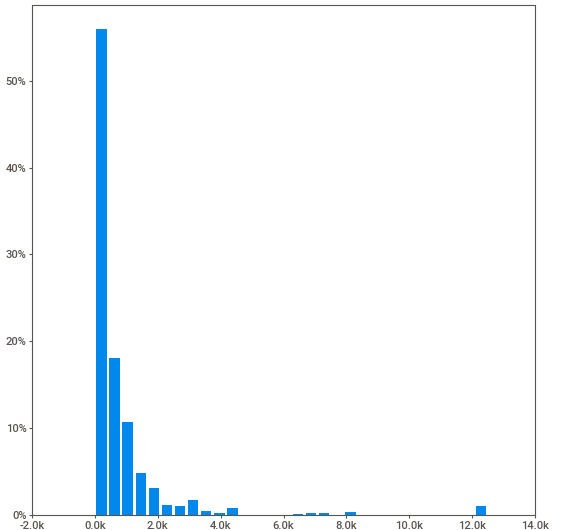
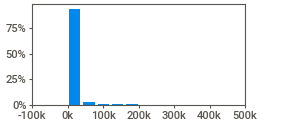
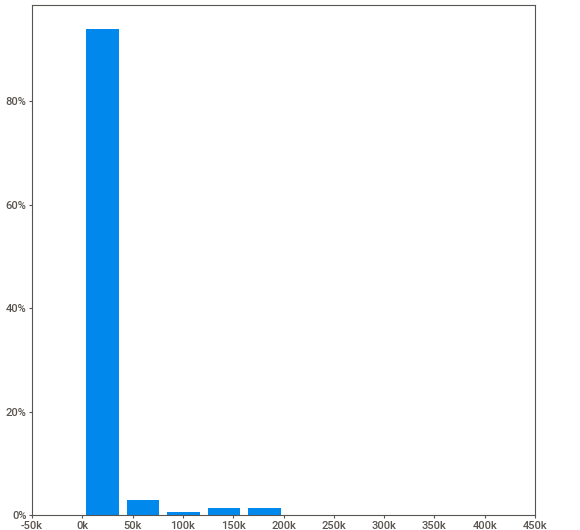
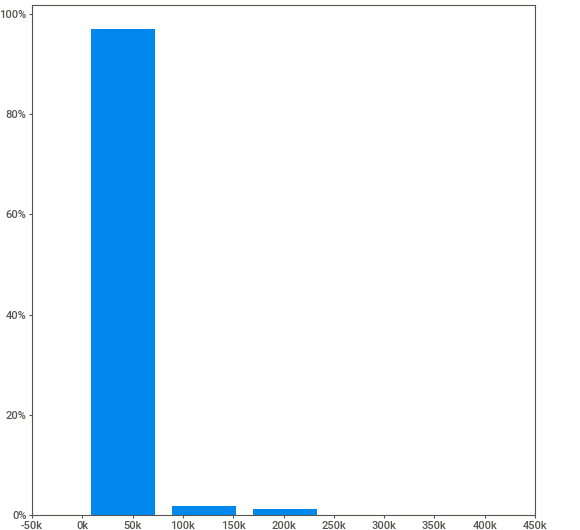
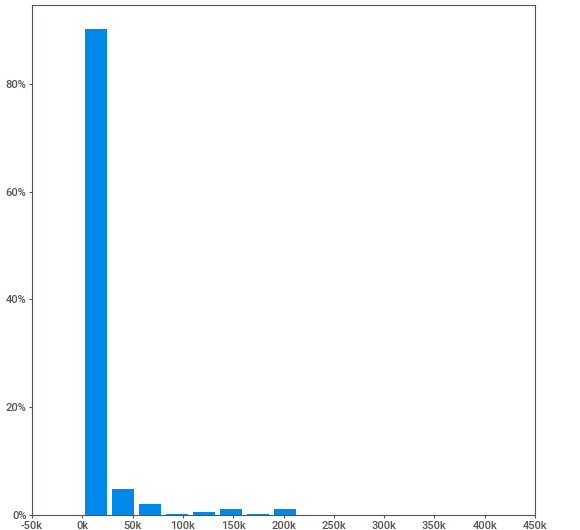
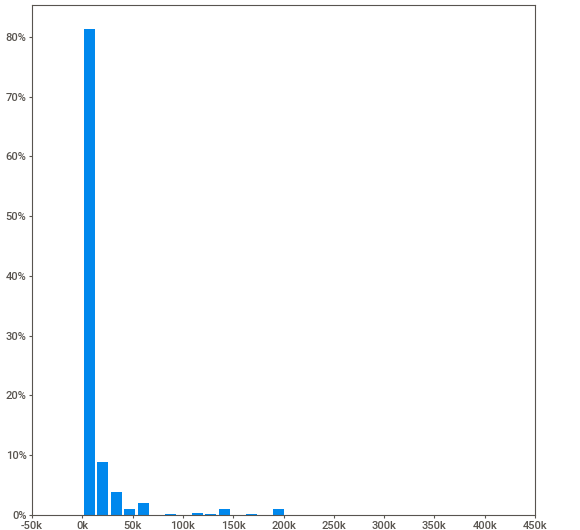
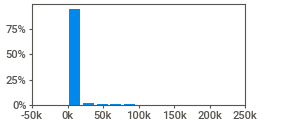
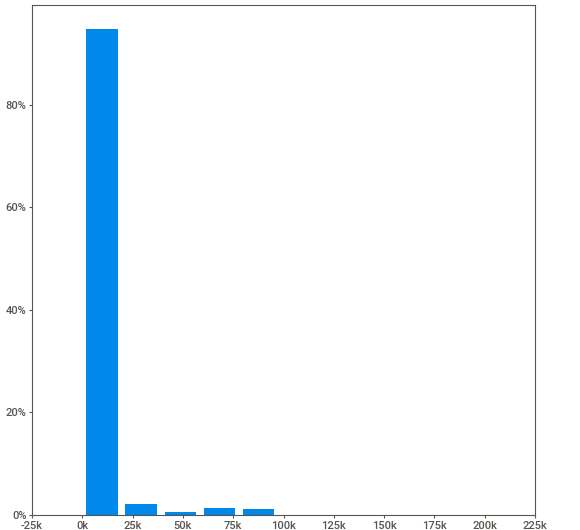
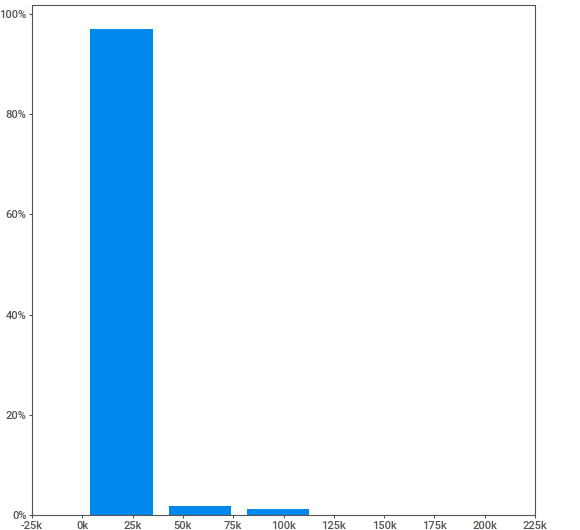
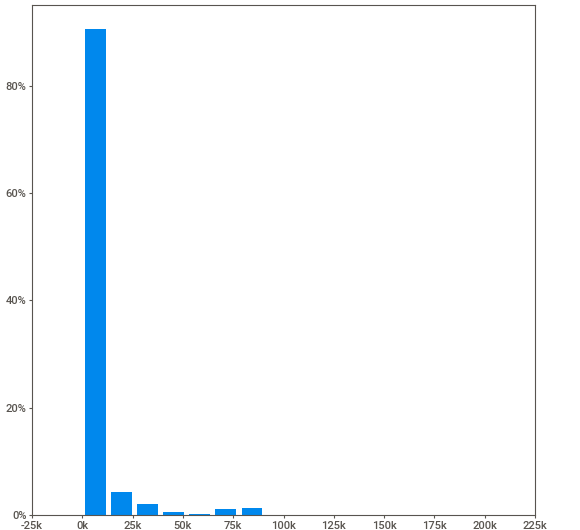
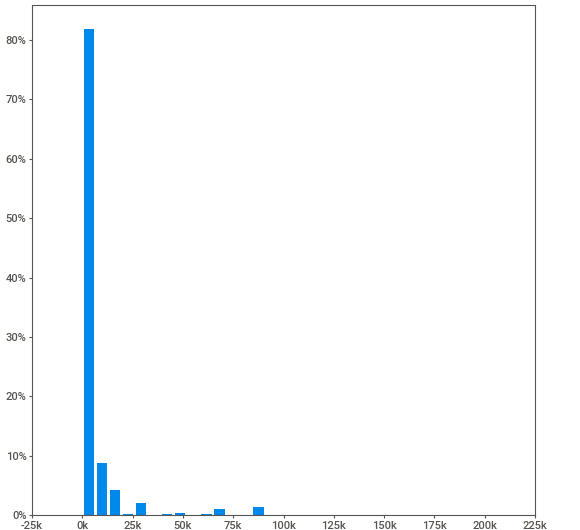
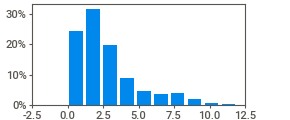
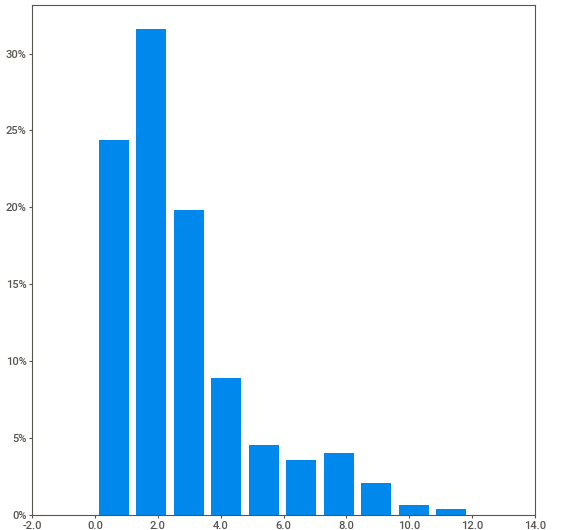
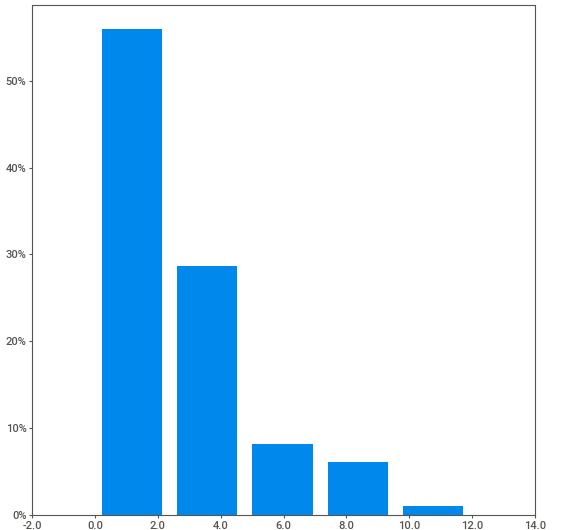
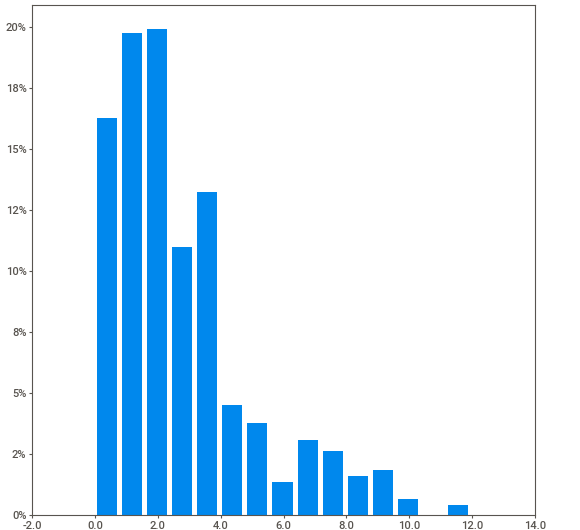
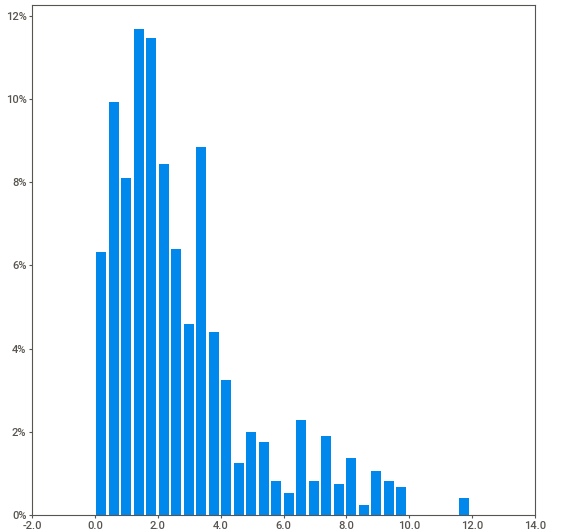
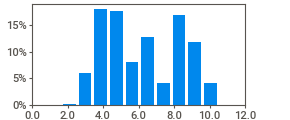
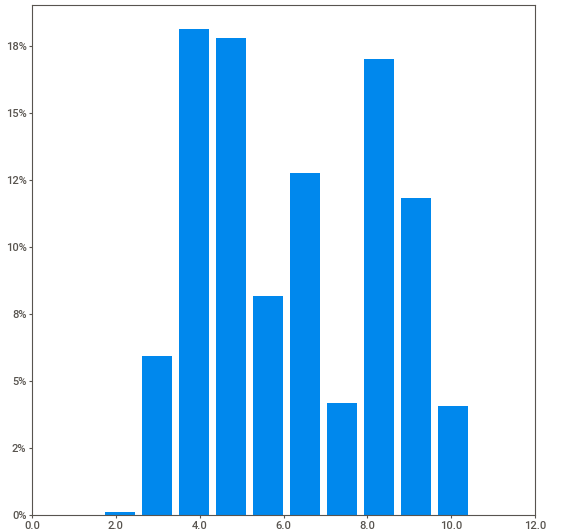
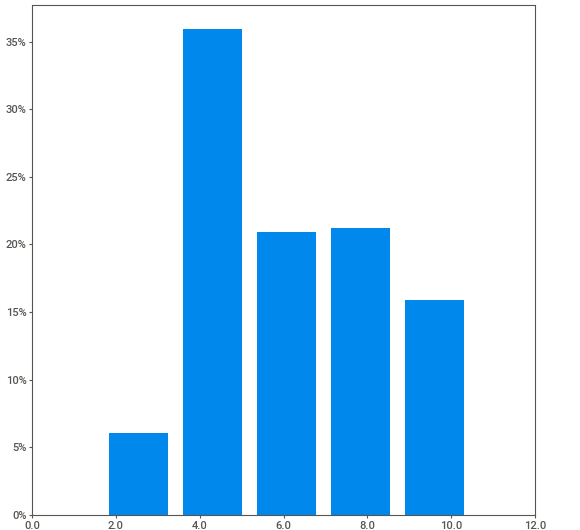
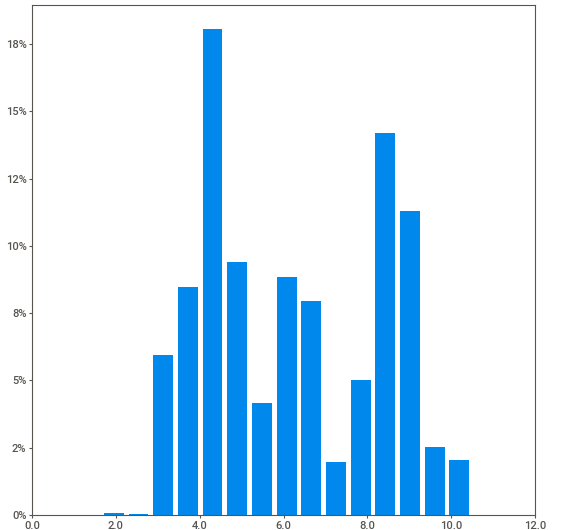
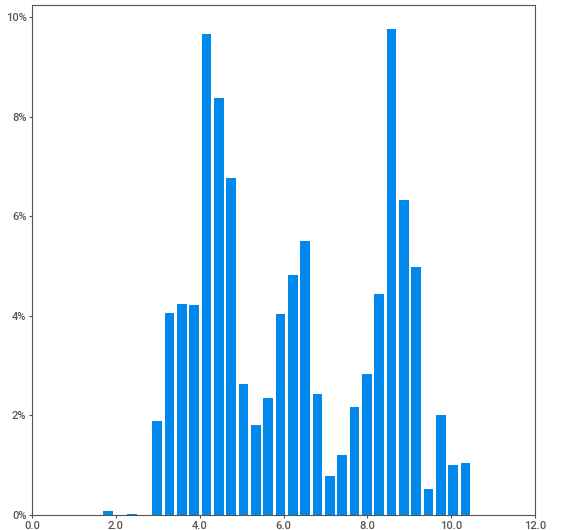
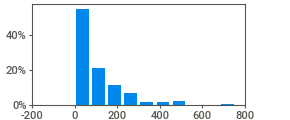
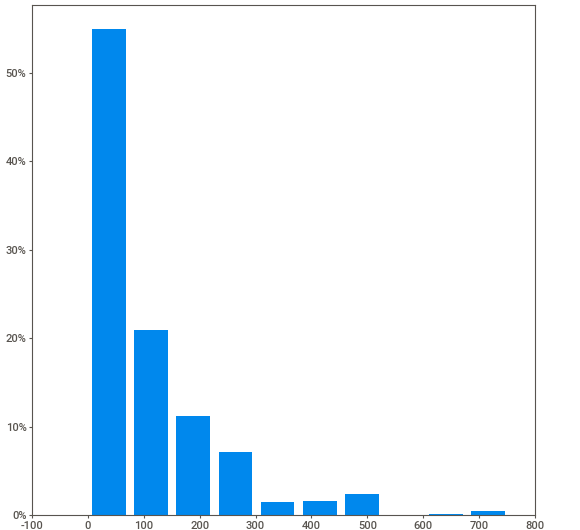
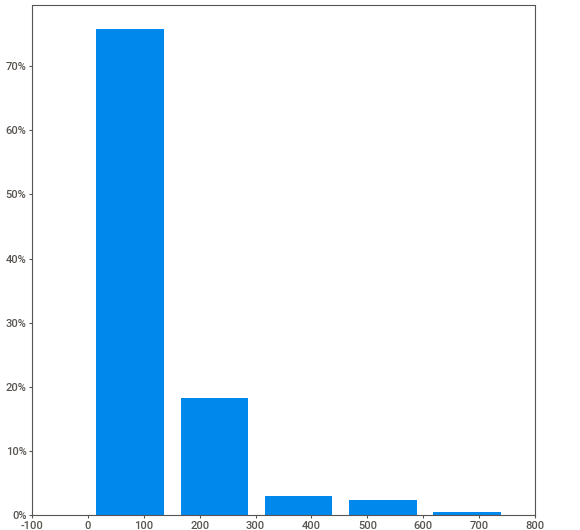
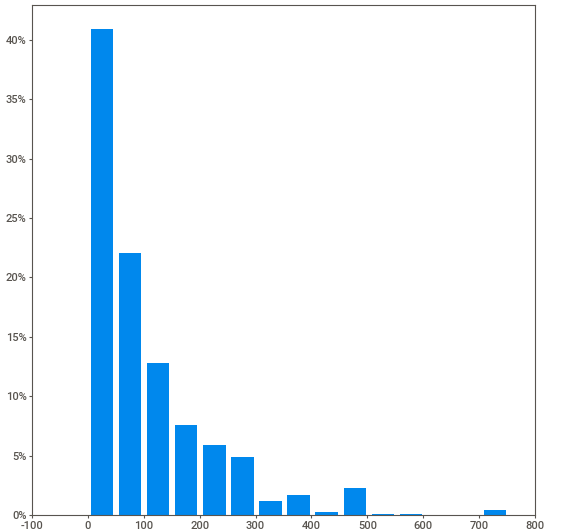
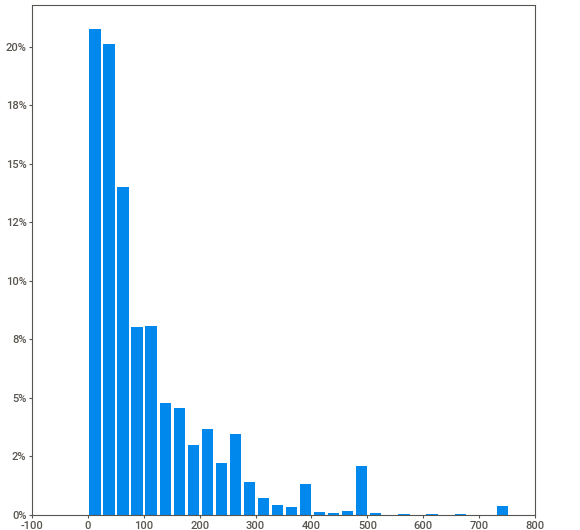
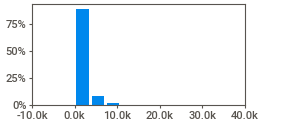
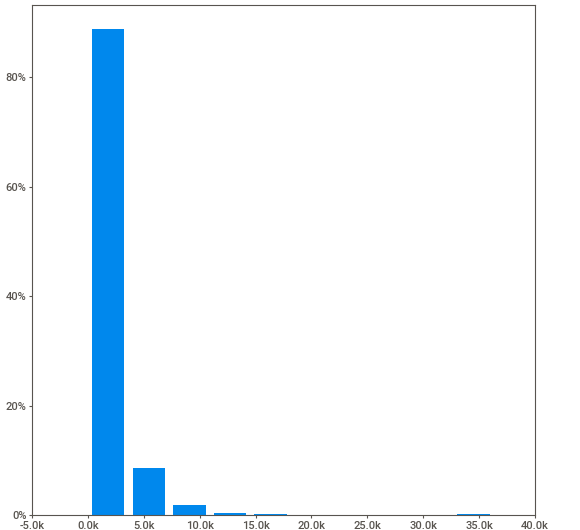
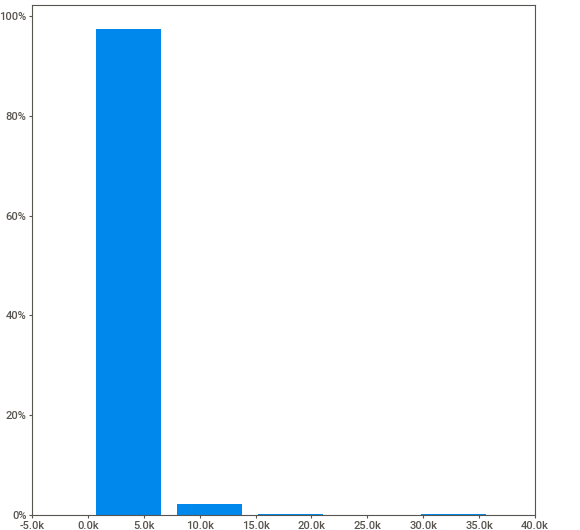
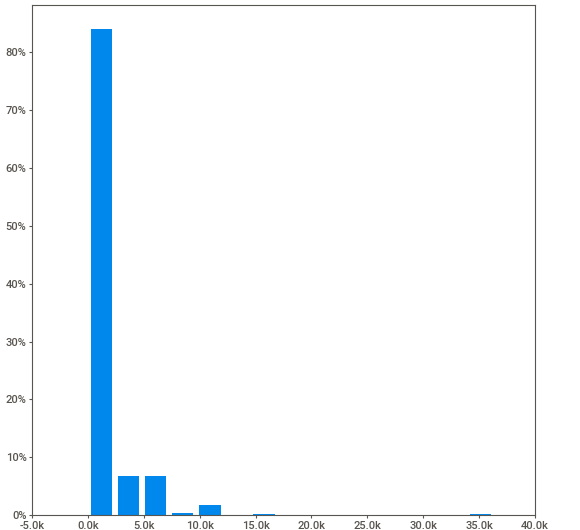
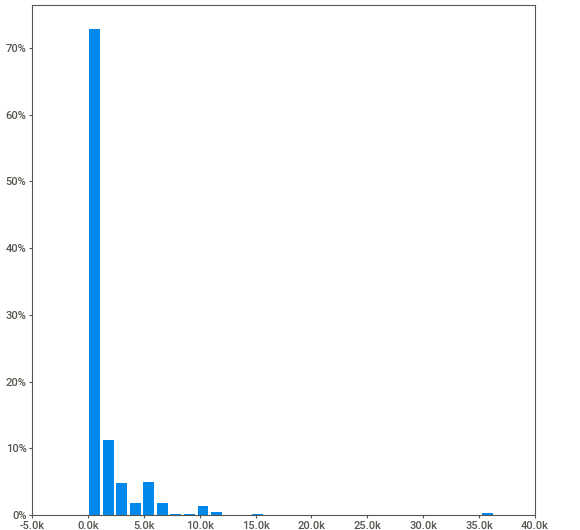
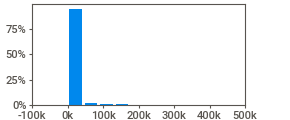
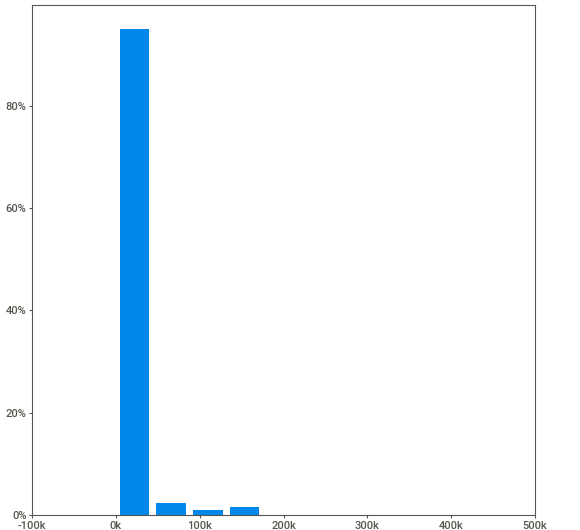
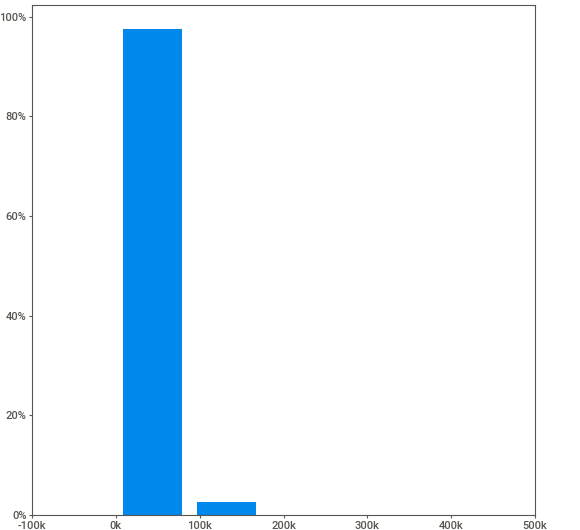
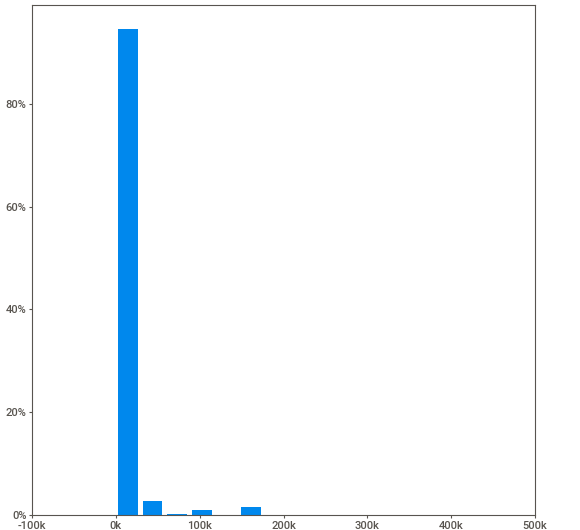
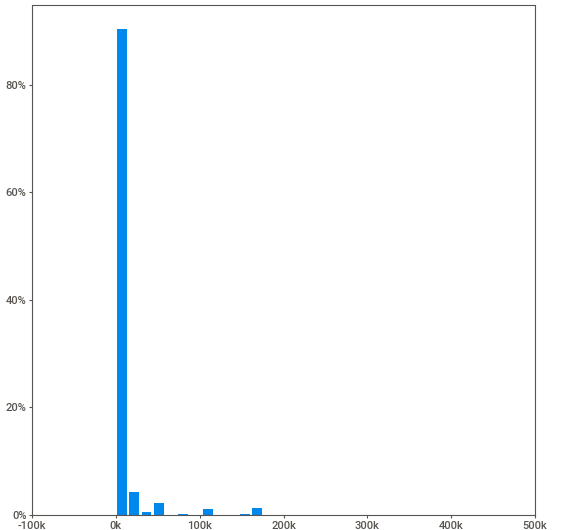
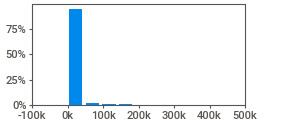
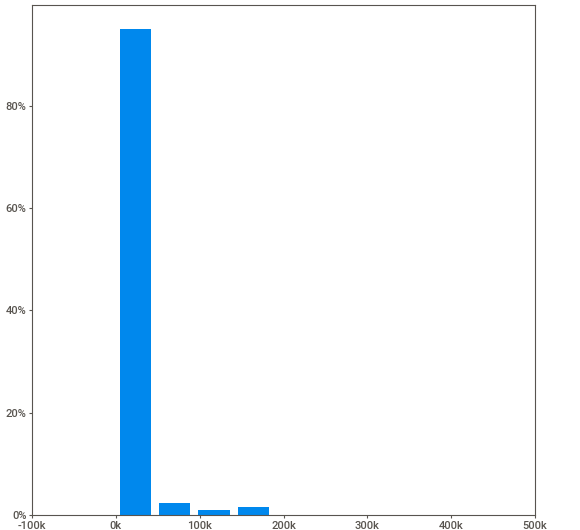
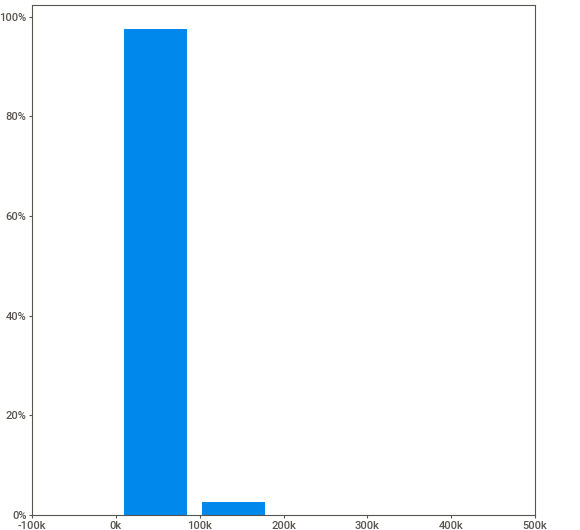
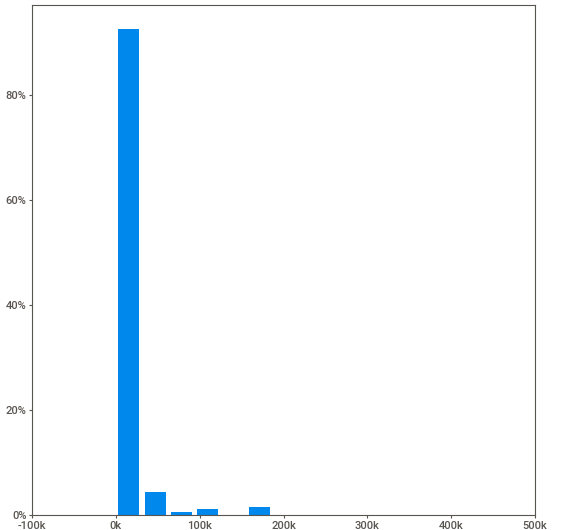
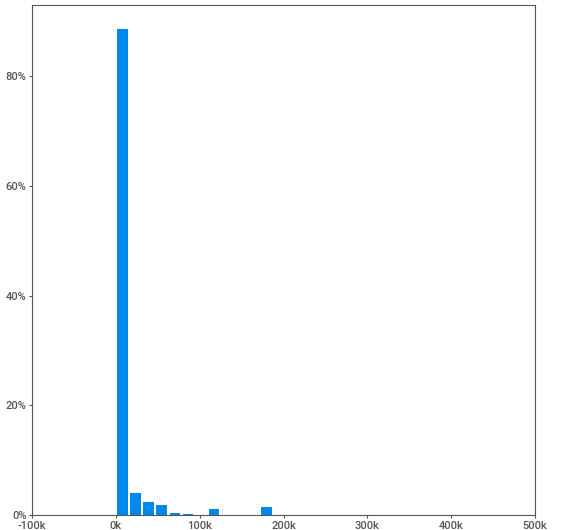
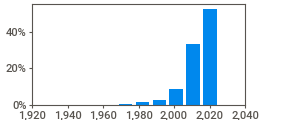
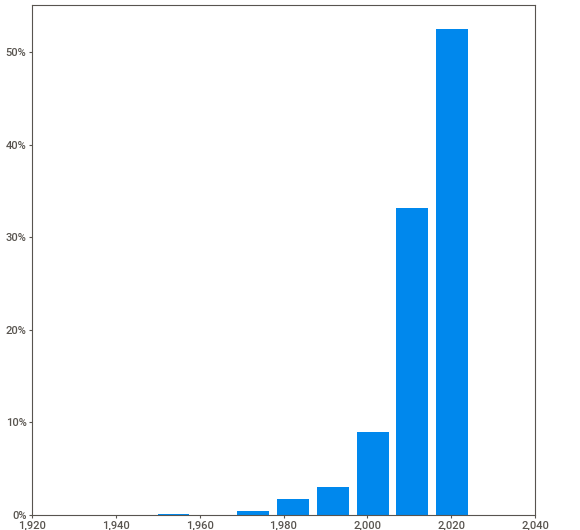
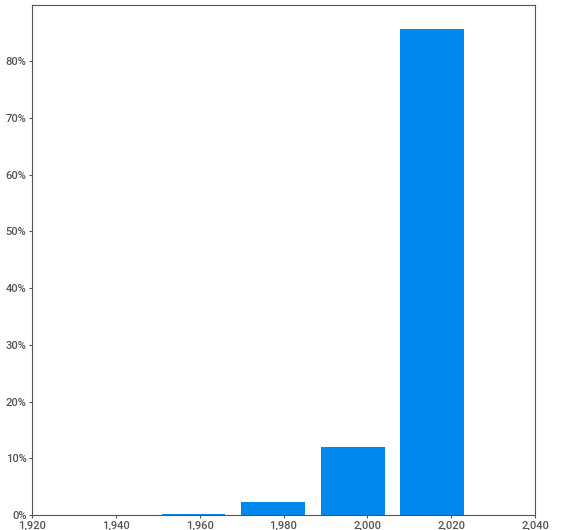
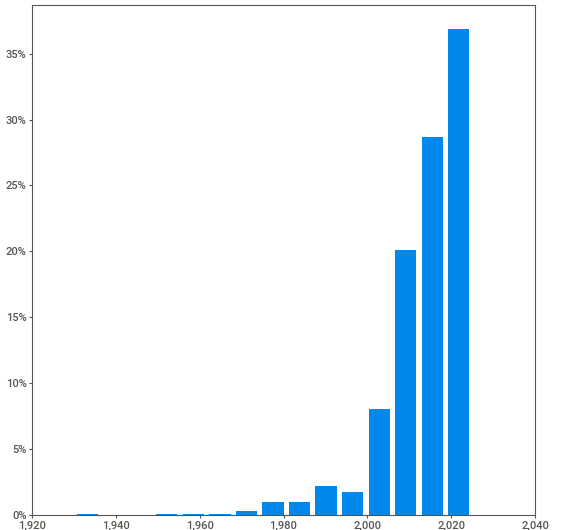
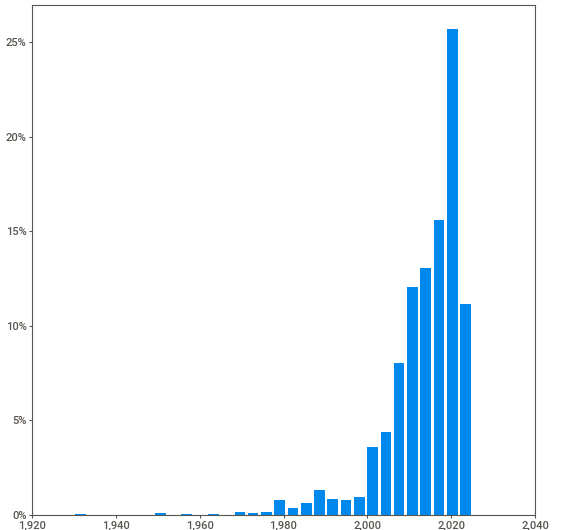
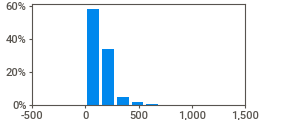
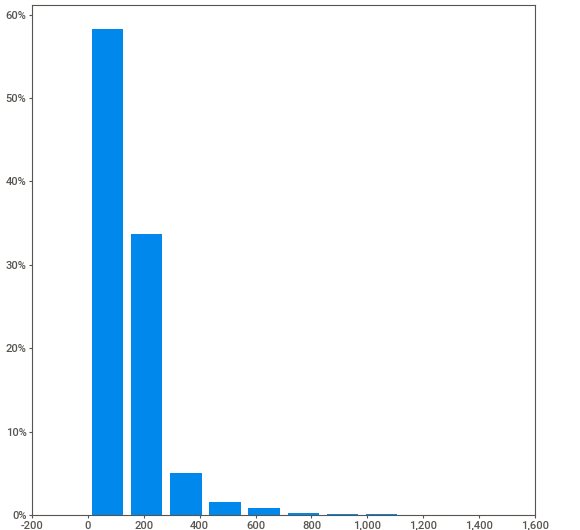
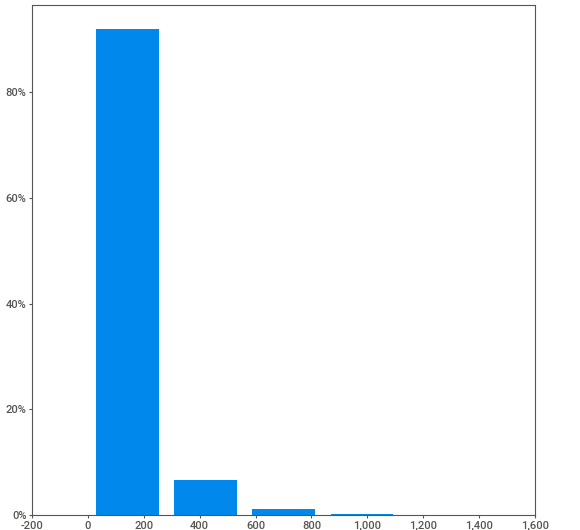
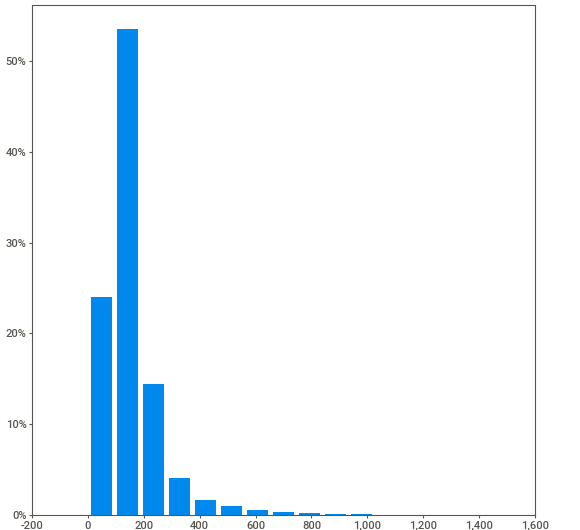
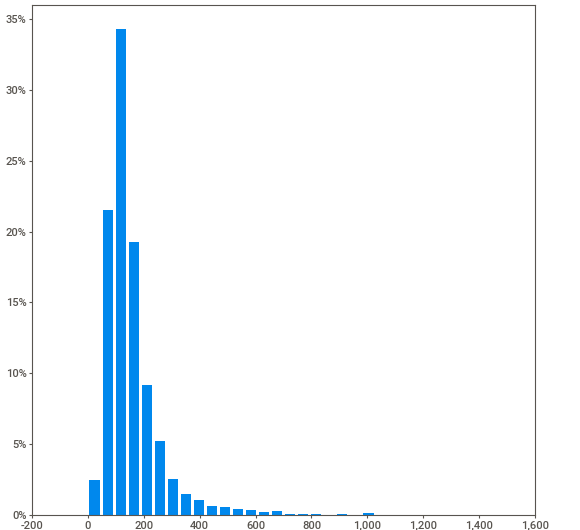
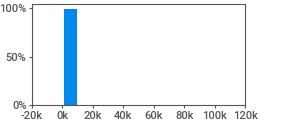
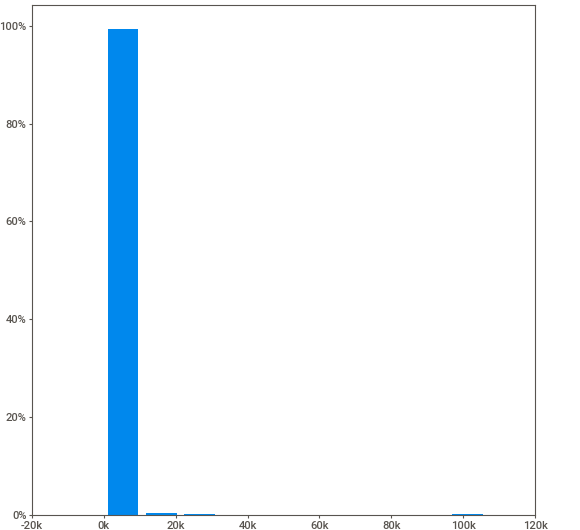
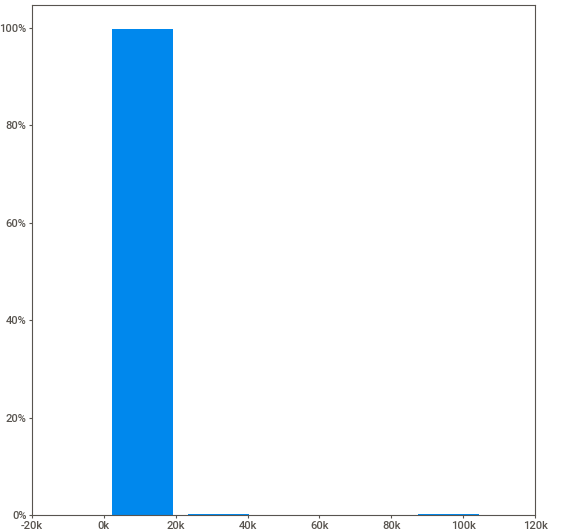
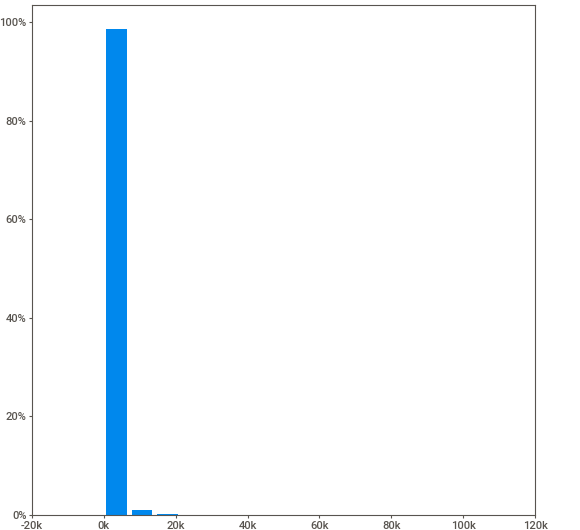
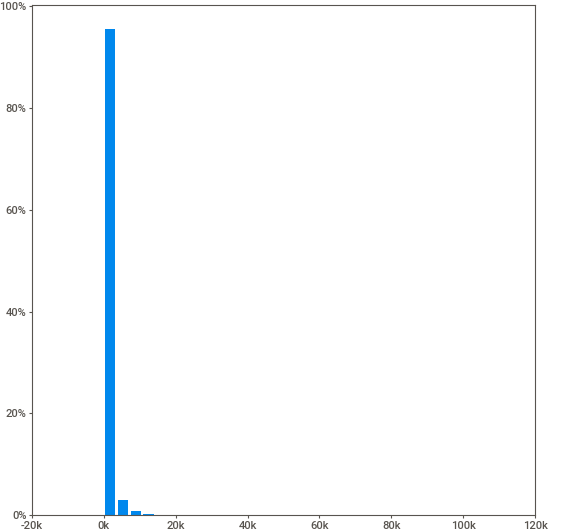
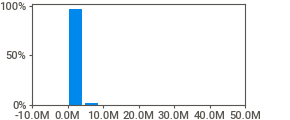
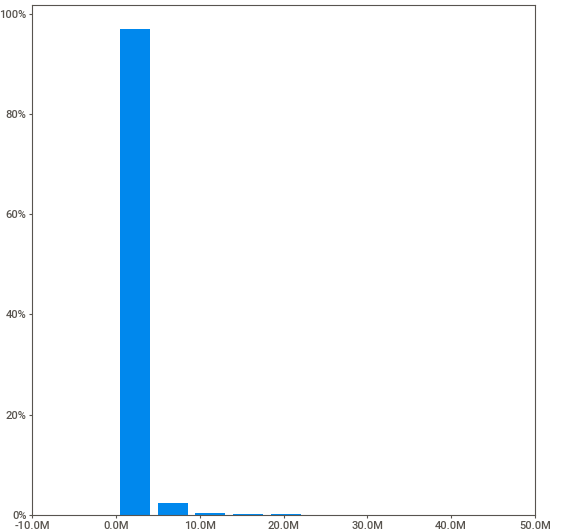
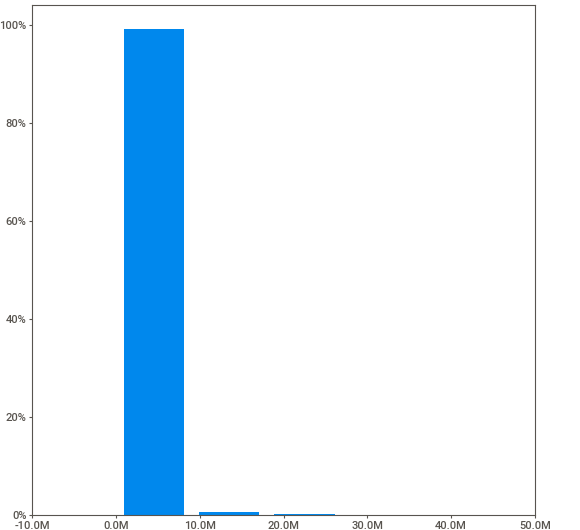
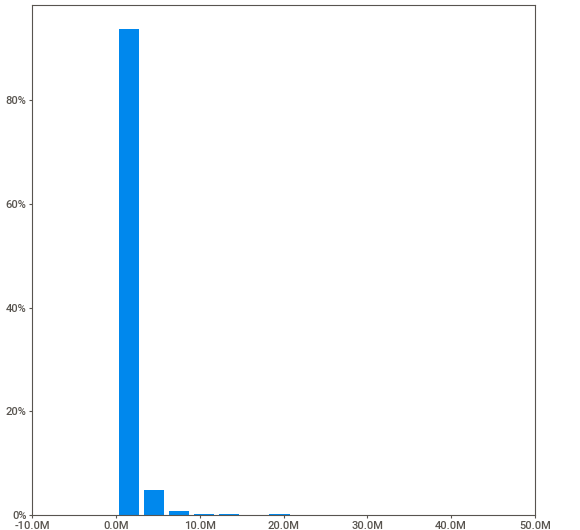
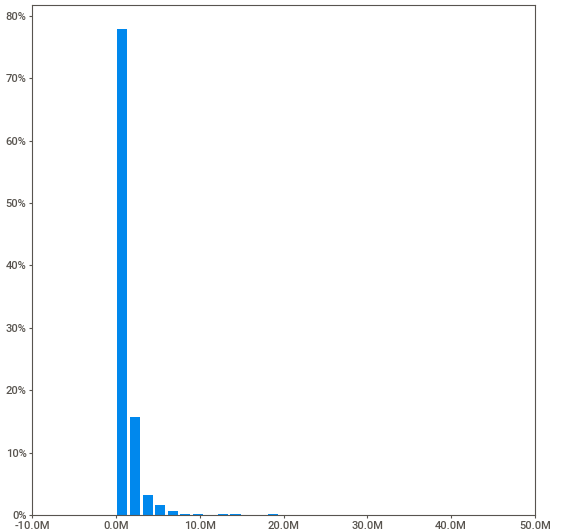
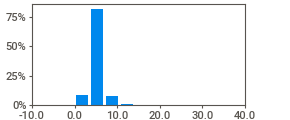
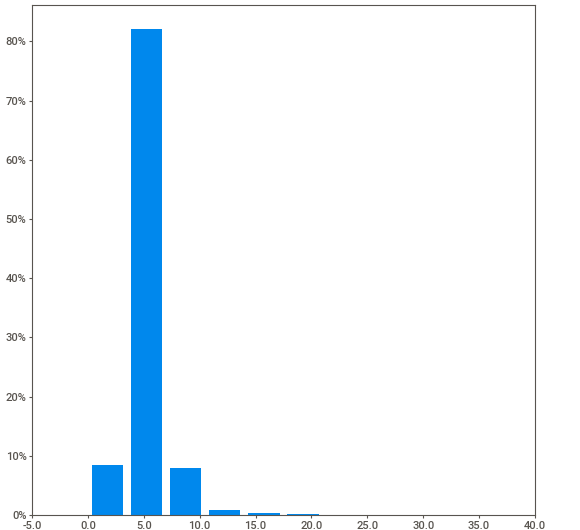
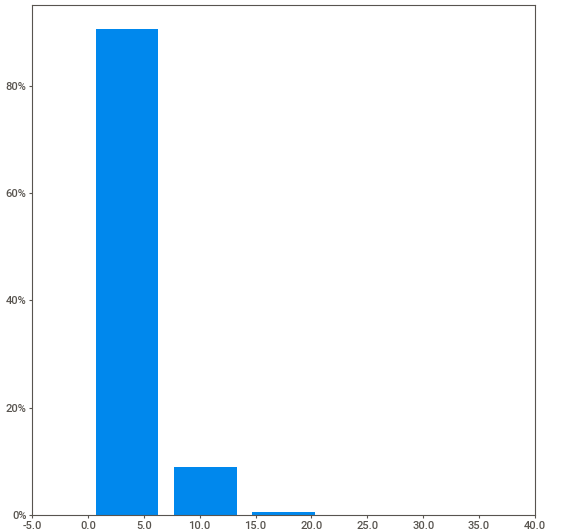
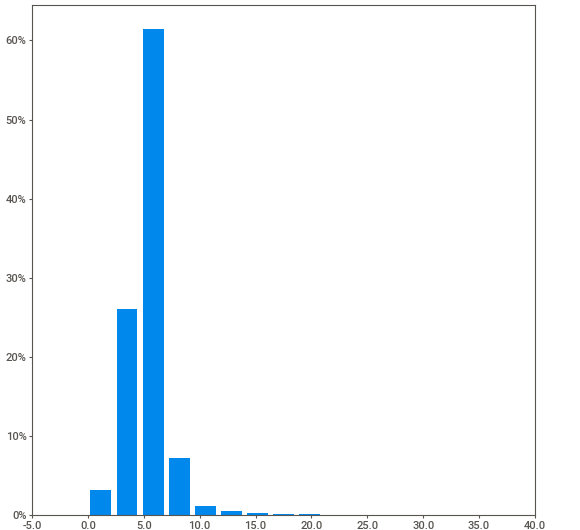
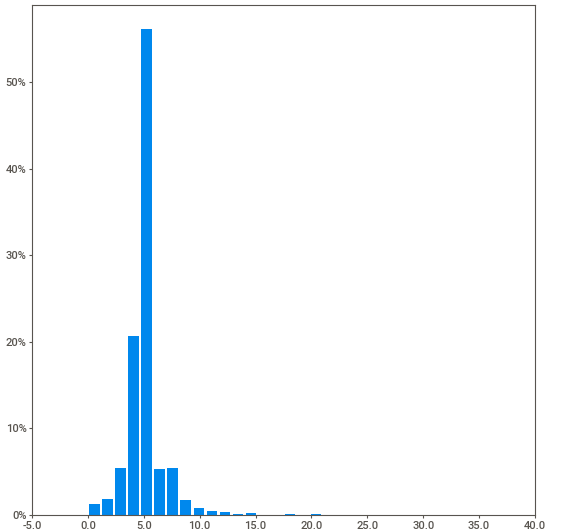
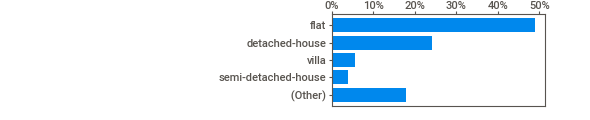
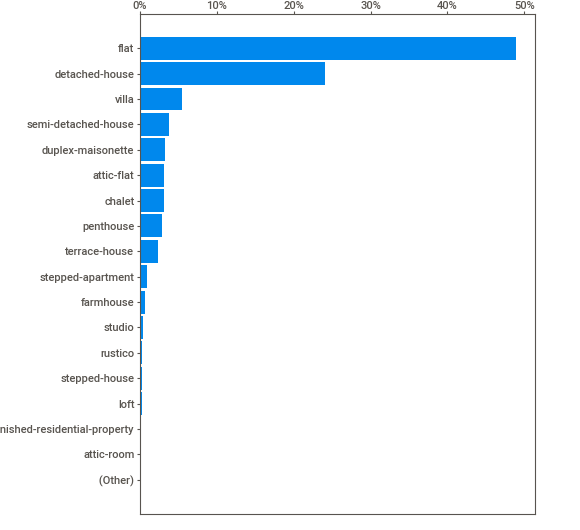
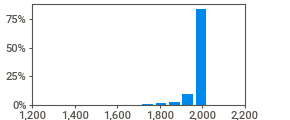
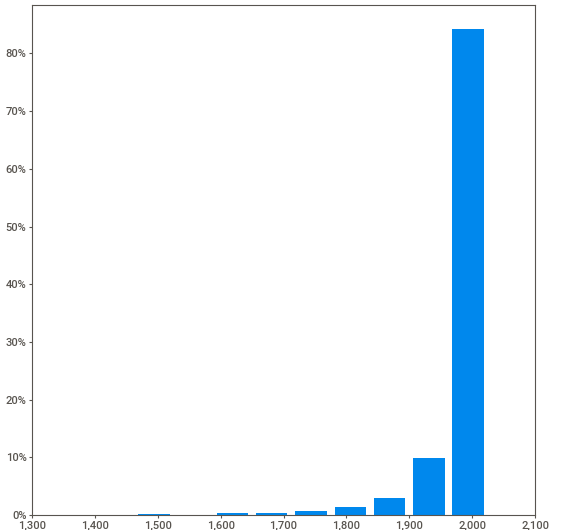
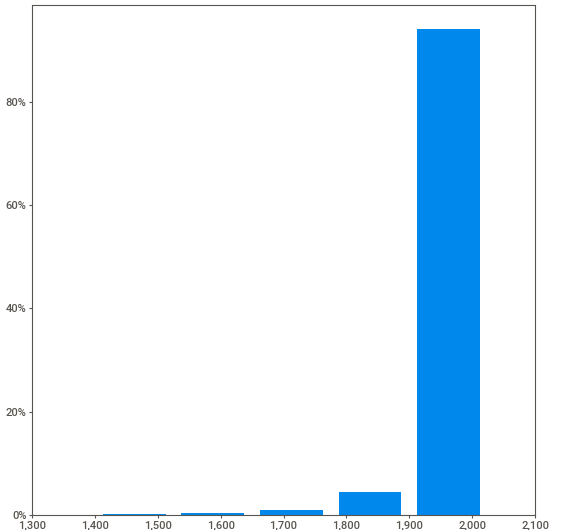
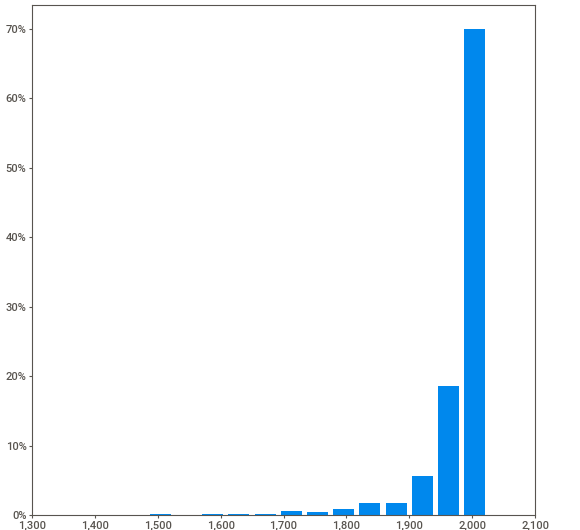
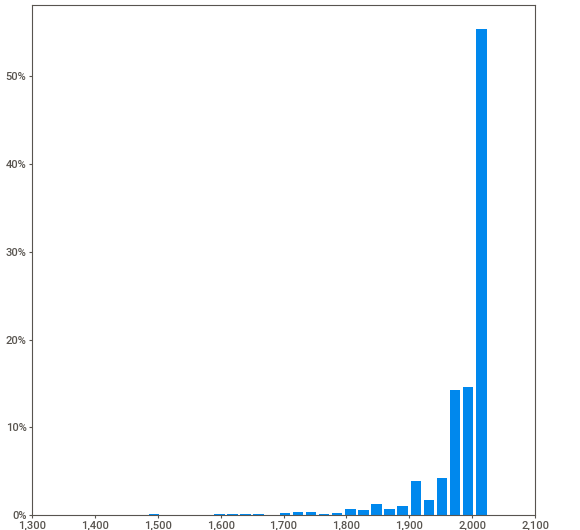
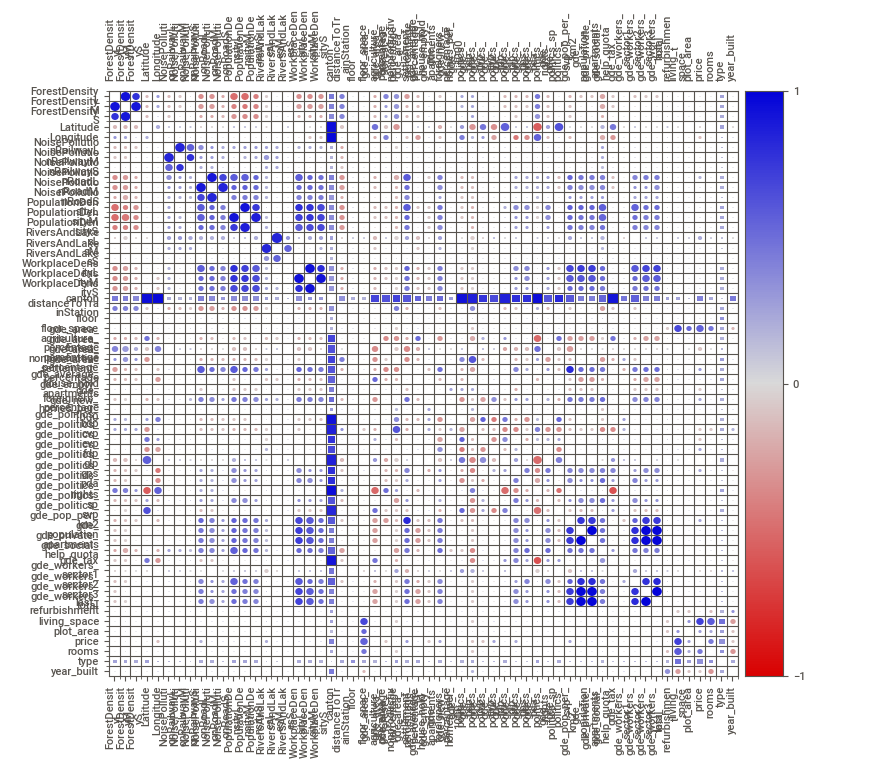
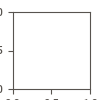

In [7]:
# Reorder columns alphabetically and show sweetviz report
df = df.reindex(sorted(df.columns), axis=1)
sweet_report = sv.analyze(df)
sweet_report.show_notebook()

In [8]:
df.to_csv("../../data/clean_gde_v2.csv", index=False)


In [9]:
df = helper.process_data(return_gde=False)


In [10]:
df = clean_rows(df)
df.to_csv("../../data/clean_v2.csv", index=False)
